##### Importing Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
df = pd.read_csv("Covid Data.csv")

##### Understanding the Dataset

In [40]:
df.shape

(1048575, 21)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [42]:
df.describe(include="number")

USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.690739e+01  4.751073e+01  5.424242e+00  5.132258e+00   
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00  3.000000e+01  2.000000e+00  2.000000e+00  2.000000e+00   
50%    2.000000e+00  4.000000e+01  9.700000e+01  2.000000e+00  2.000000e+00   
75%    2.000000e+00  5.300000e+01  9.700000e+01  2.000000e+00  2.000000e+00   
max    9.900000e+01  1.210000e+02  9.800000e+01  9.800000e+01  9.800000e+01   

             ASTHMA       INMSUPR  HIPERTENSION  OTHER_DISEASE  \
count  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean   2.242626e+00  2.298132e+00  2.128989e+00   2.435143e+00   
std    5.114089e+00  5.462843e+00  5.236397e+00   6.646676e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%    2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
50%    2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
75%    2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
max    9.800000e+01  9.800000e+01  9.800000e+01   9.800000e+01   

       CARDIOVASCULAR       OBESITY  RENAL_CHRONIC       TOBACCO  \
count    1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06   
mean     2.261810e+00  2.125176e+00   2.257180e+00  2.214333e+00   
std      5.194850e+00  5.175445e+00   5.135354e+00  5.323097e+00   
min      1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
25%      2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
50%      2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
75%      2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
max      9.800000e+01  9.800000e+01   9.800000e+01  9.800000e+01   

       CLASIFFICATION_FINAL           ICU  
count          1.048575e+06  1.048575e+06  
mean           5.305653e+00  7.955397e+01  
std            1.881165e+00  3.682307e+01  
min            1.000000e+00  1.000000e+00  
25%            3.000000e+00  9.700000e+01  
50%            6.000000e+00  9.700000e+01  
75%            7.000000e+00  9.700000e+01  
max            7.000000e+00  9.900000e+01

In [43]:
df.describe(include="object")

DATE_DIED
count      1048575
unique         401
top     9999-99-99
freq        971633

In [44]:
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   
5      2             1    1             2  9999-99-99        2          1   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   
5   40         2         2  ...       2        2             2              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  
5               2        2              2        2                     3    2  

[6 rows x 21 columns]

##### Missing Values, Outliers, and Type Casting

In [45]:
# Replacing 97, 98, and 99 with null
missing_values = (97, 98, 99)
df.replace(missing_values, np.nan, inplace=True)
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      NaN        1.0   
1      2             1    2             1  03/06/2020      NaN        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   
5      2             1    1             2  9999-99-99      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0      2.0           1.0   
1  72.0       NaN       2.0  ...     2.0      2.0           1.0   
2  55.0       NaN       1.0  ...     2.0      2.0           2.0   
3  53.0       2.0       2.0  ...     2.0      2.0           2.0   
4  68.0       NaN       1.0  ...     2.0      2.0           1.0   
5  40.0       2.0       2.0  ...     2.0      2.0           2.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0   
1            2.0             2.0      1.0            1.0      2.0   
2            2.0             2.0      2.0            2.0      2.0   
3            2.0             2.0      2.0            2.0      2.0   
4            2.0             2.0      2.0            2.0      2.0   
5            2.0             2.0      2.0            2.0      2.0   

   CLASIFFICATION_FINAL  ICU  
0                     3  NaN  
1                     5  NaN  
2                     3  2.0  
3                     7  NaN  
4                     3  NaN  
5                     3  2.0  

[6 rows x 21 columns]

In [46]:
# Replacing the date 9999-99-99 with null
missing_values = "9999-99-99"
df.replace(missing_values, np.nan, inplace=True)
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      NaN        1.0   
1      2             1    2             1  03/06/2020      NaN        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   
5      2             1    1             2         NaN      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0      2.0           1.0   
1  72.0       NaN       2.0  ...     2.0      2.0           1.0   
2  55.0       NaN       1.0  ...     2.0      2.0           2.0   
3  53.0       2.0       2.0  ...     2.0      2.0           2.0   
4  68.0       NaN       1.0  ...     2.0      2.0           1.0   
5  40.0       2.0       2.0  ...     2.0      2.0           2.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0   
1            2.0             2.0      1.0            1.0      2.0   
2            2.0             2.0      2.0            2.0      2.0   
3            2.0             2.0      2.0            2.0      2.0   
4            2.0             2.0      2.0            2.0      2.0   
5            2.0             2.0      2.0            2.0      2.0   

   CLASIFFICATION_FINAL  ICU  
0                     3  NaN  
1                     5  NaN  
2                     3  2.0  
3                     7  NaN  
4                     3  NaN  
5                     3  2.0  

[6 rows x 21 columns]

In [47]:
# Checking for missing values
df.isnull().sum().sort_values()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
CLASIFFICATION_FINAL         0
AGE                        345
ASTHMA                    2979
COPD                      3003
RENAL_CHRONIC             3006
OBESITY                   3032
CARDIOVASCULAR            3076
HIPERTENSION              3104
TOBACCO                   3220
DIABETES                  3338
INMSUPR                   3404
OTHER_DISEASE             5045
PNEUMONIA                16003
PREGNANT                527265
INTUBED                 855869
ICU                     856032
DATE_DIED               971633
dtype: int64

In [48]:
# Missing values of DATE_DIED represents alive patients
# Missing values of AGE can be removed
# Missing values of PNEUMONIA, PREGNANT, INTUBED, and ICU should be kept
df.dropna(subset=["AGE"], inplace=True)

<Axes: xlabel='AGE'>

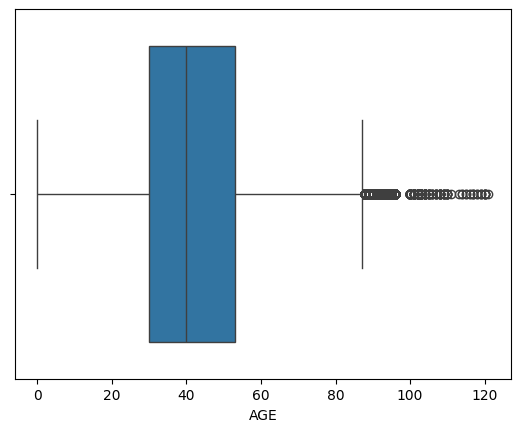

In [49]:
# Checking for outliers in "AGE" column
sns.boxplot(x=df["AGE"])

<Axes: xlabel='AGE'>

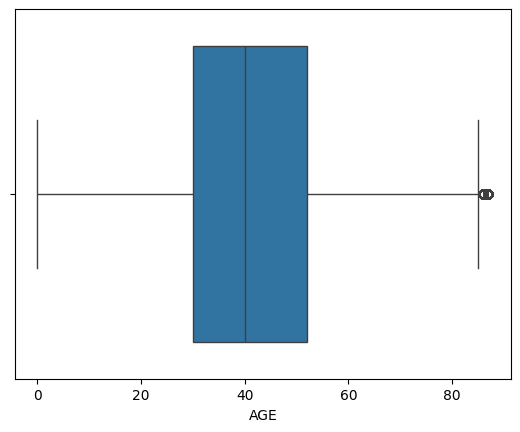

In [50]:
# Removing the outliers in "AGE" column
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['AGE'] >= lower_bound) & (df['AGE'] <= upper_bound)]
sns.boxplot(x=df["AGE"])

In [51]:
# Changing DATE_DIED string format to date format
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], format="%d/%m/%y", errors='ignore')

##### EDA

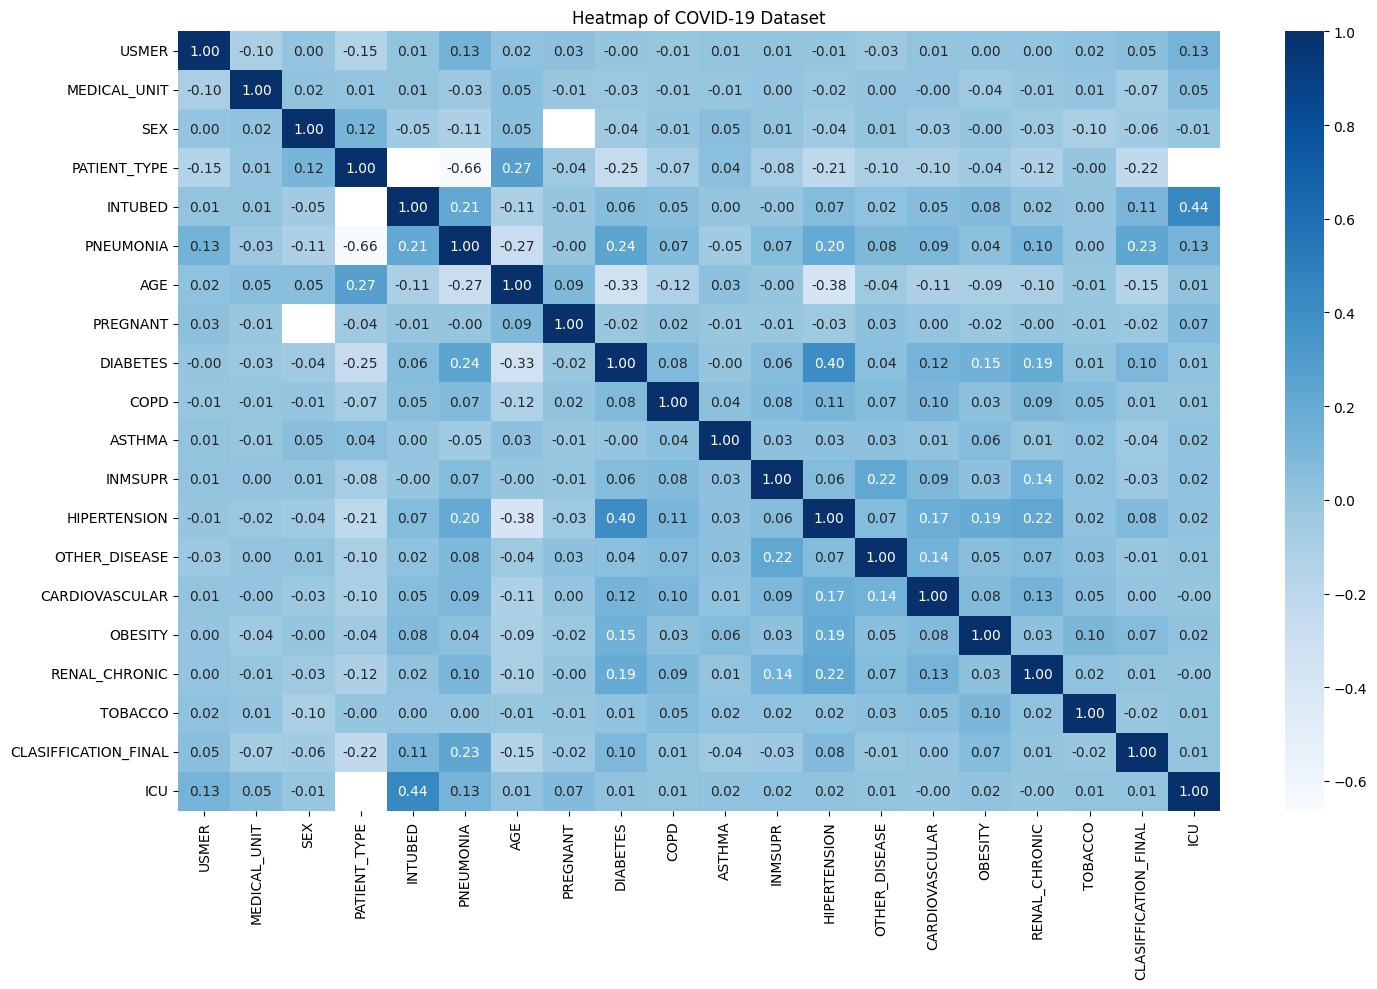

In [17]:
# Plotting heatmap to find correlations in the dataset
plt.figure(figsize=(15, 10))
corr = df.drop("DATE_DIED", axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f",cmap="Blues")
plt.title("Heatmap of COVID-19 Dataset")
plt.tight_layout()
plt.show()

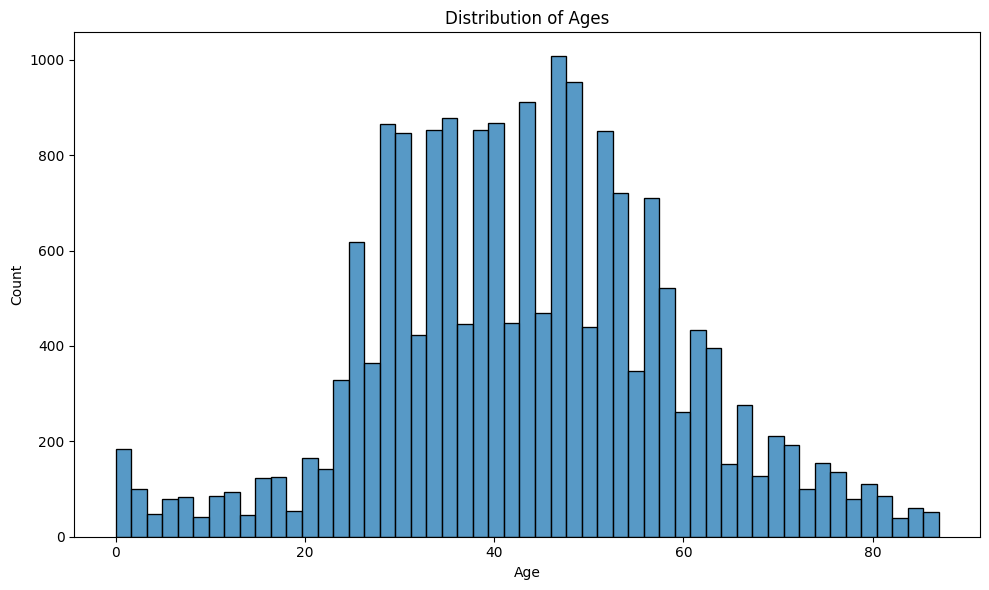

In [18]:
# Plotting the distribution of ages infected with COVID-19
plt.figure(figsize=(10, 6))
sns.histplot(df["AGE"])
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

<ipython-input-19-a7198f6ca9c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=classification, x="CLASIFFICATION_FINAL", y="count", palette="viridis")


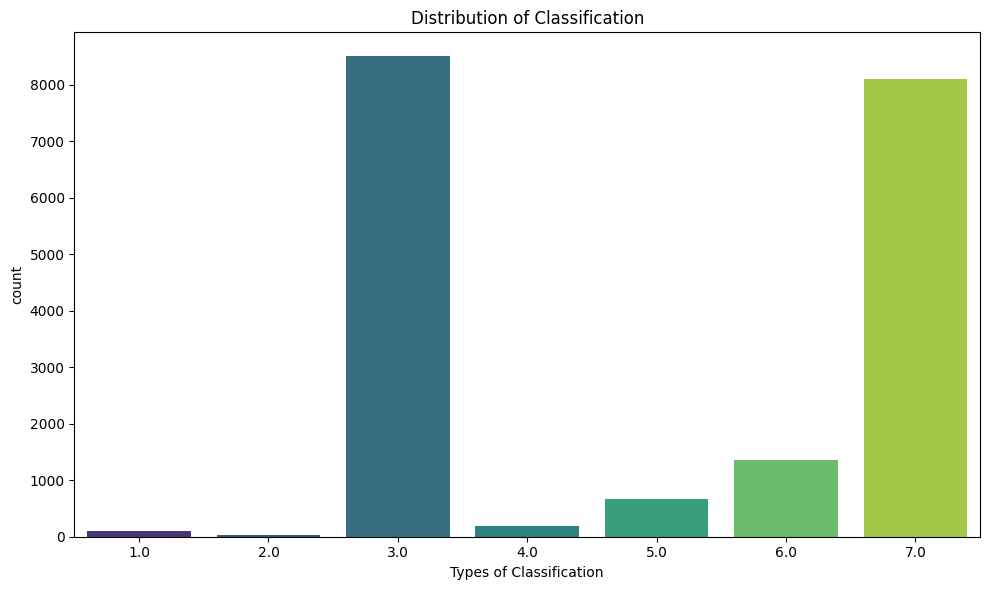

In [19]:
# Plotting the distribution of all classification types
# Class 1-3: Diagnosed with COVID-19 in different severity
# Class 4-7: Not a carrier of COVID-19 or that the test was inconclusive
plt.figure(figsize=(10, 6))
classification = df["CLASIFFICATION_FINAL"].value_counts().reset_index()
sns.barplot(data=classification, x="CLASIFFICATION_FINAL", y="count", palette="viridis")
plt.title("Distribution of Classification")
plt.xlabel("Types of Classification")
plt.tight_layout()
plt.show()

<ipython-input-20-03e46b4cd109>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=patient_type, x="PATIENT_TYPE", y="count", palette="RdBu")


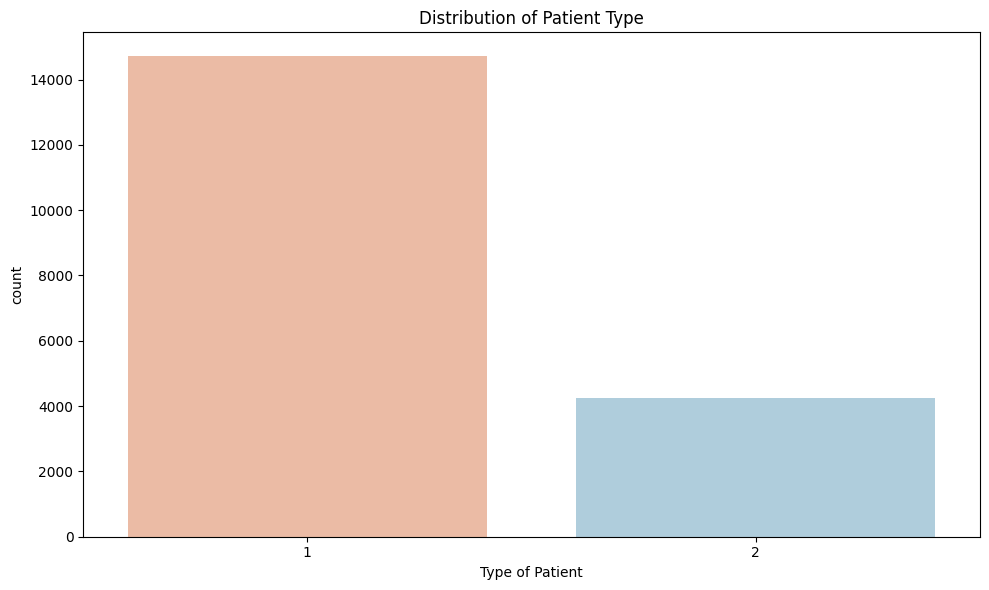

In [20]:
# Plotting the distribution of patient types
# 1: Patient returned home
# 2: Patient is hospitalized
plt.figure(figsize=(10, 6))
patient_type = df["PATIENT_TYPE"].value_counts().reset_index()
sns.barplot(data=patient_type, x="PATIENT_TYPE", y="count", palette="RdBu")
plt.title("Distribution of Patient Type")
plt.xlabel("Type of Patient")
plt.tight_layout()
plt.show()

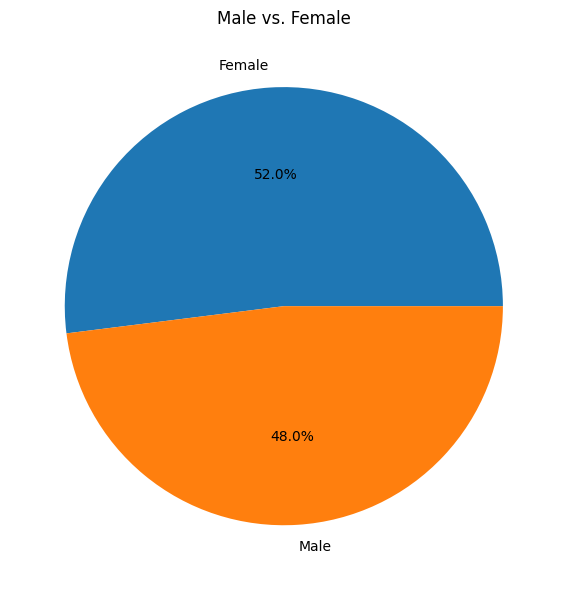

In [21]:
# Plotting the percentage of male vs. female
plt.figure(figsize=(10, 6))
gender = df["SEX"].value_counts().reset_index()
labels = ["Female", "Male"]
plt.pie(gender["count"], labels=labels, autopct="%1.1f%%")
plt.title("Male vs. Female")
plt.tight_layout()
plt.show()

<ipython-input-22-164cc8a0691a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["DATE_DIED"].fillna("Alive", inplace=True)
<ipython-input-22-164cc8a0691a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["DATE_DIED"].replace(unique, "Dead", inplace=True)


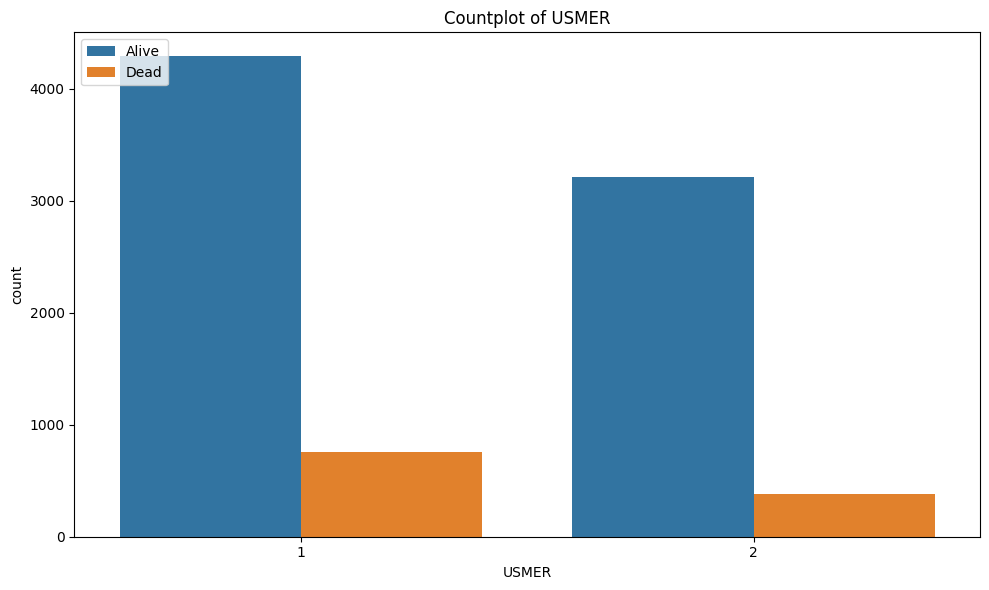

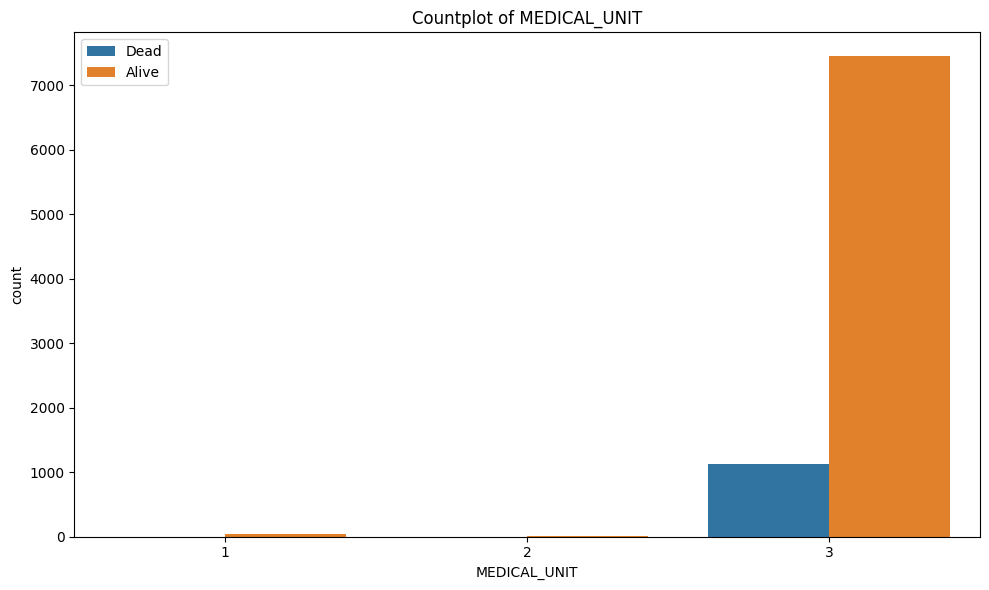

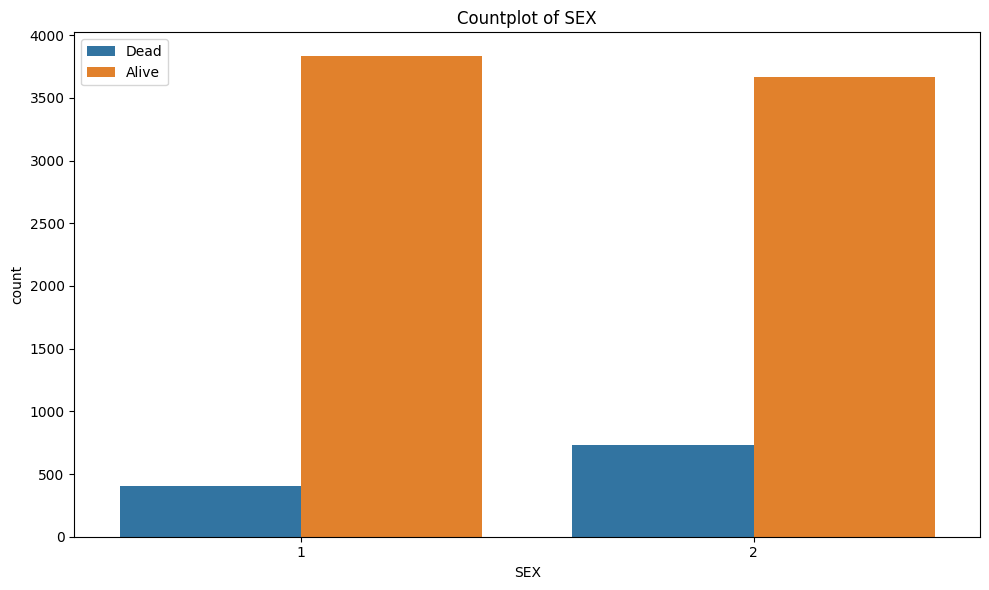

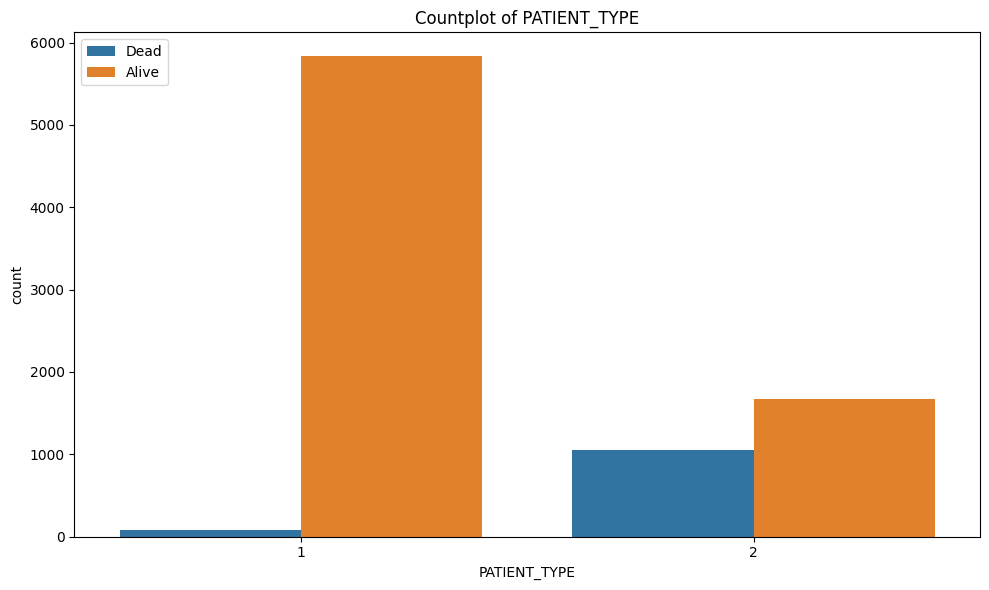

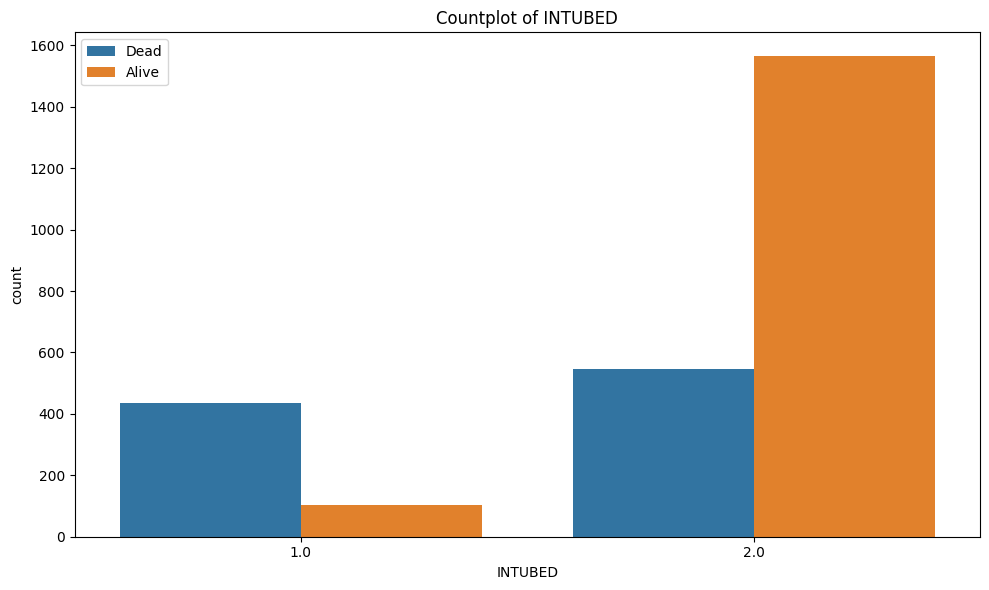

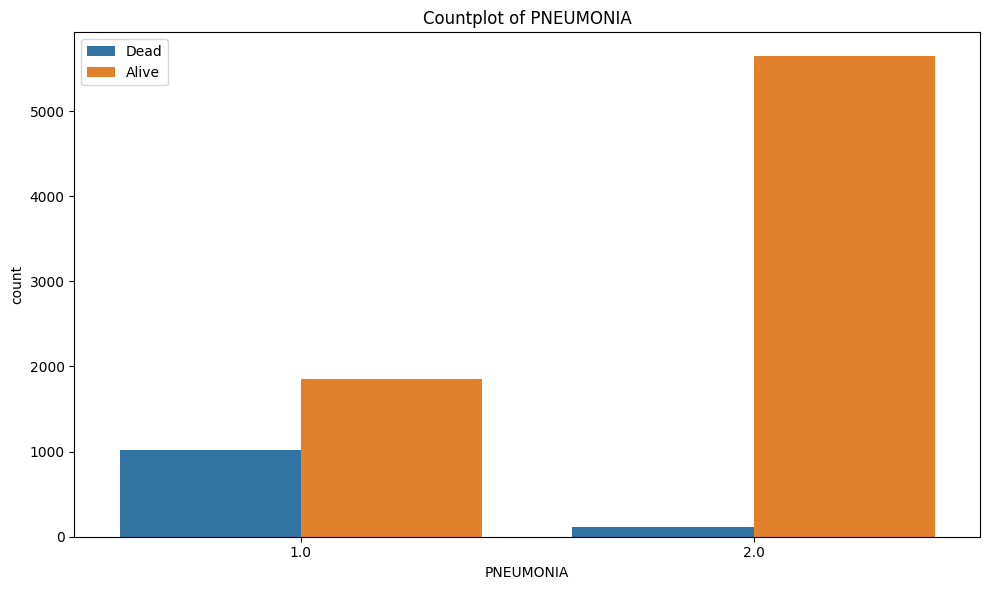

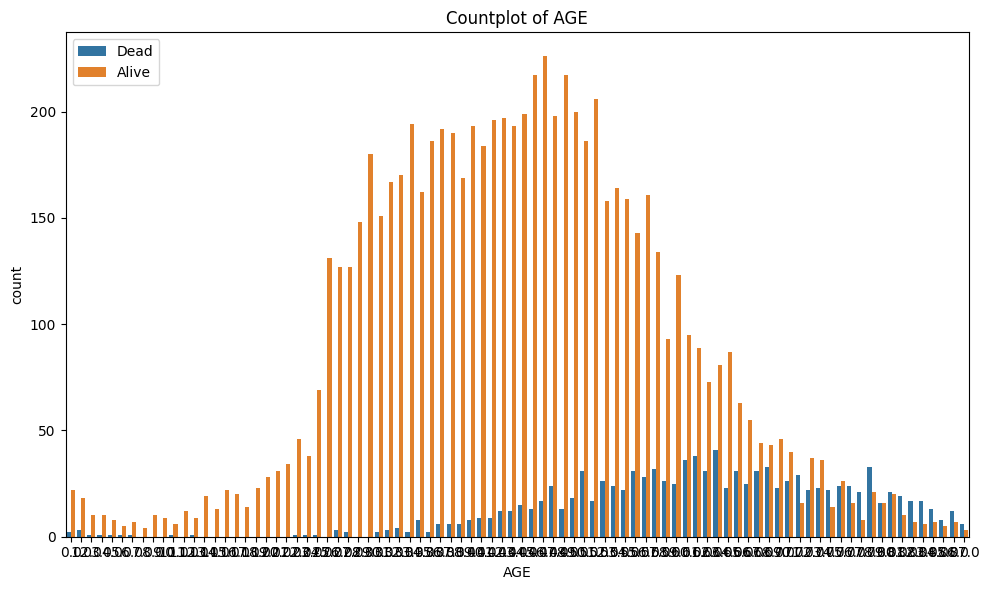

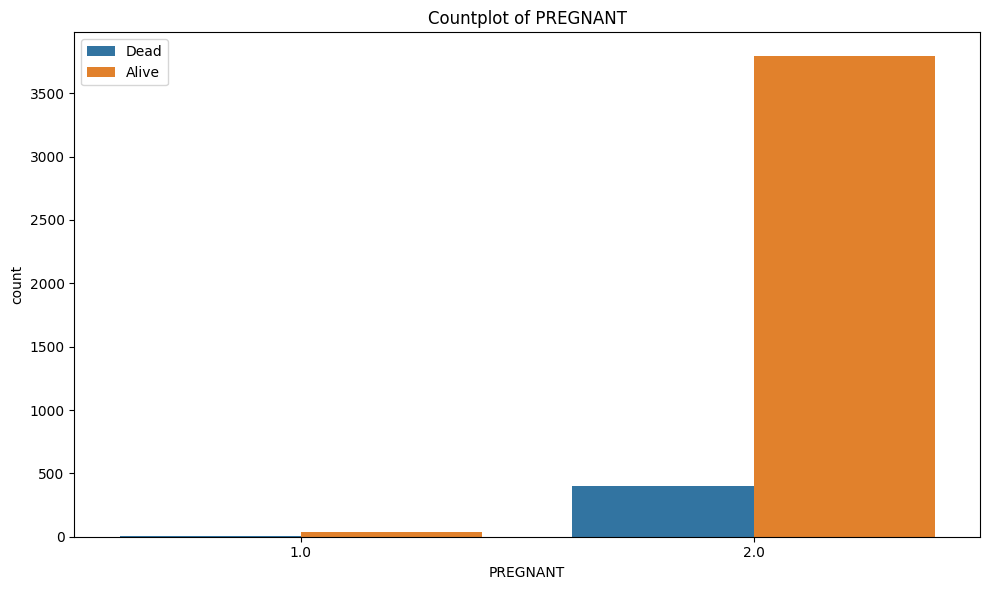

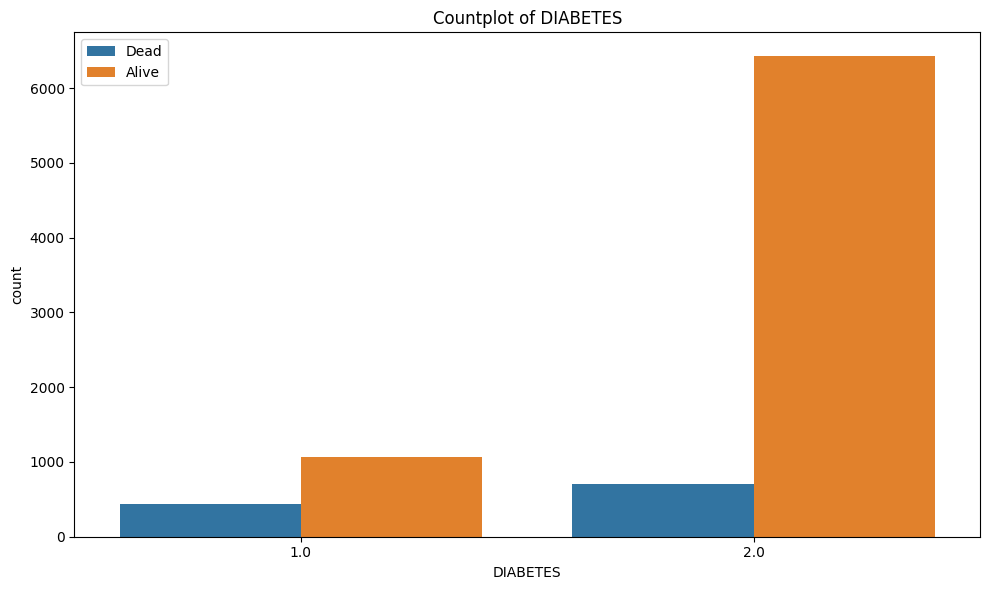

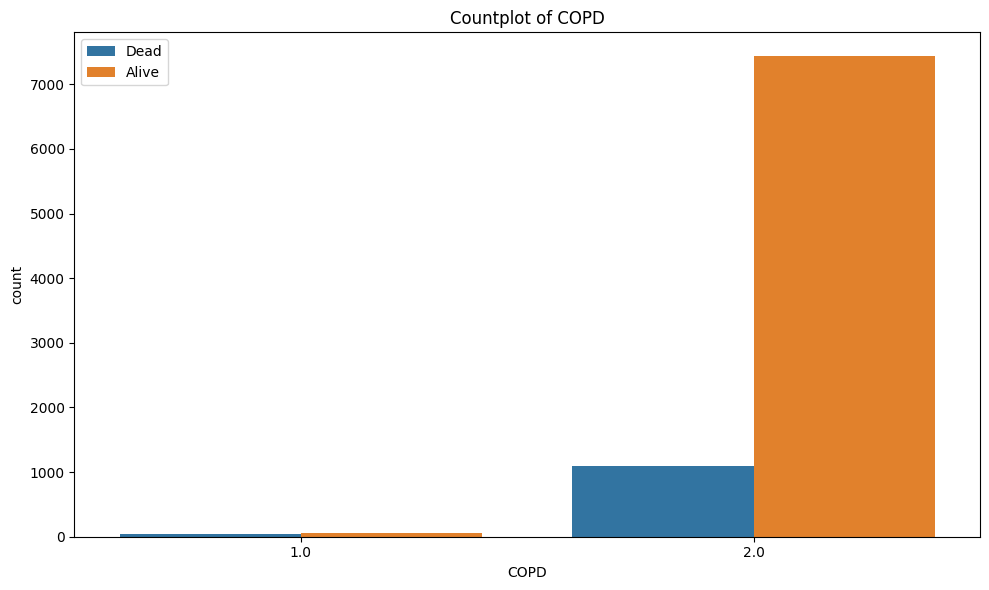

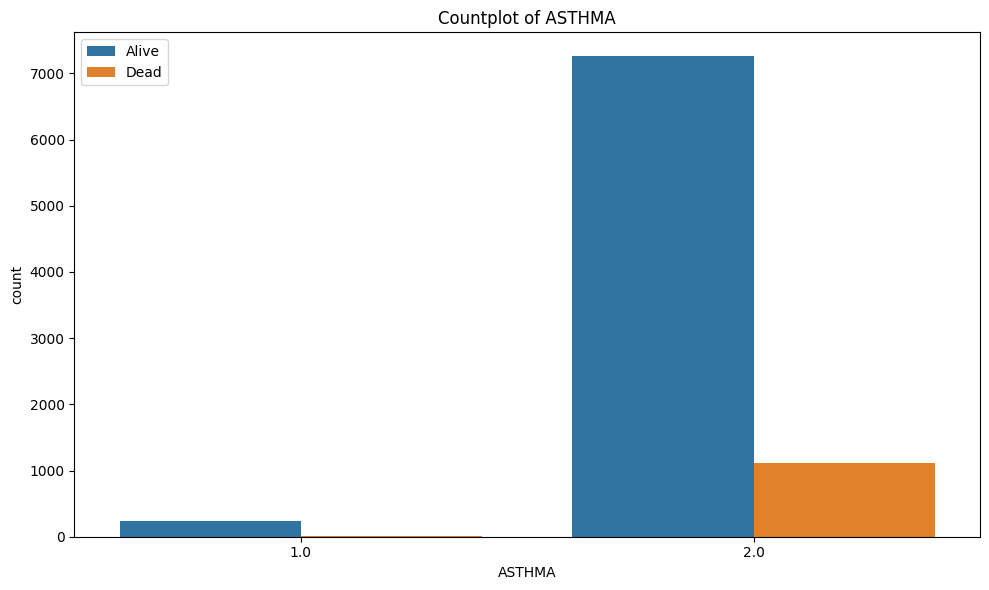

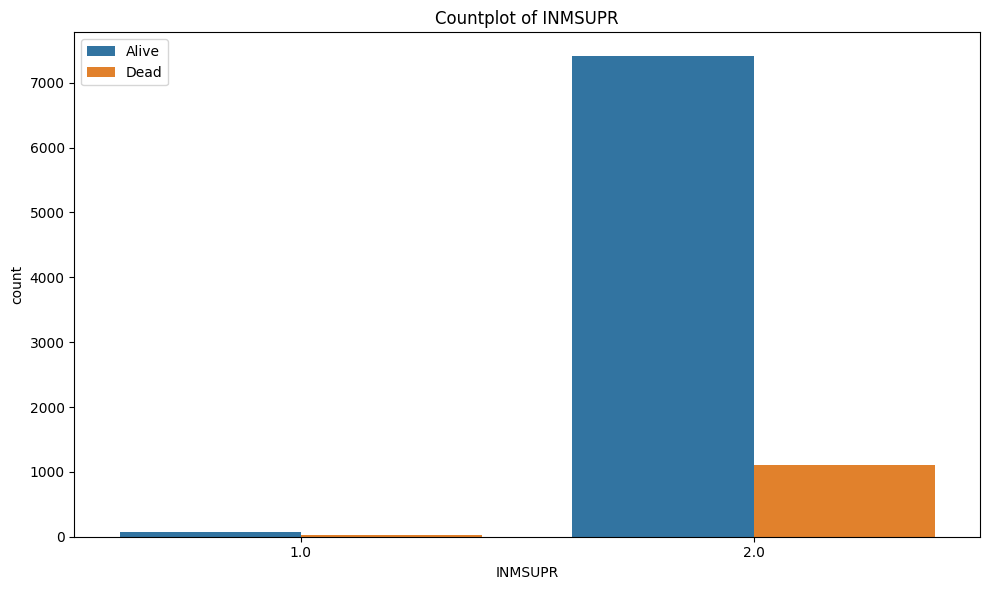

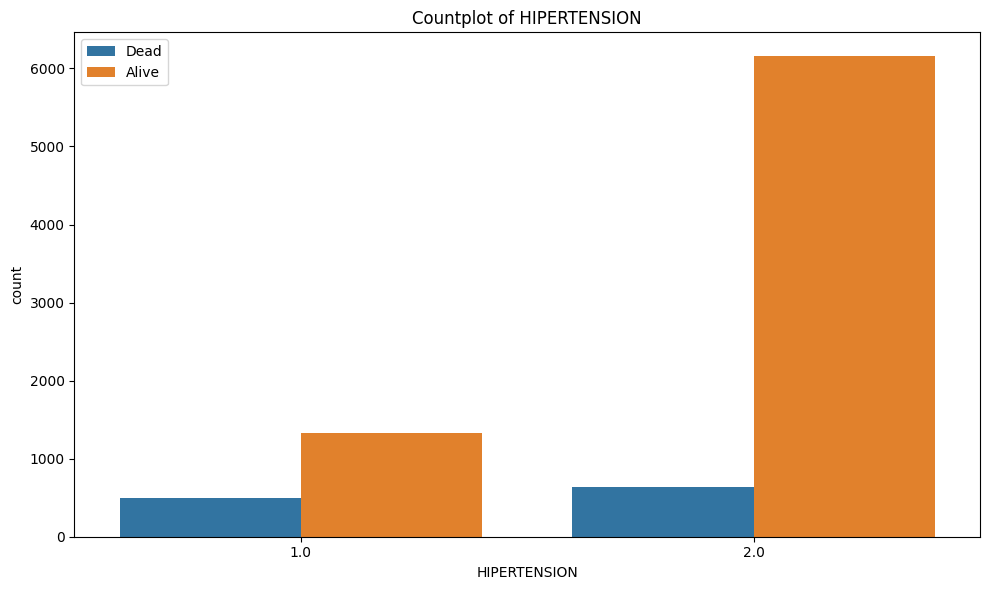

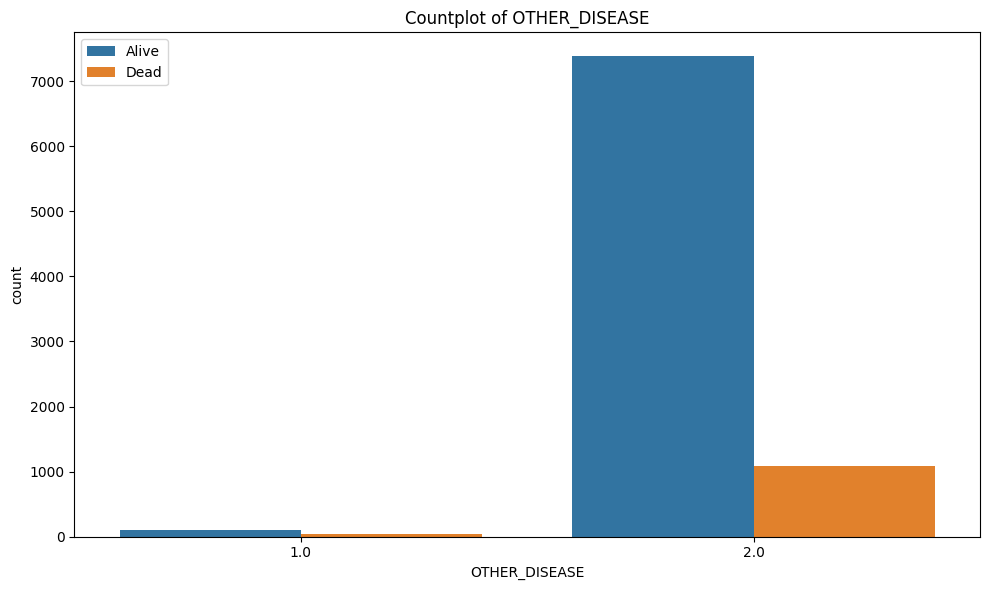

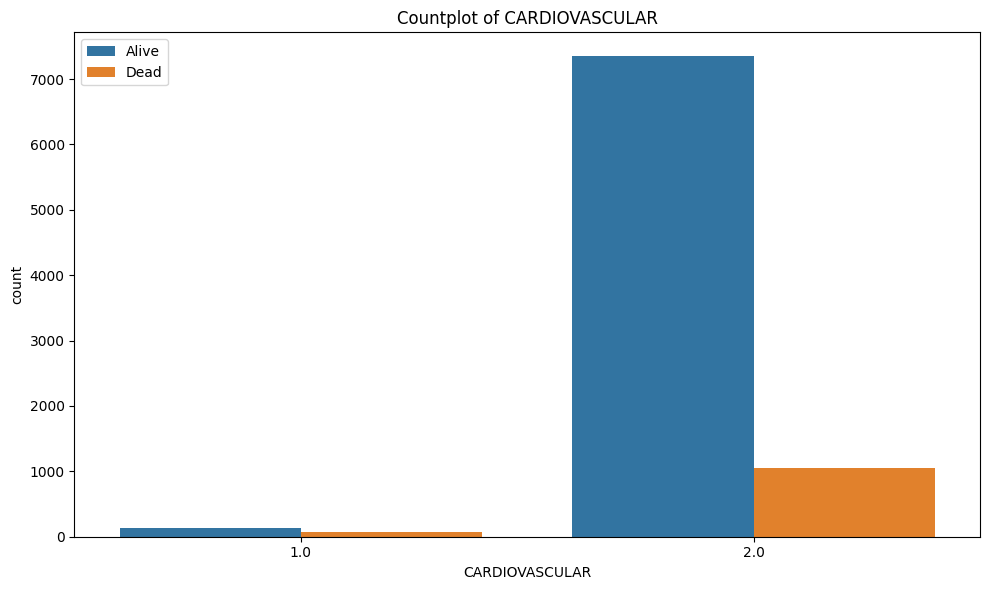

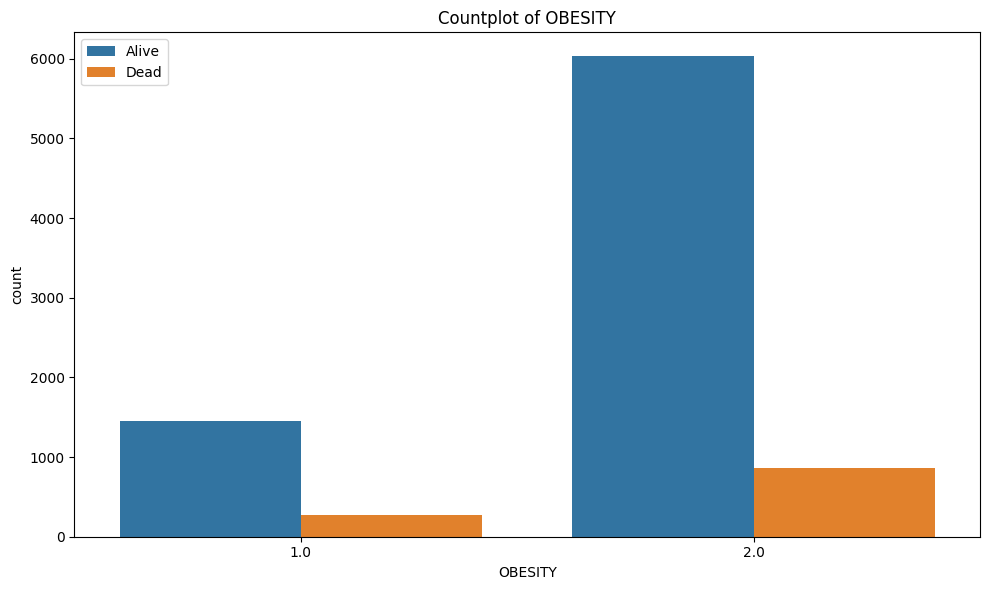

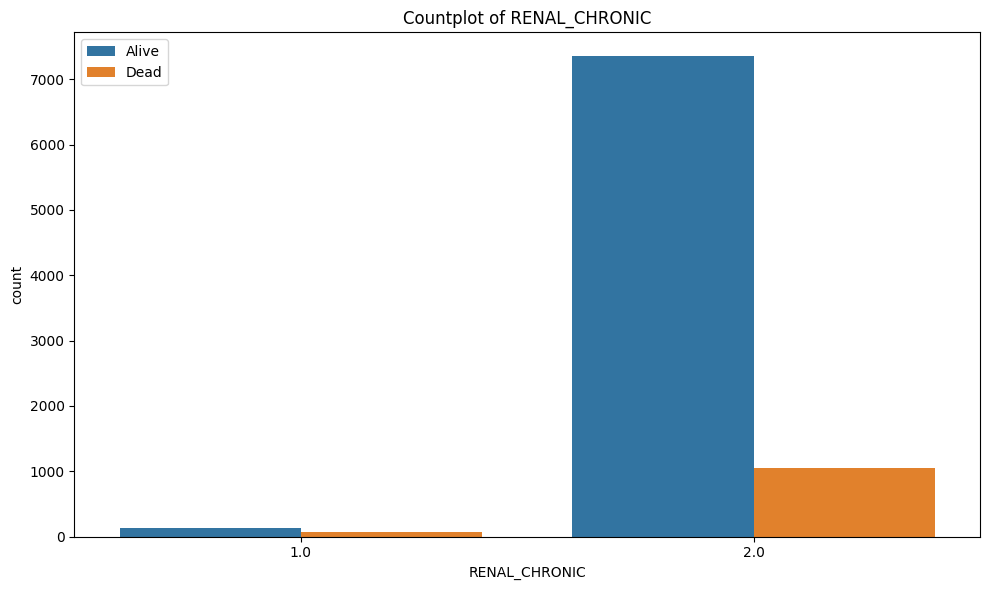

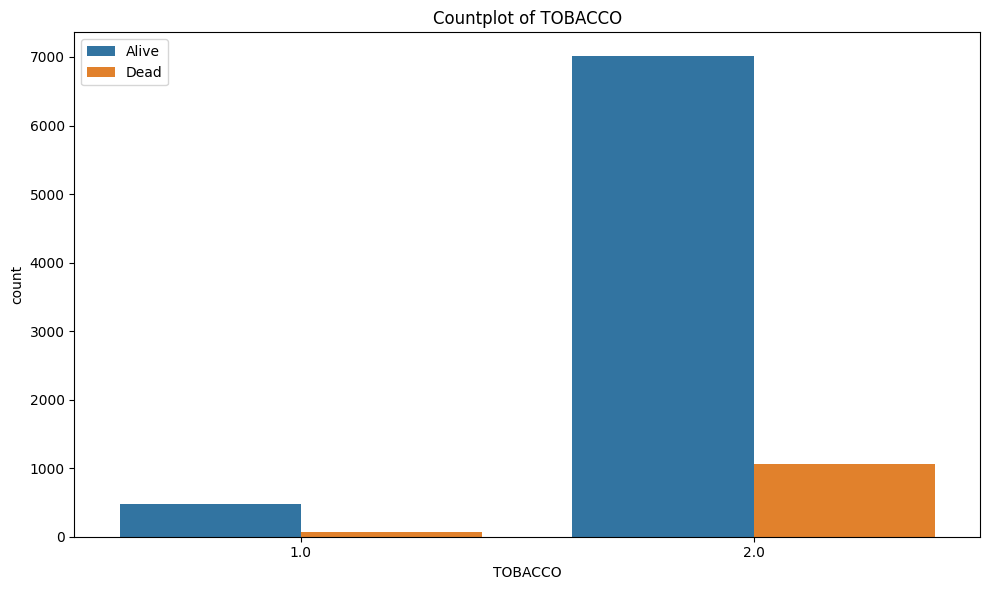

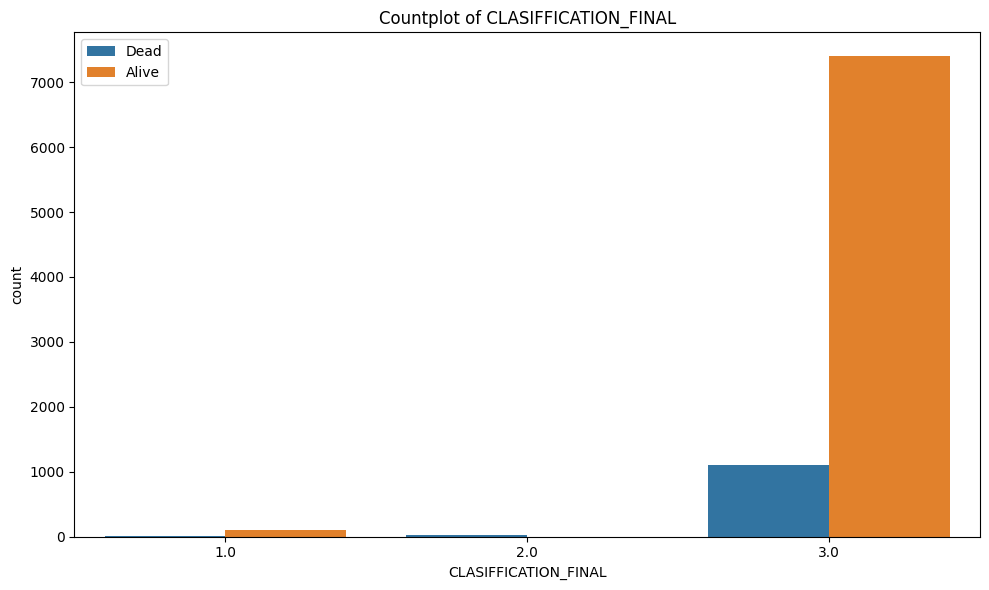

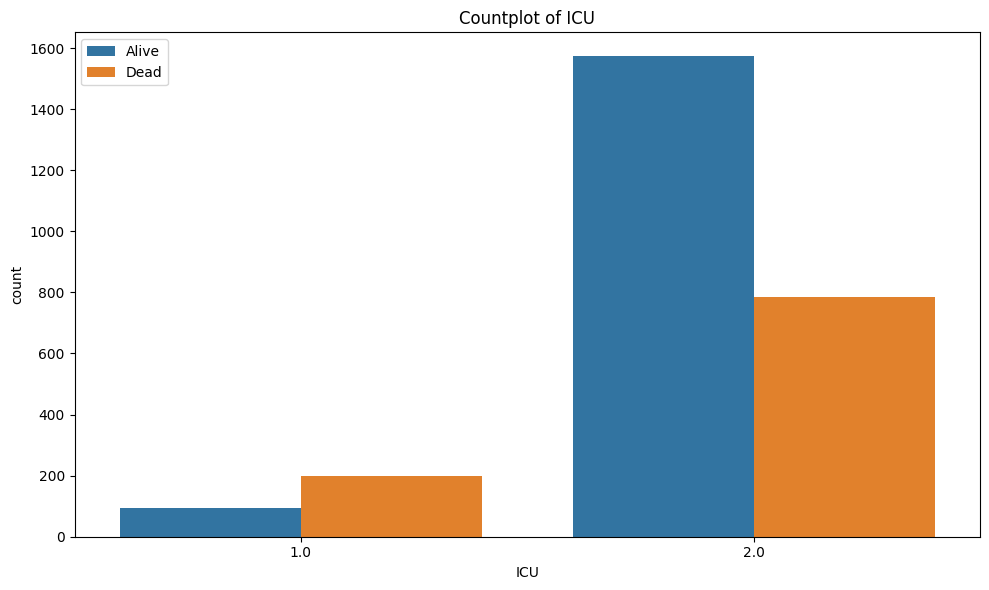

In [22]:
# Countplot of all symptoms & other health problems by number of alive and dead
died = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])]
unique = died["DATE_DIED"].unique()
died["DATE_DIED"].fillna("Alive", inplace=True)
died["DATE_DIED"].replace(unique, "Dead", inplace=True)

symptoms = ["USMER", "MEDICAL_UNIT", "SEX", "PATIENT_TYPE", "INTUBED", "PNEUMONIA",
            "AGE", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE",
            "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "CLASIFFICATION_FINAL", "ICU"]

for symptom in symptoms:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=died[symptom],hue=died["DATE_DIED"])
  plt.title(f"Countplot of {symptoms[symptoms.index(symptom)]}")
  plt.legend(loc="upper left")
  plt.tight_layout()
  plt.show()

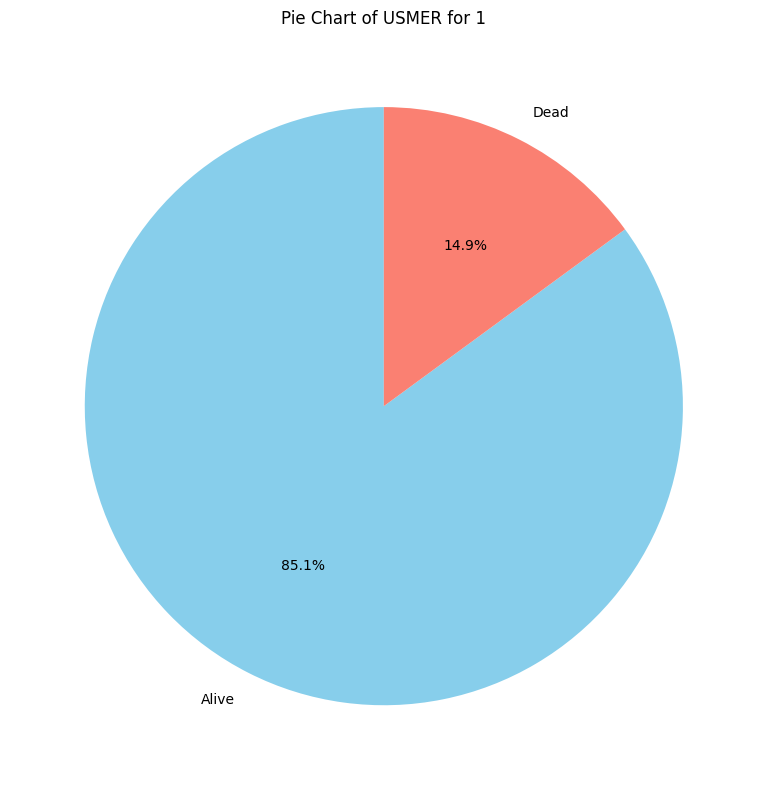

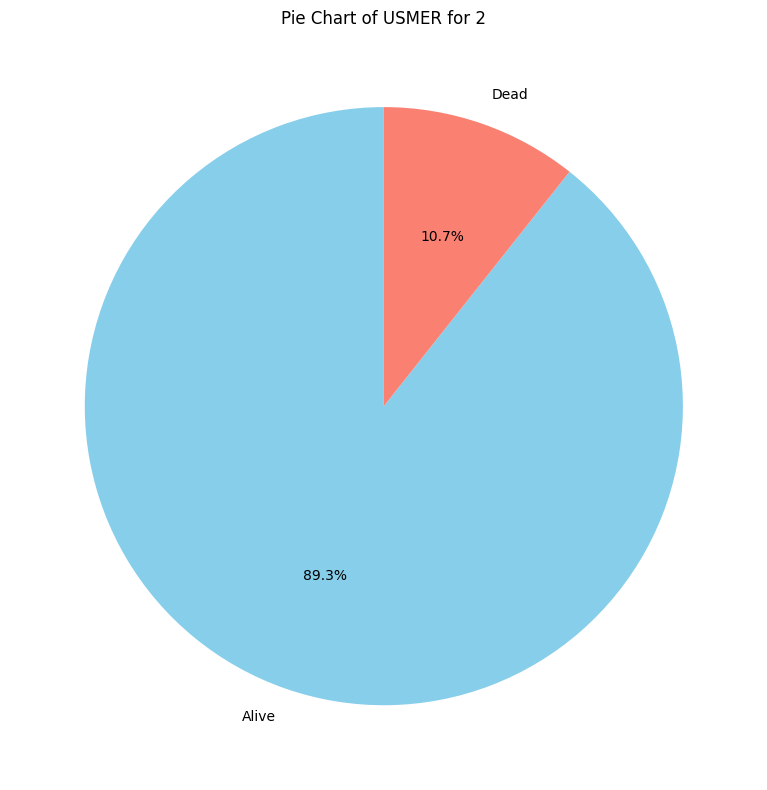

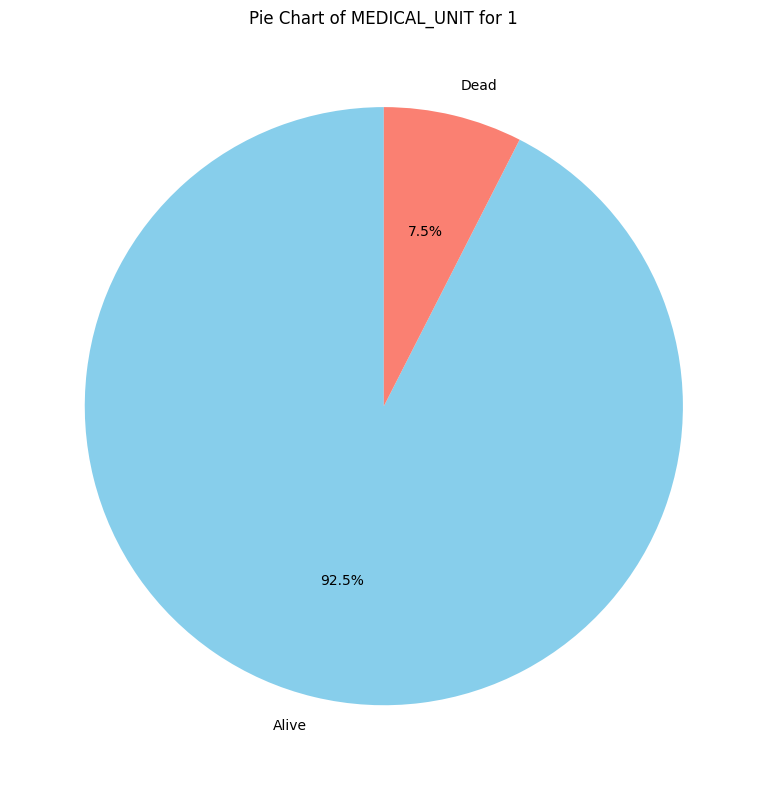

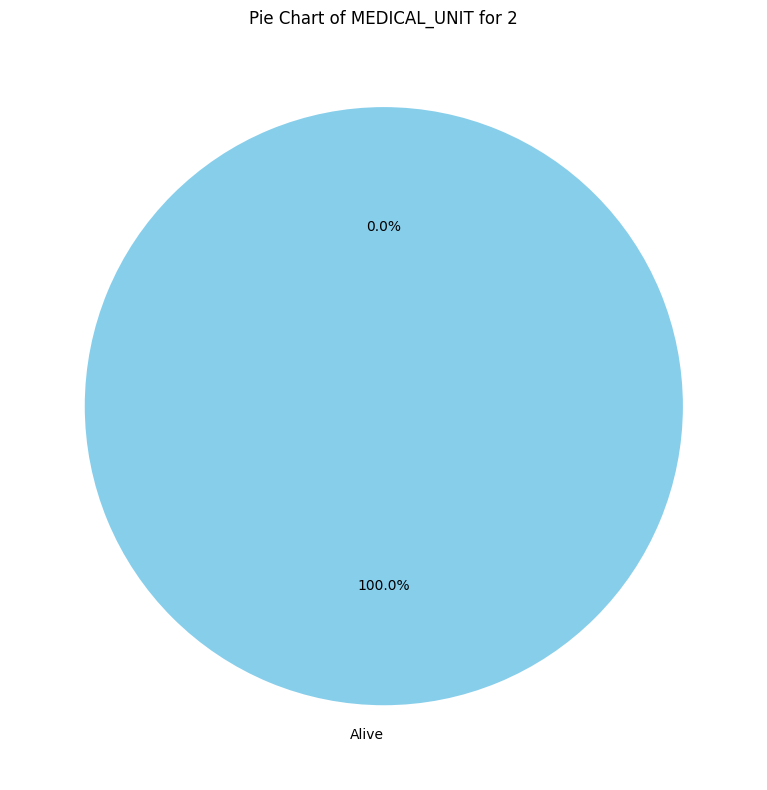

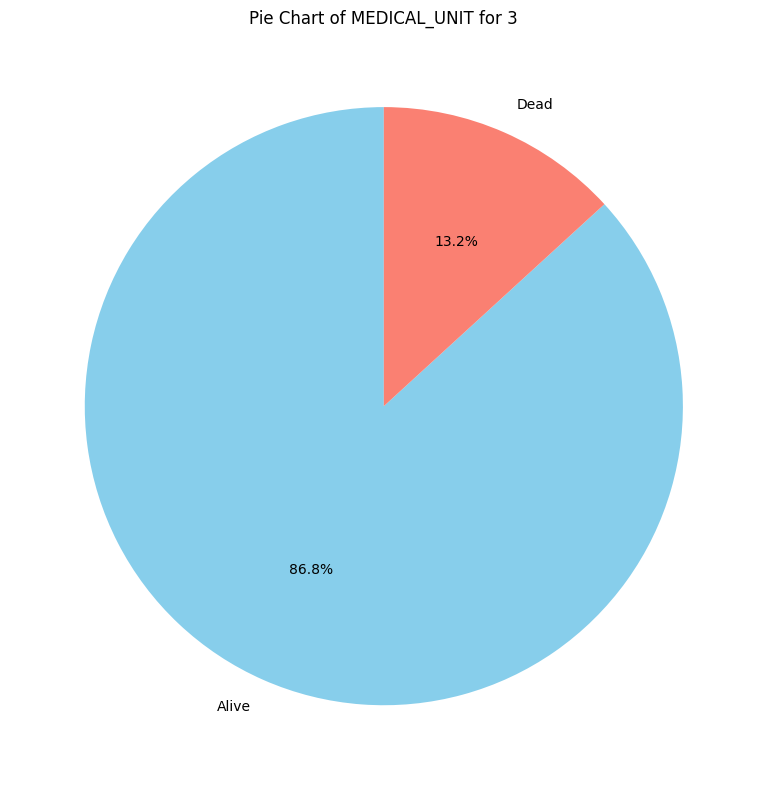

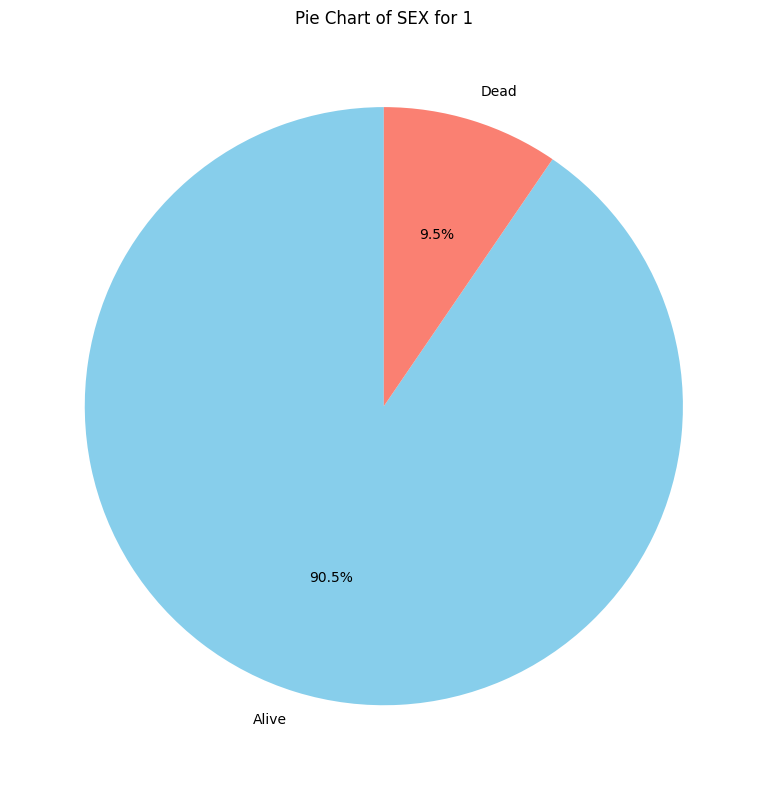

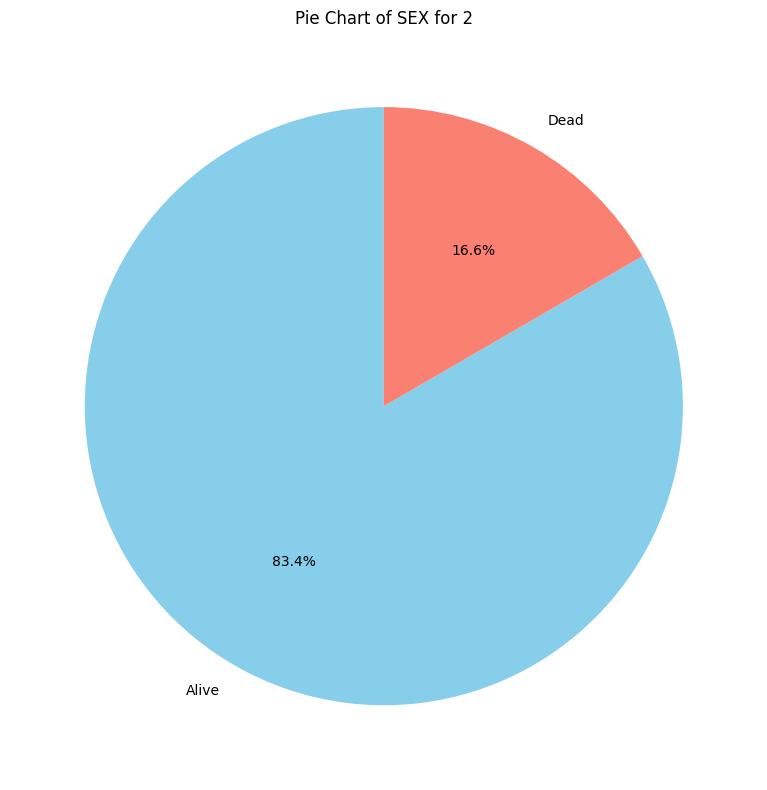

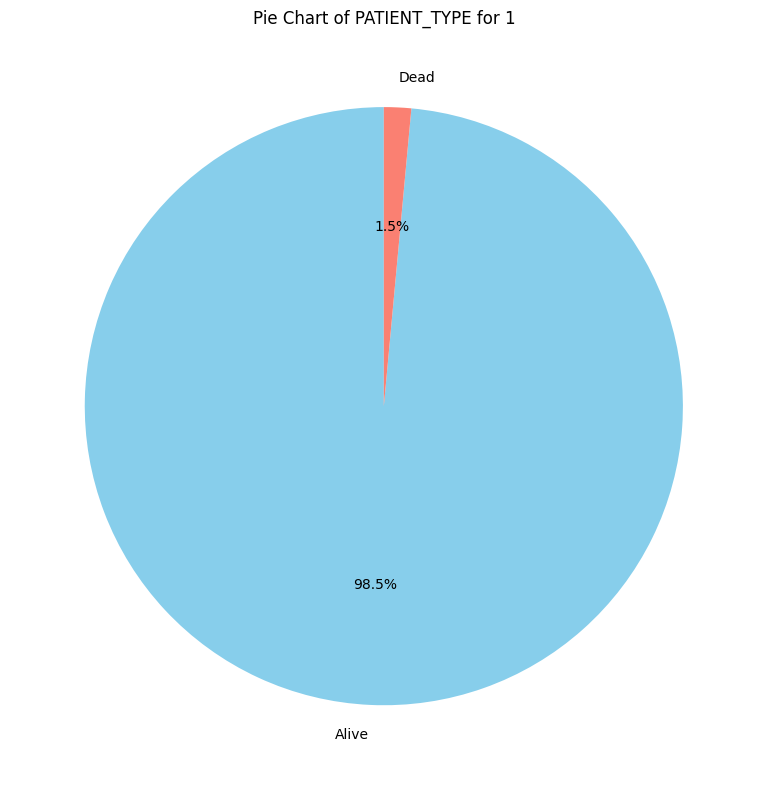

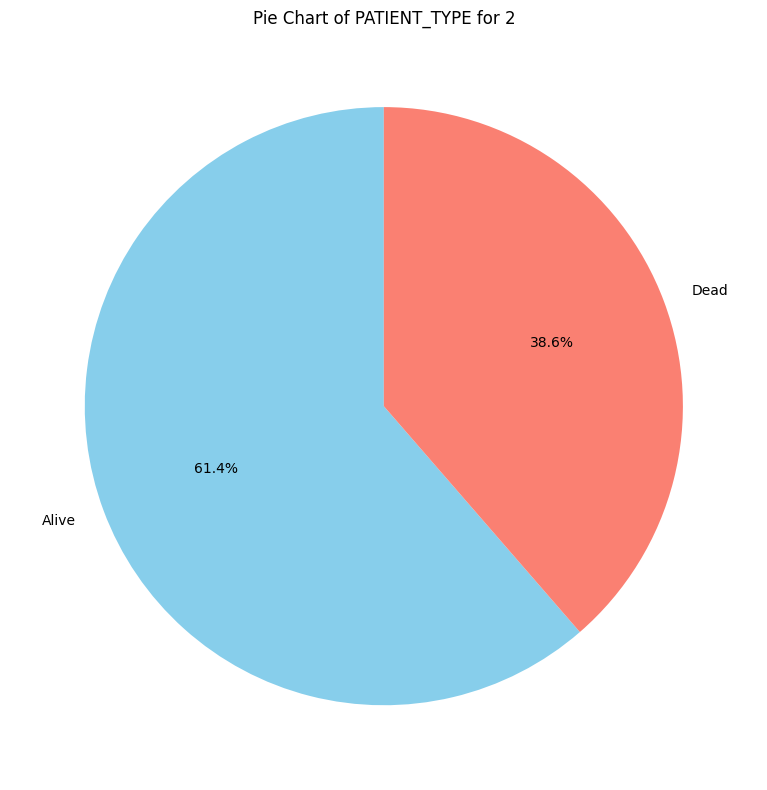

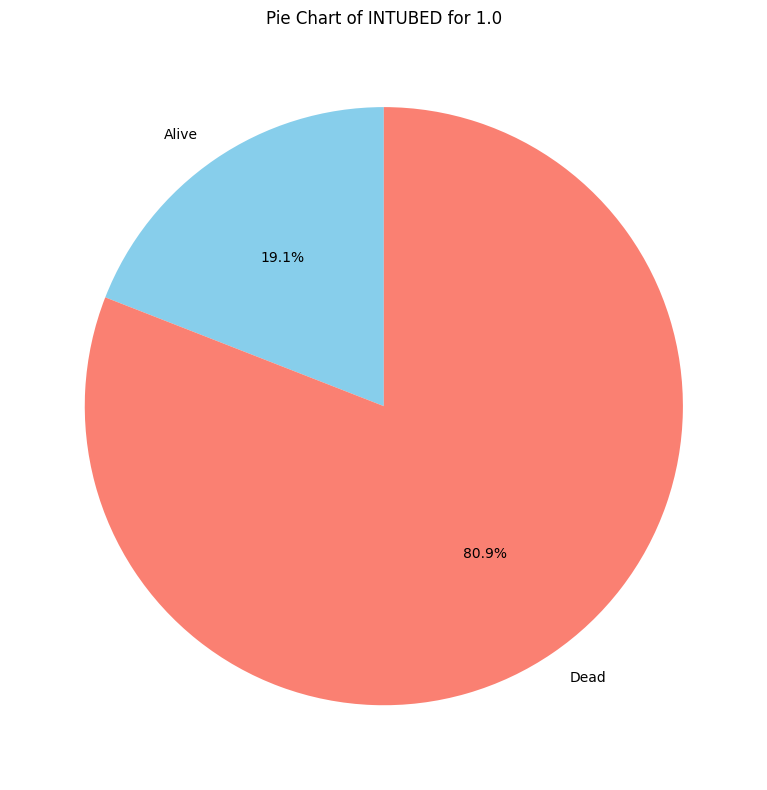

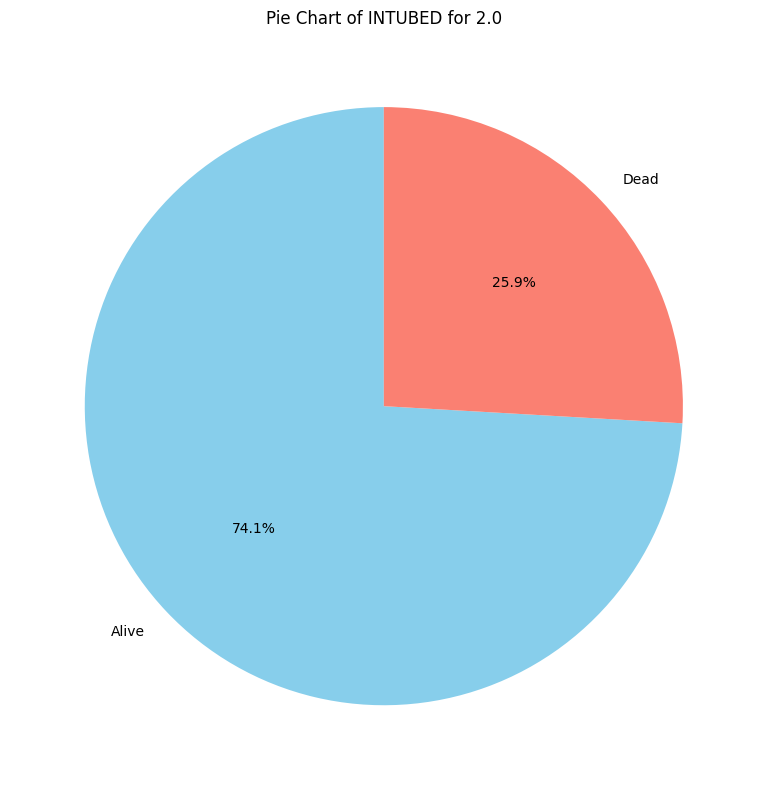

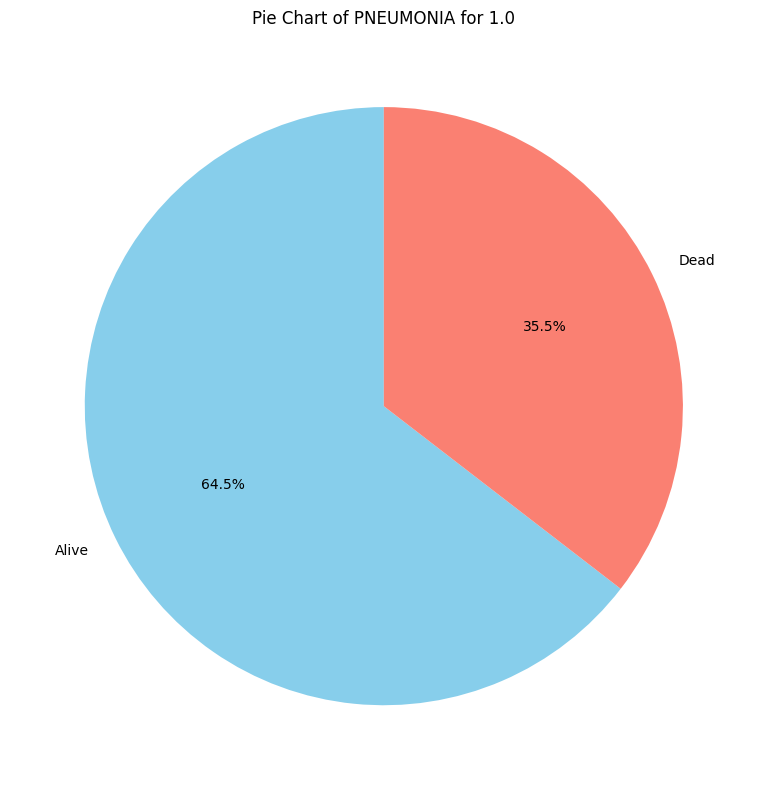

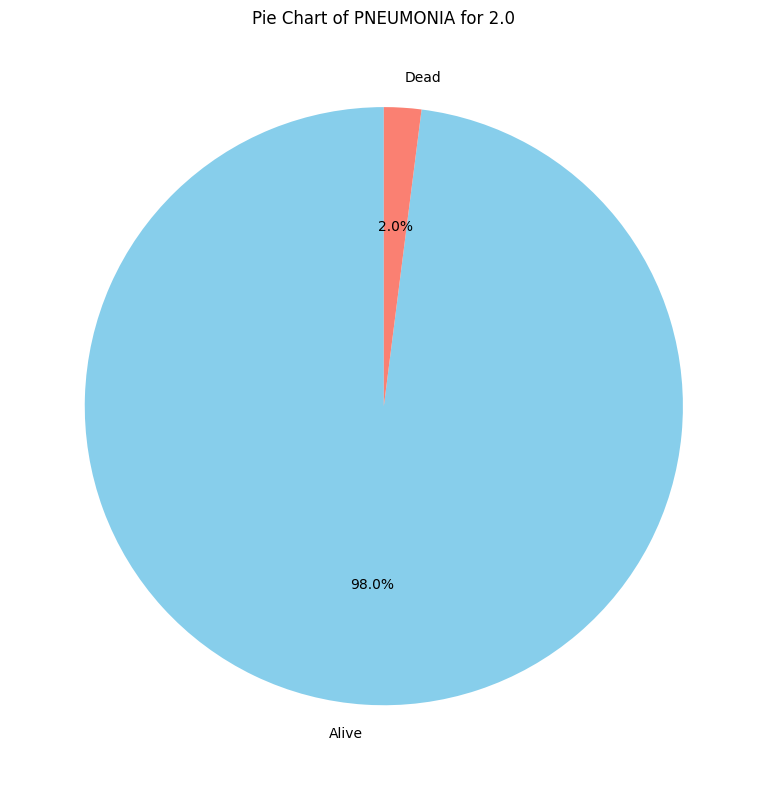

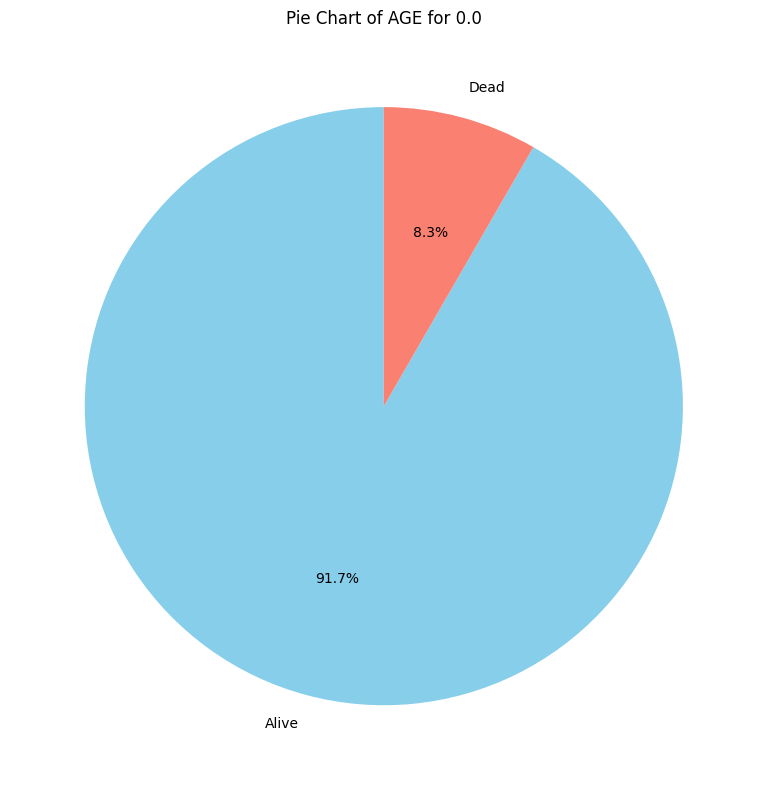

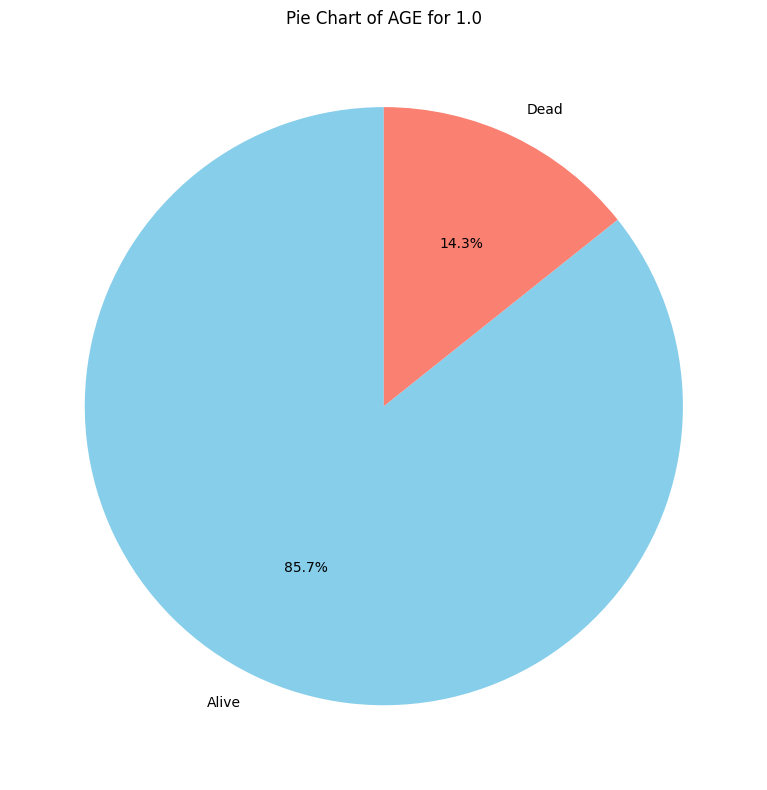

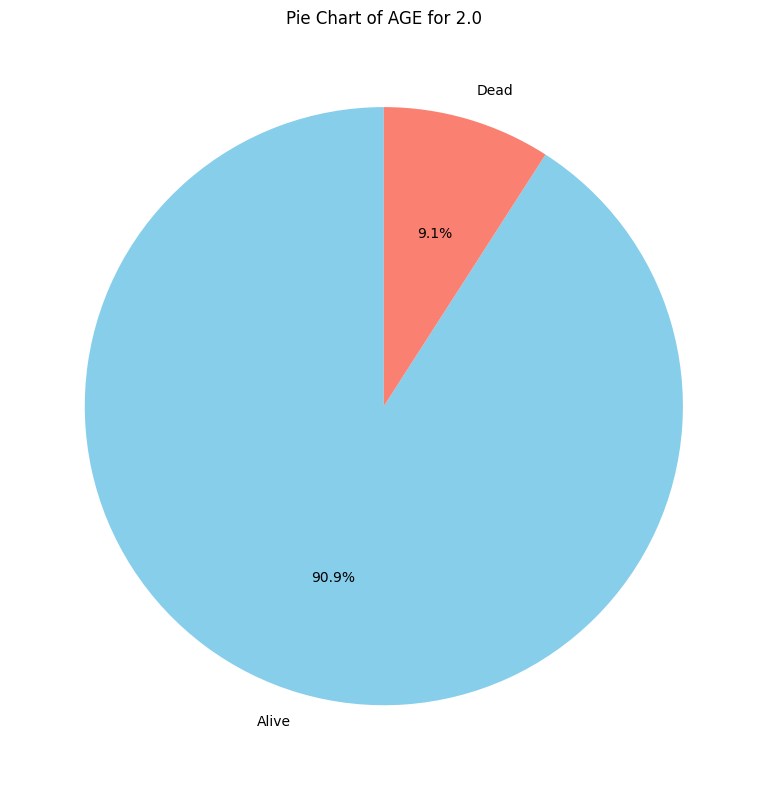

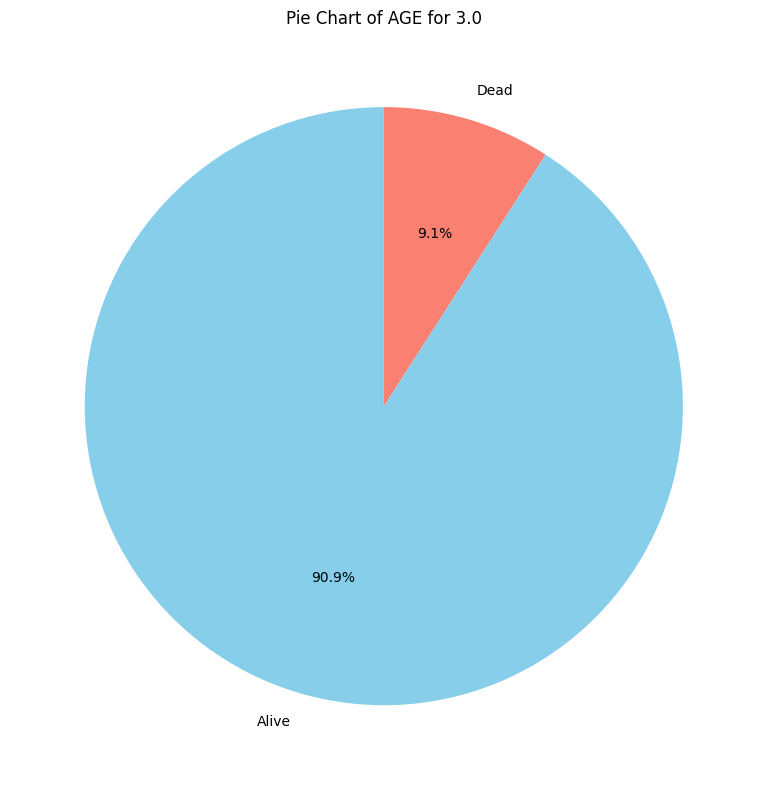

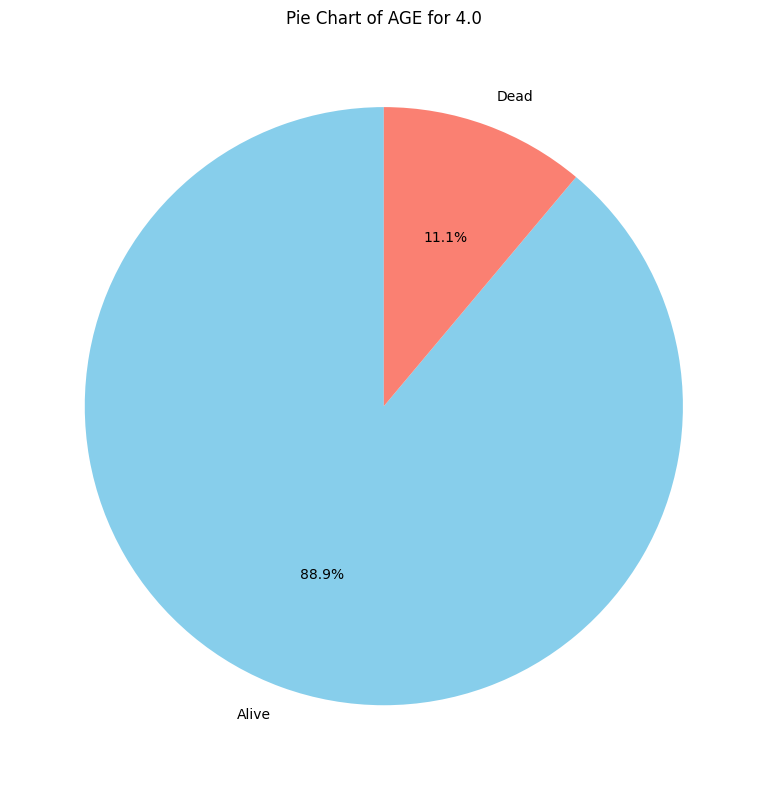

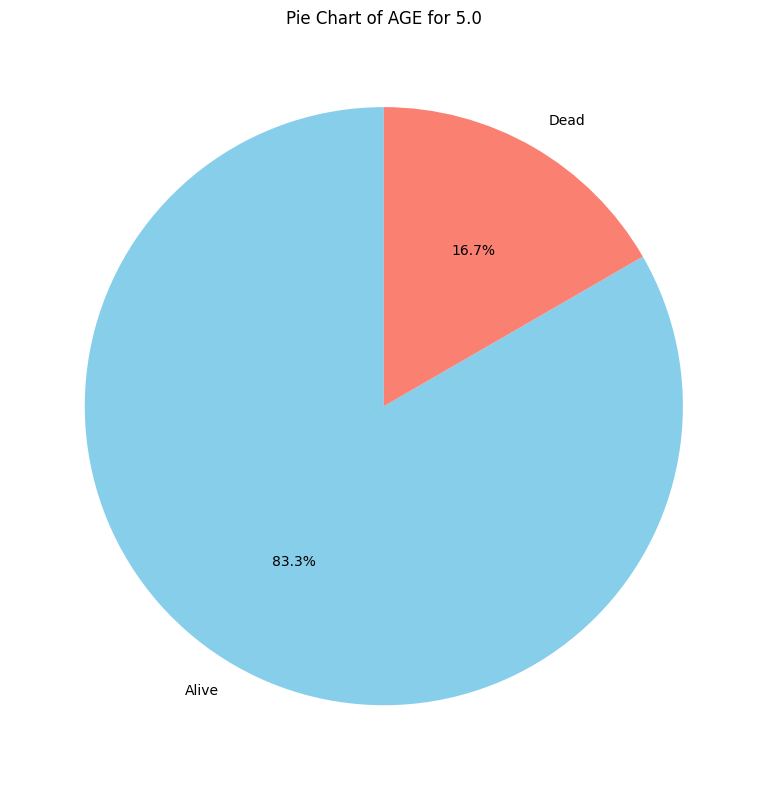

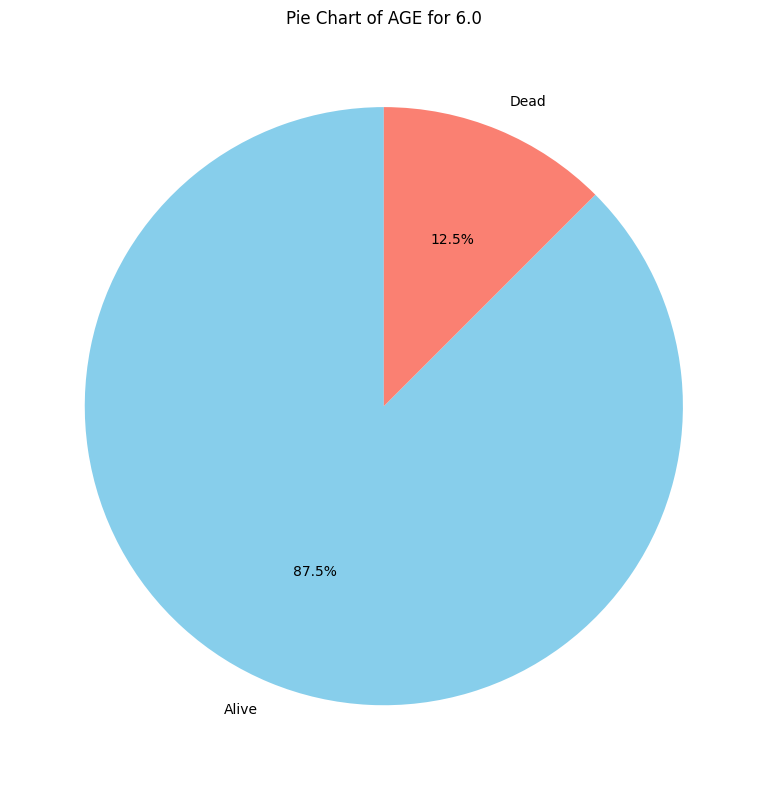

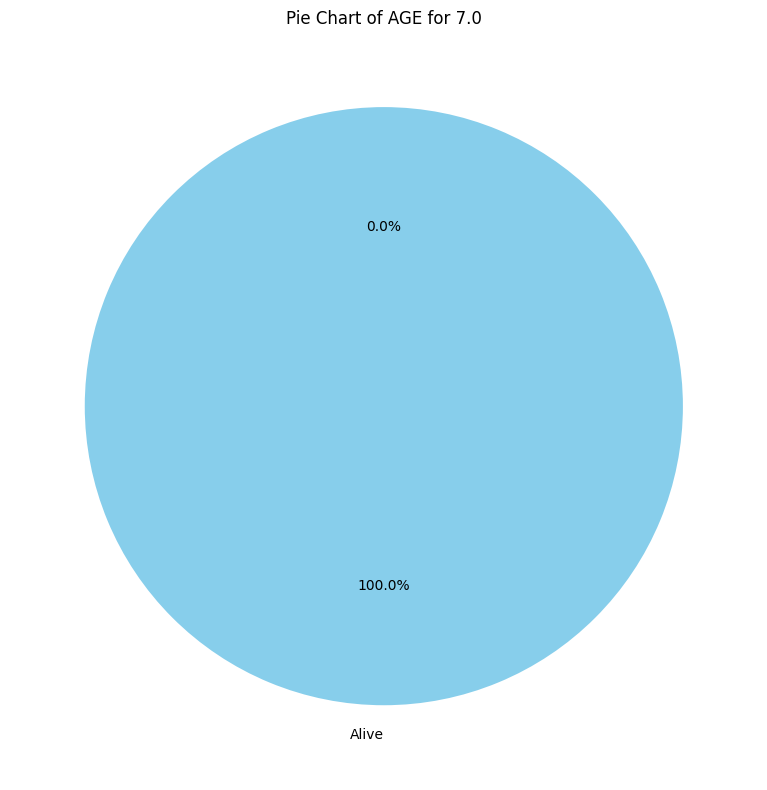

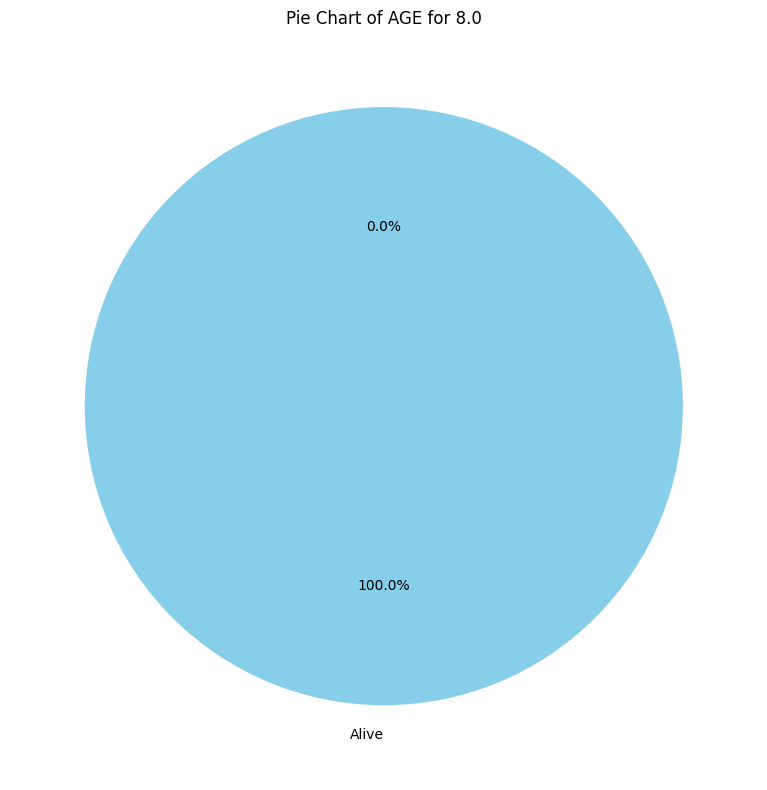

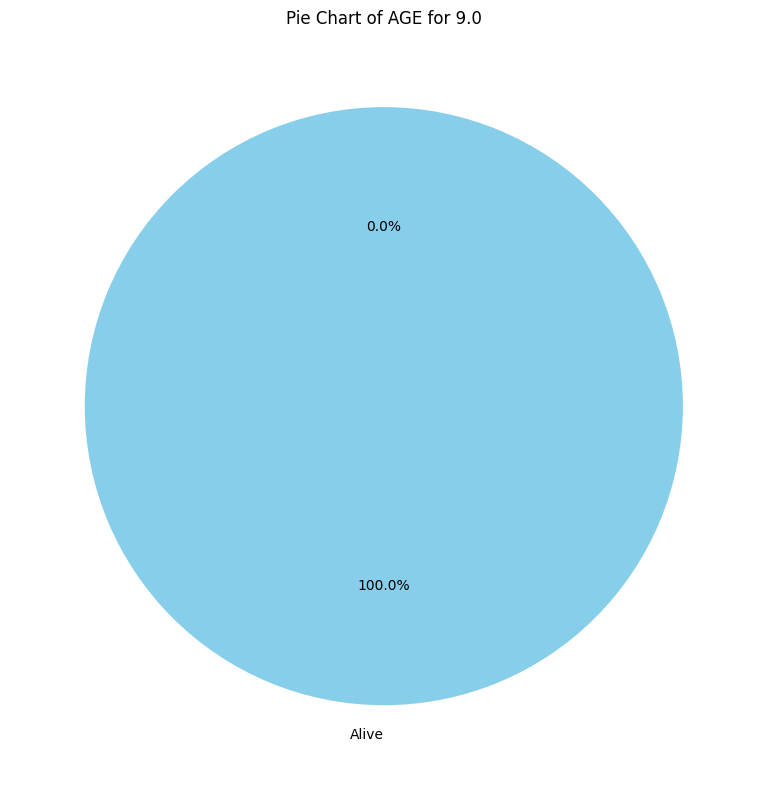

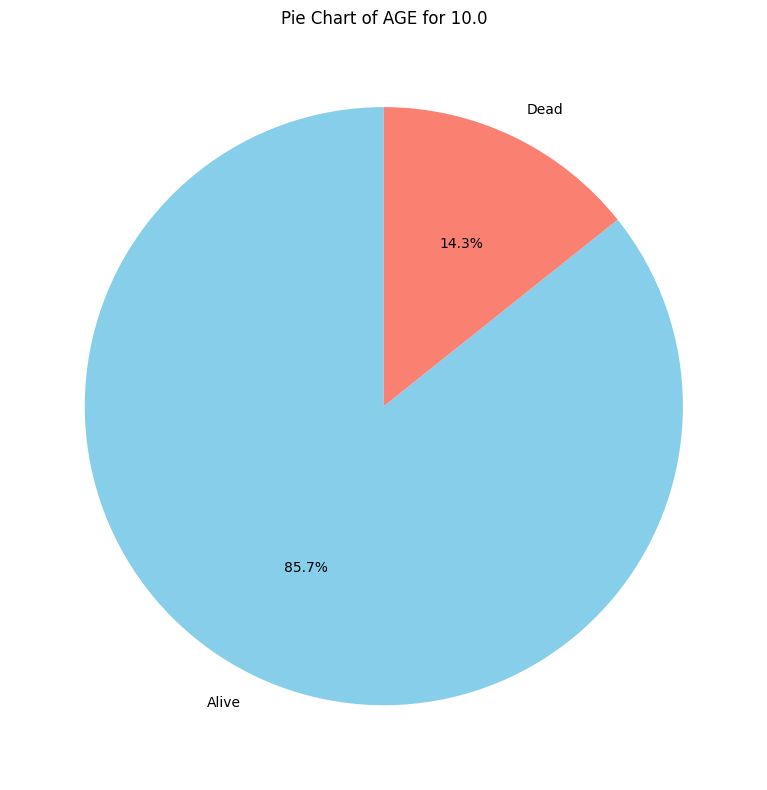

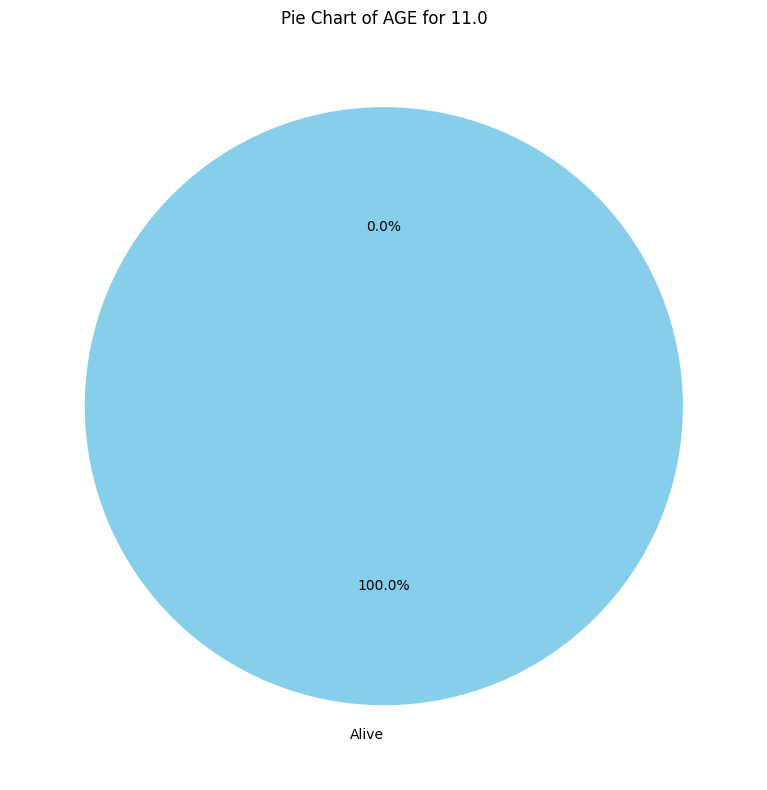

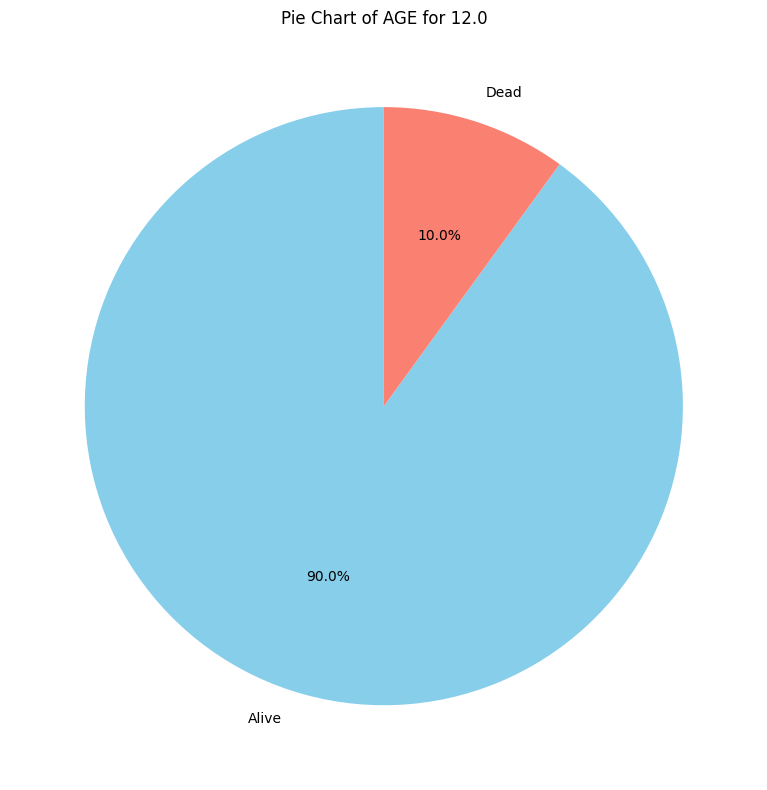

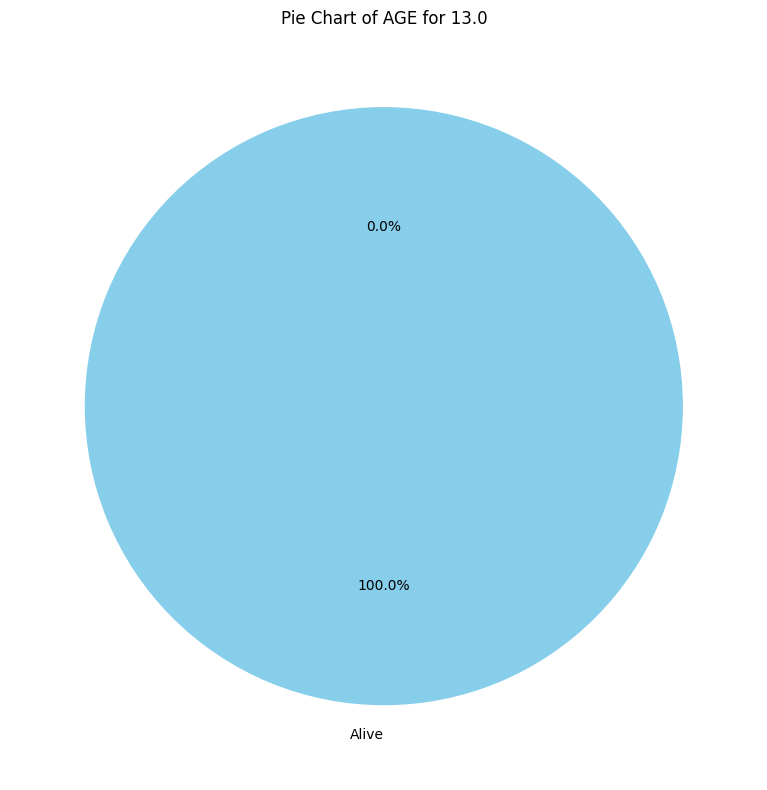

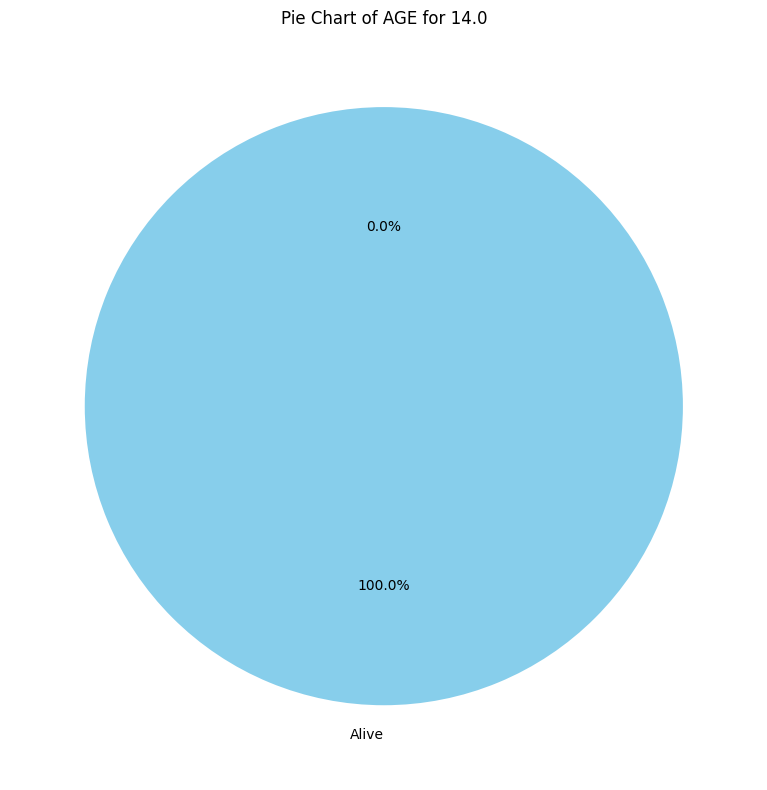

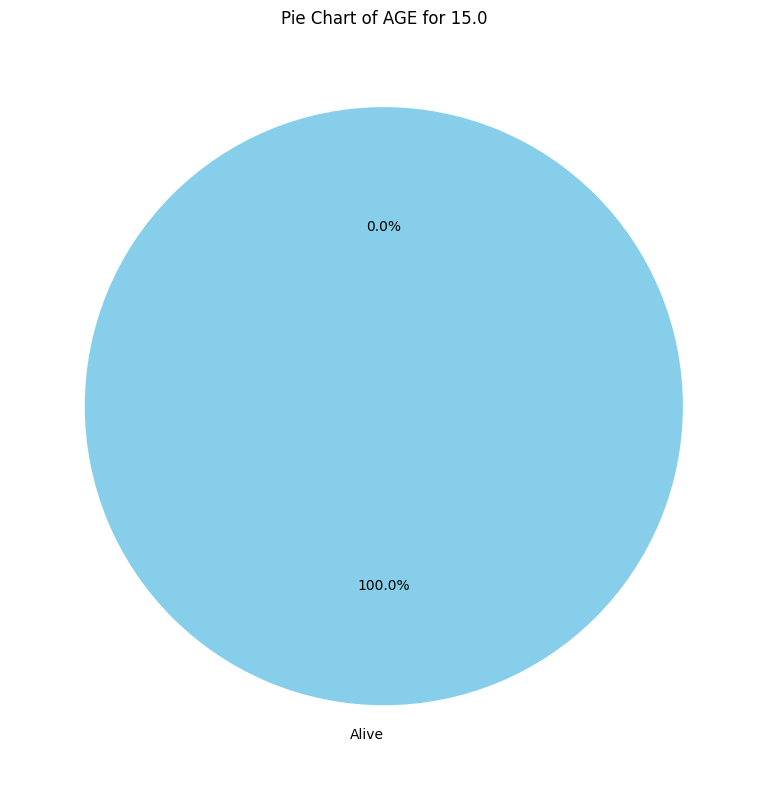

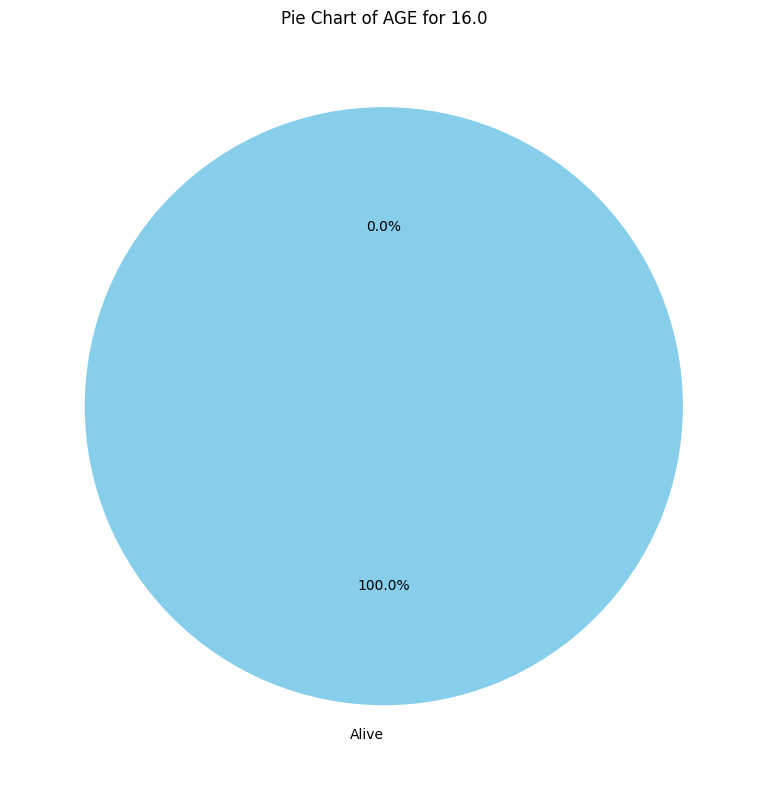

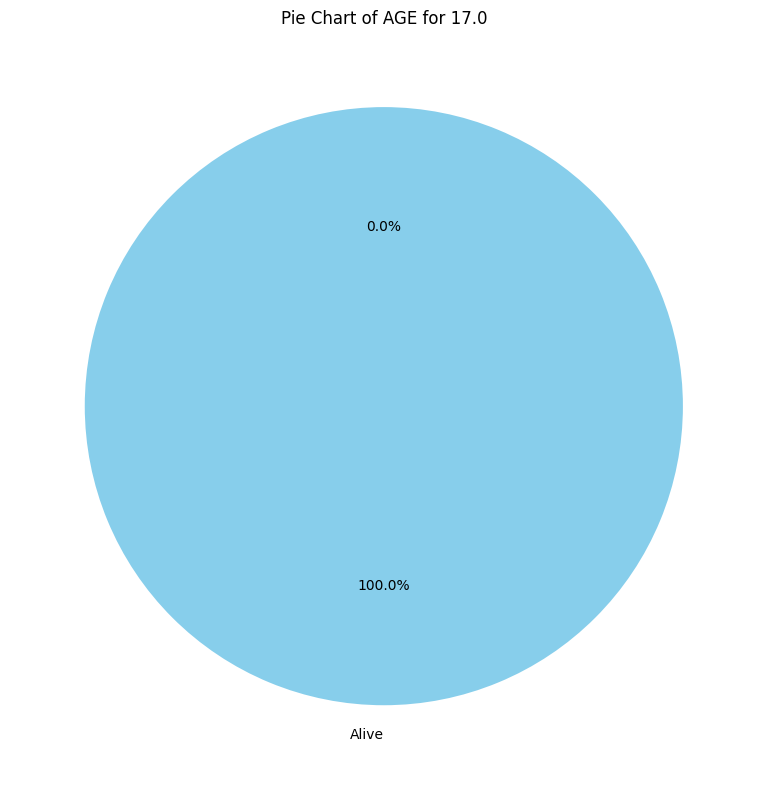

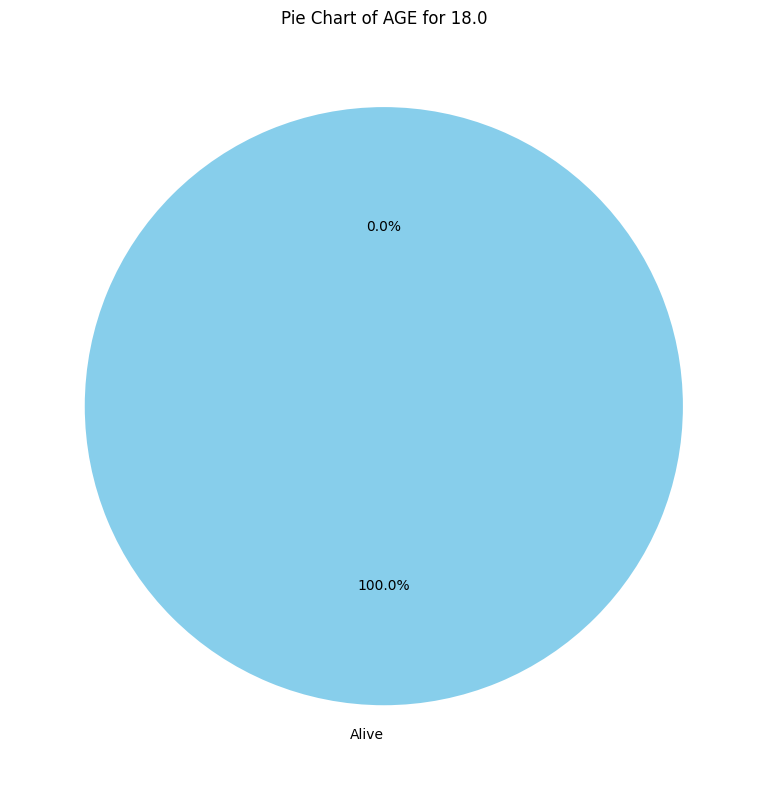

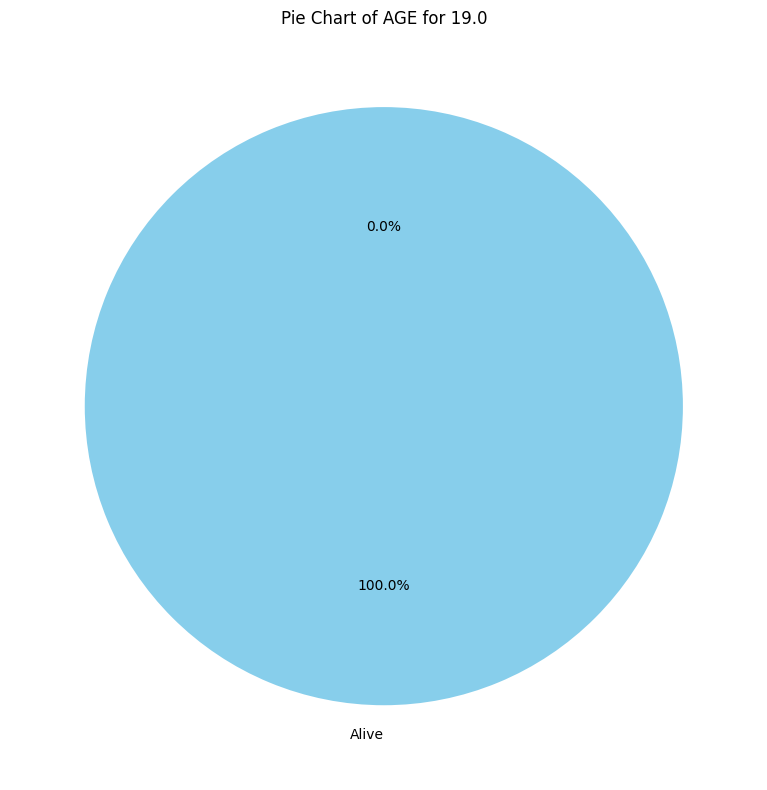

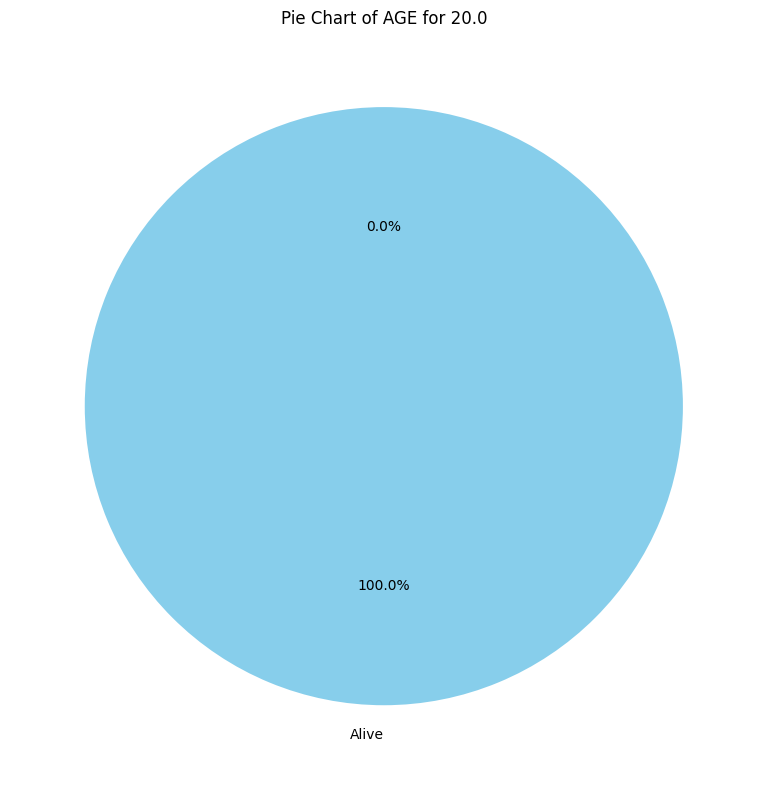

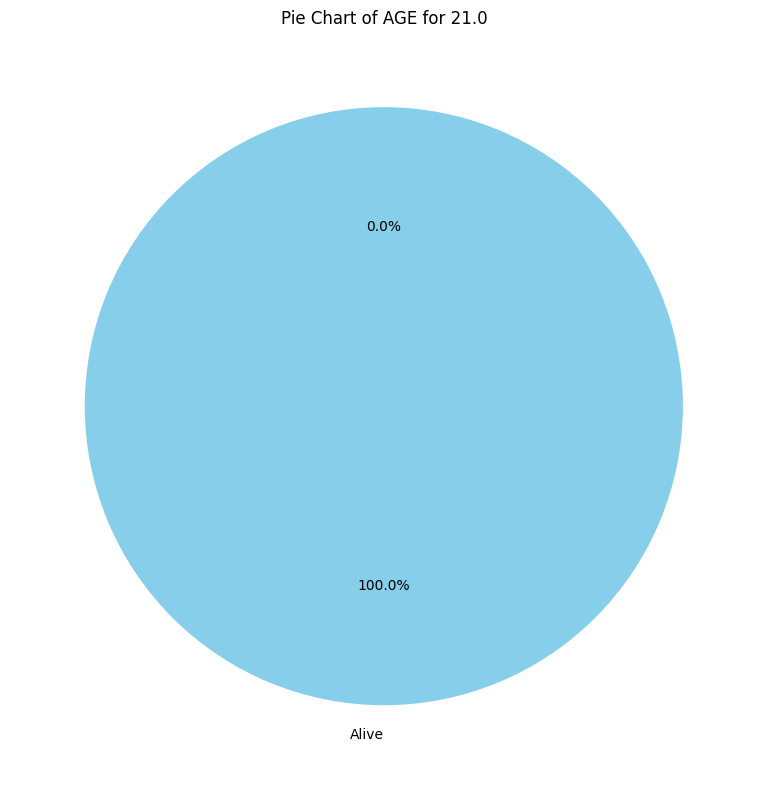

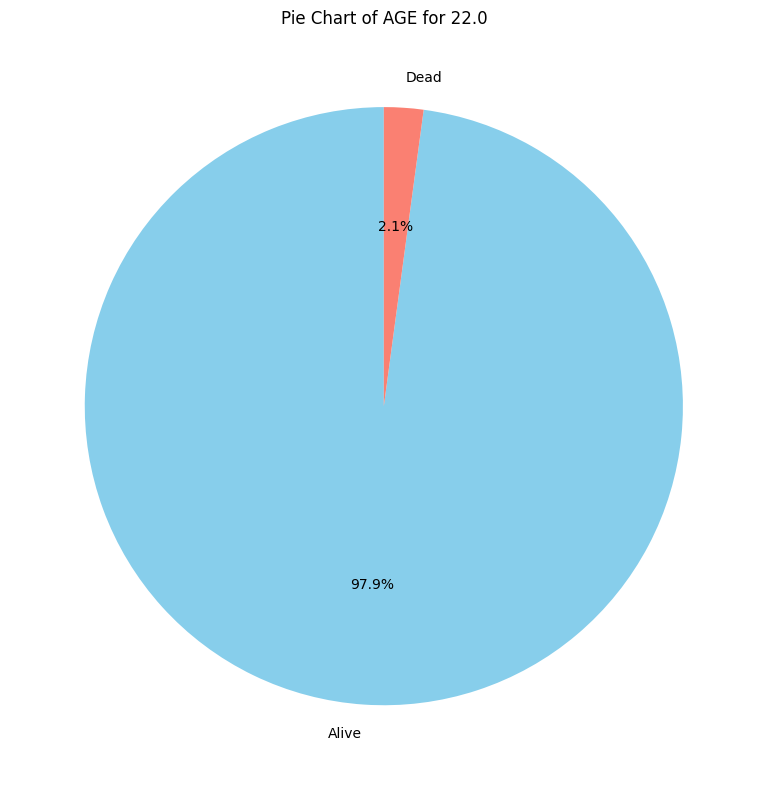

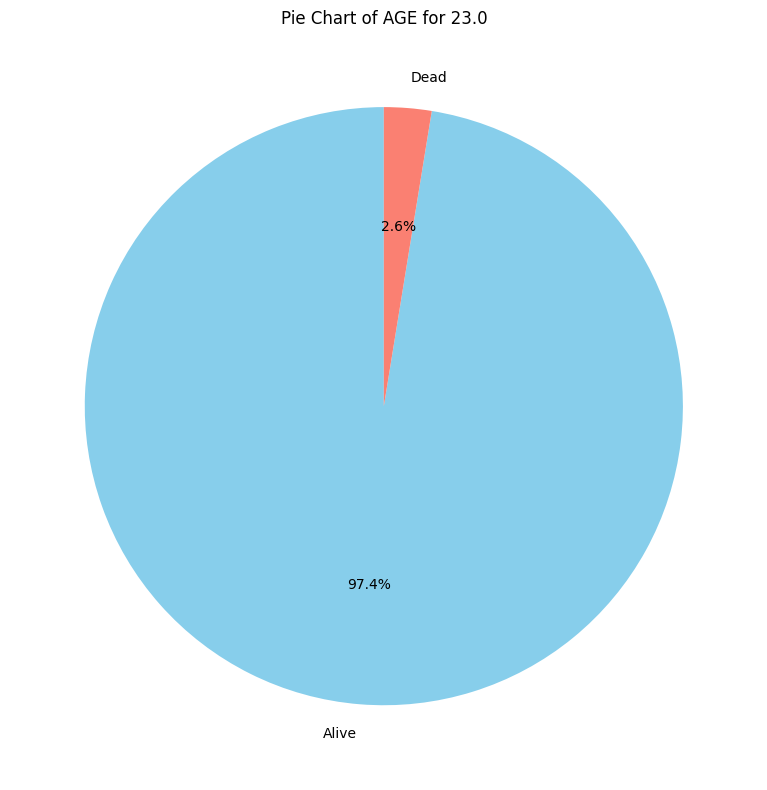

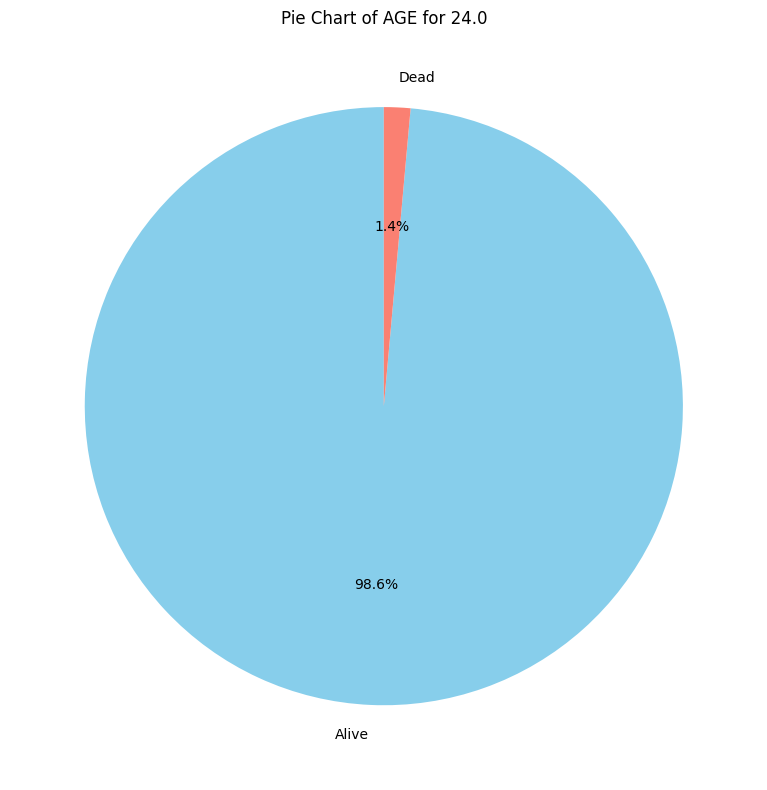

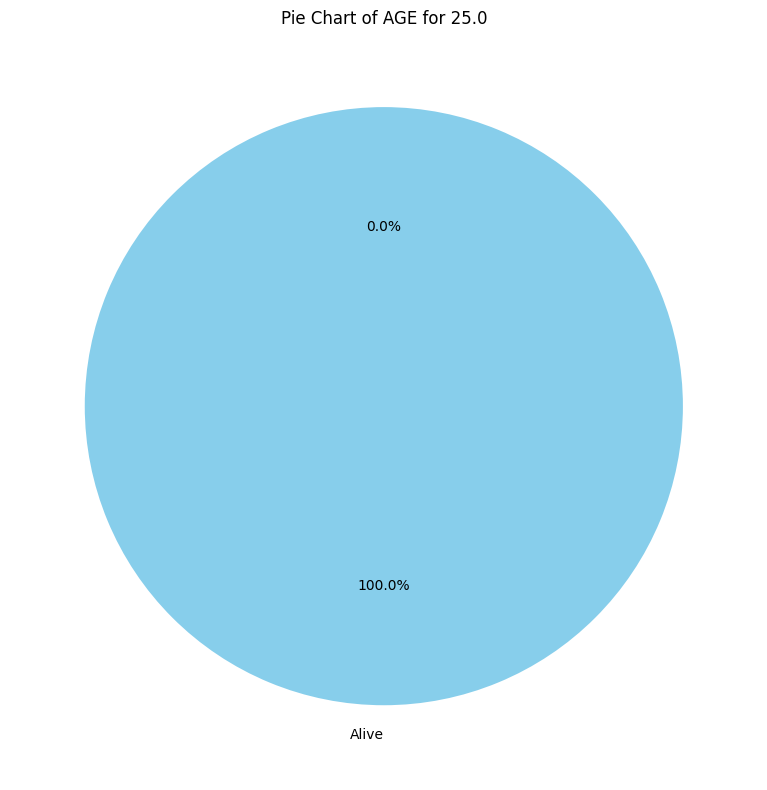

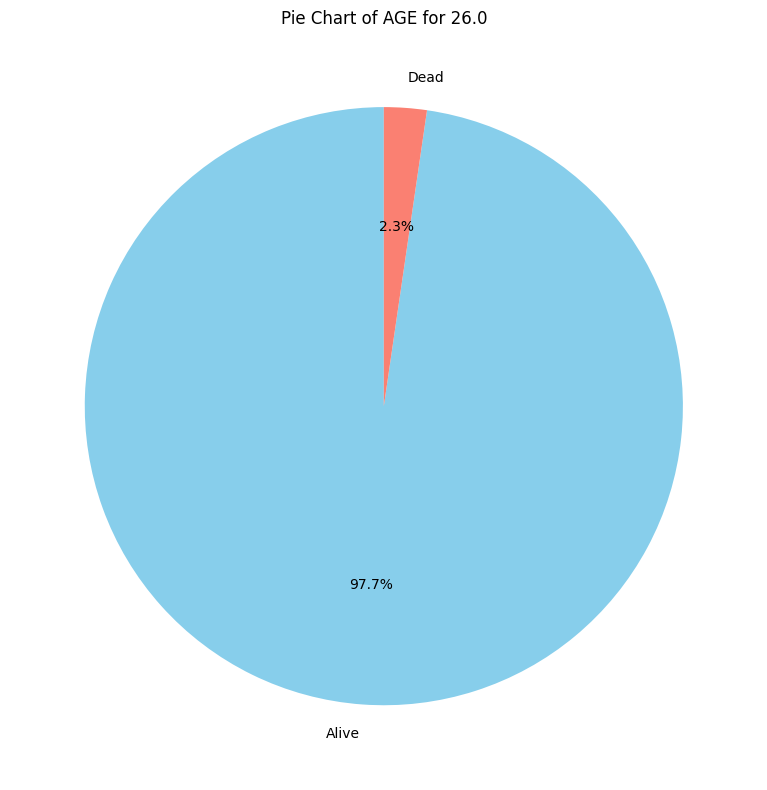

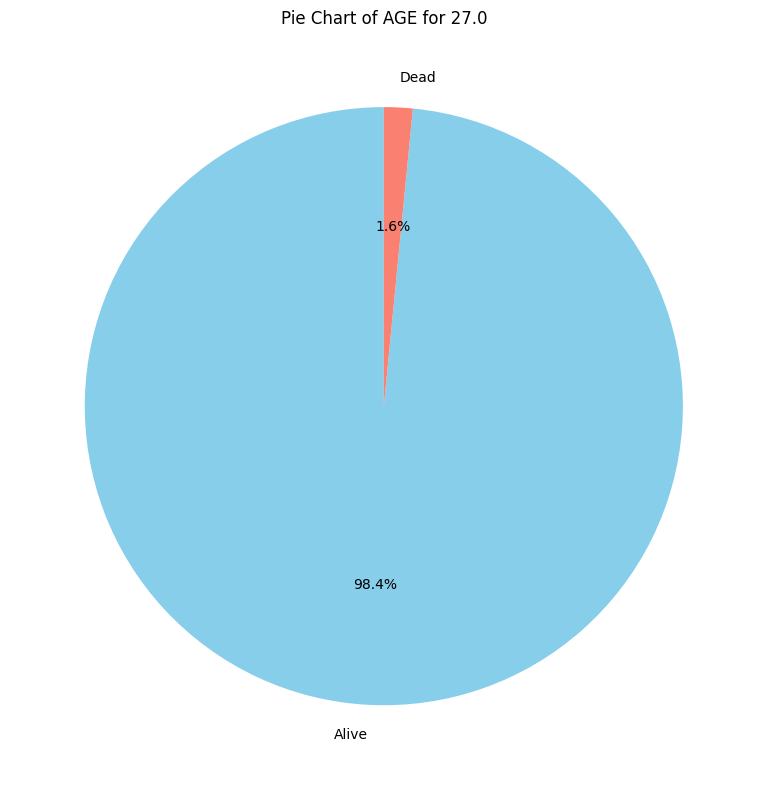

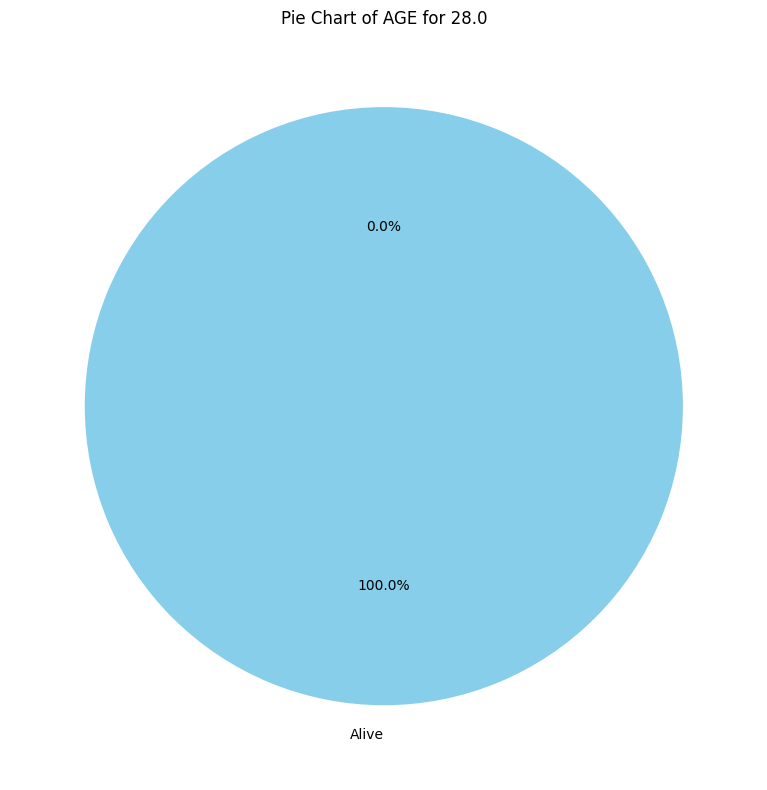

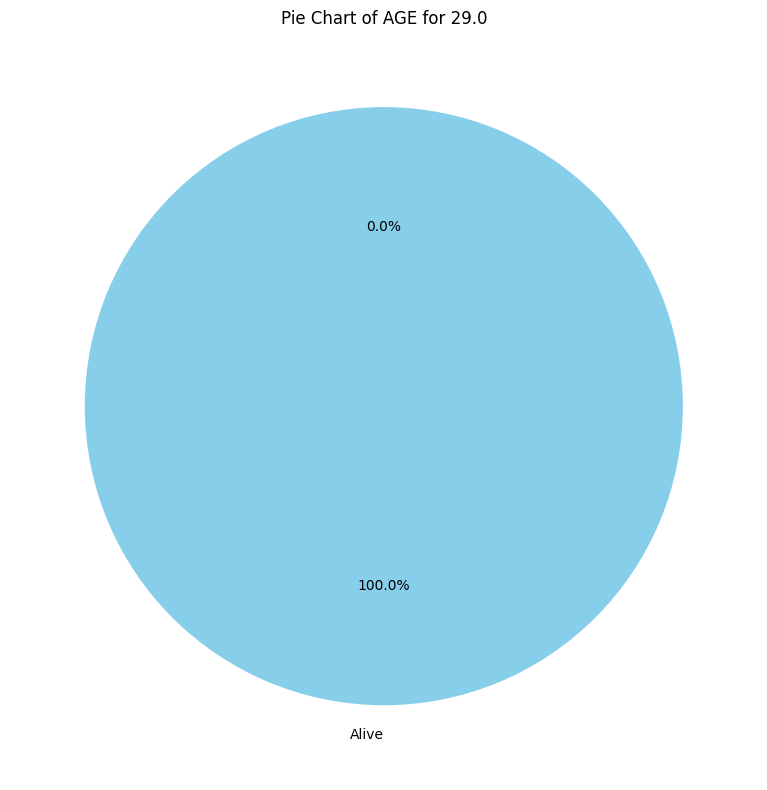

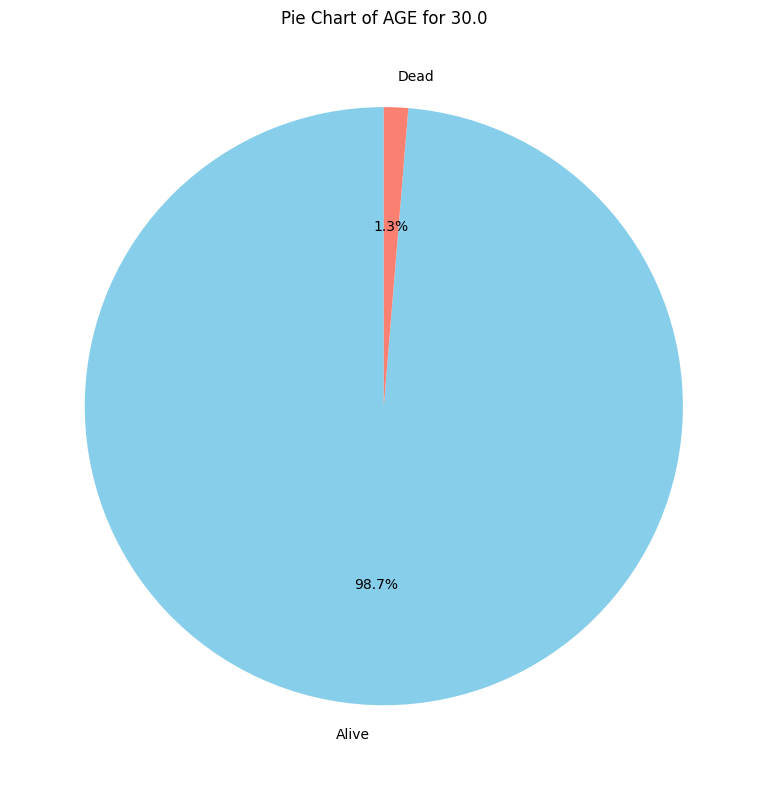

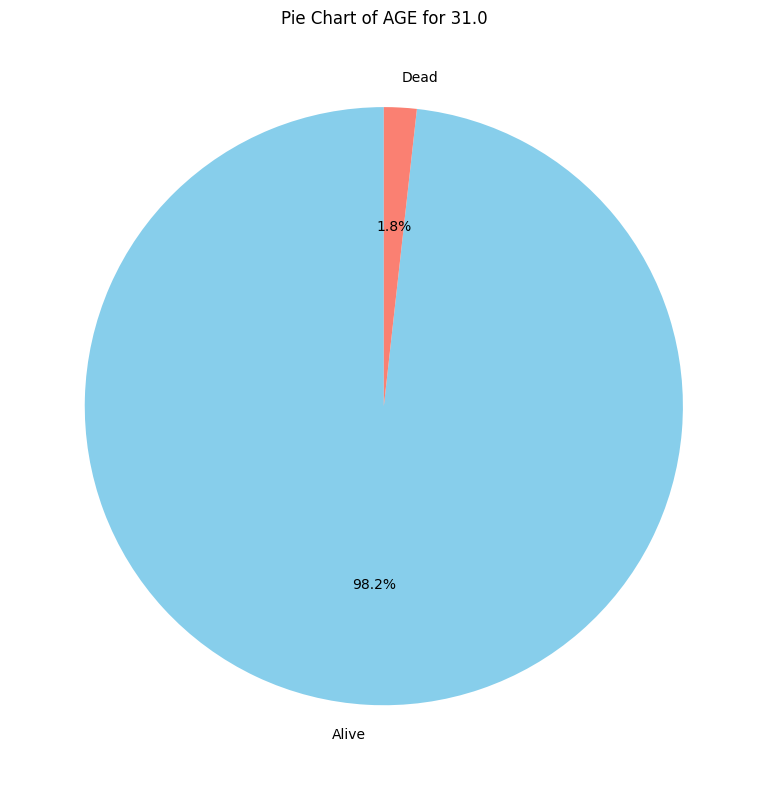

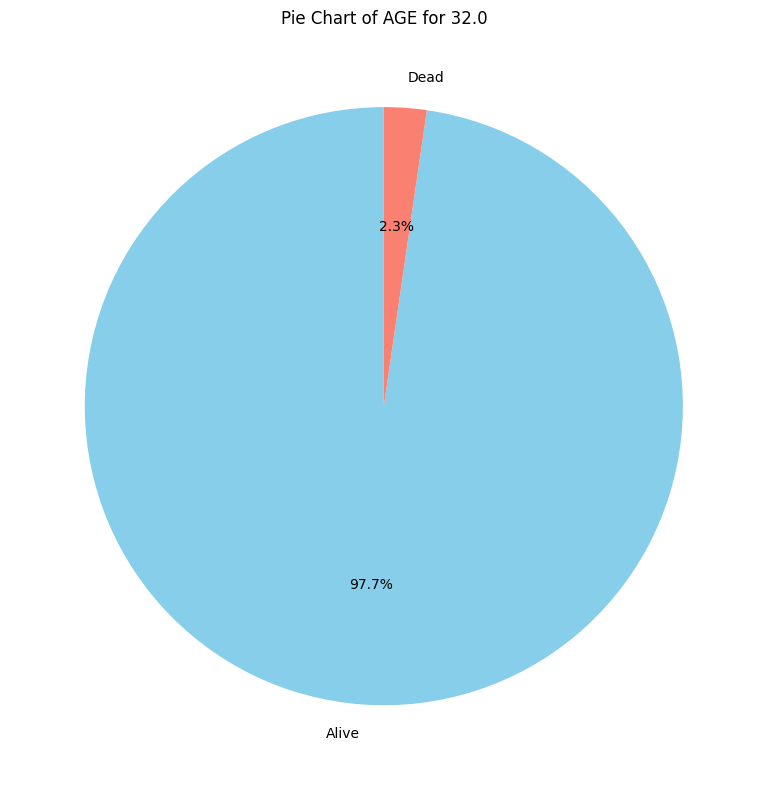

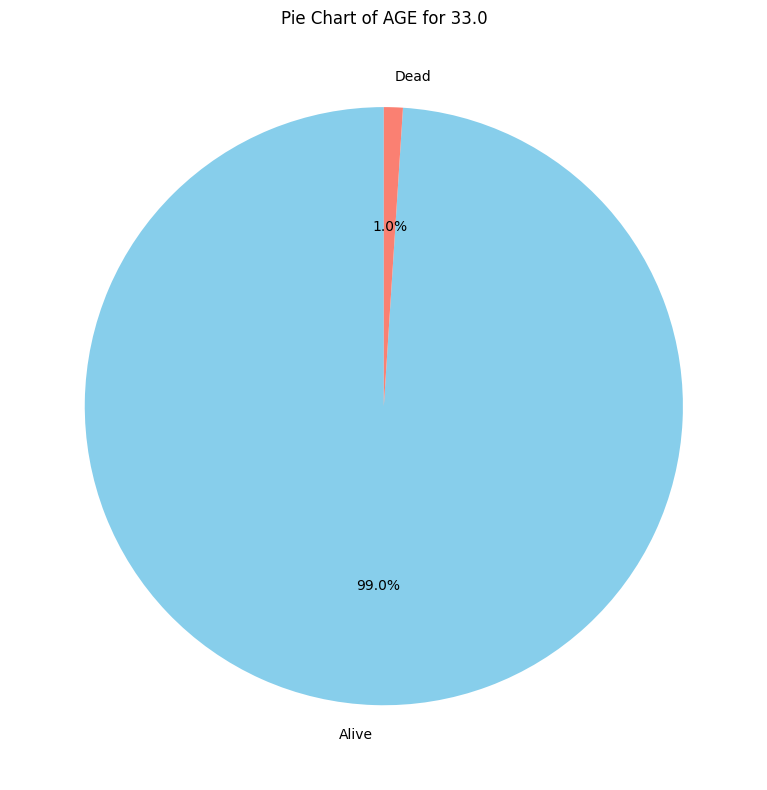

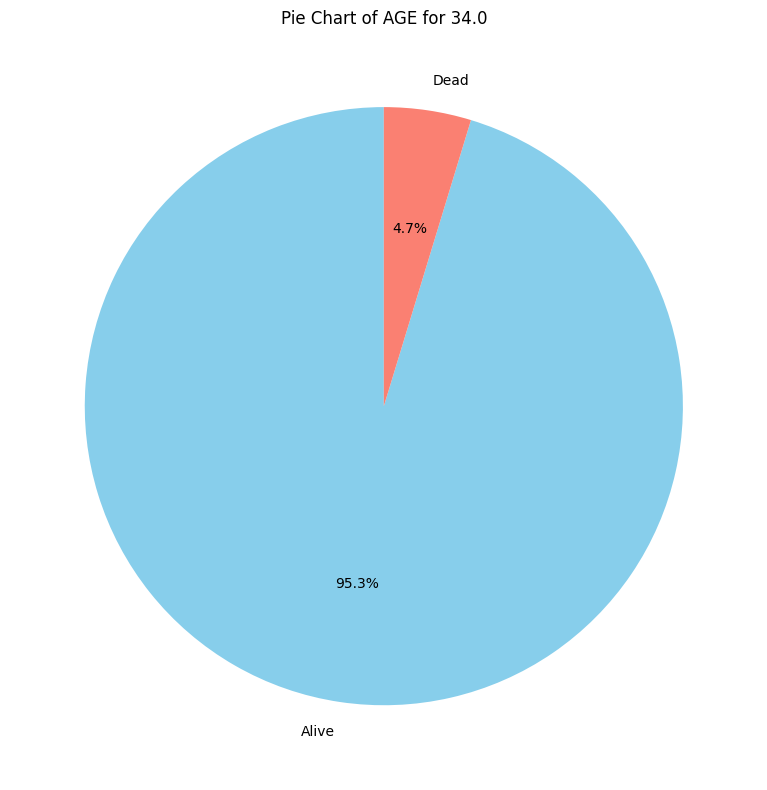

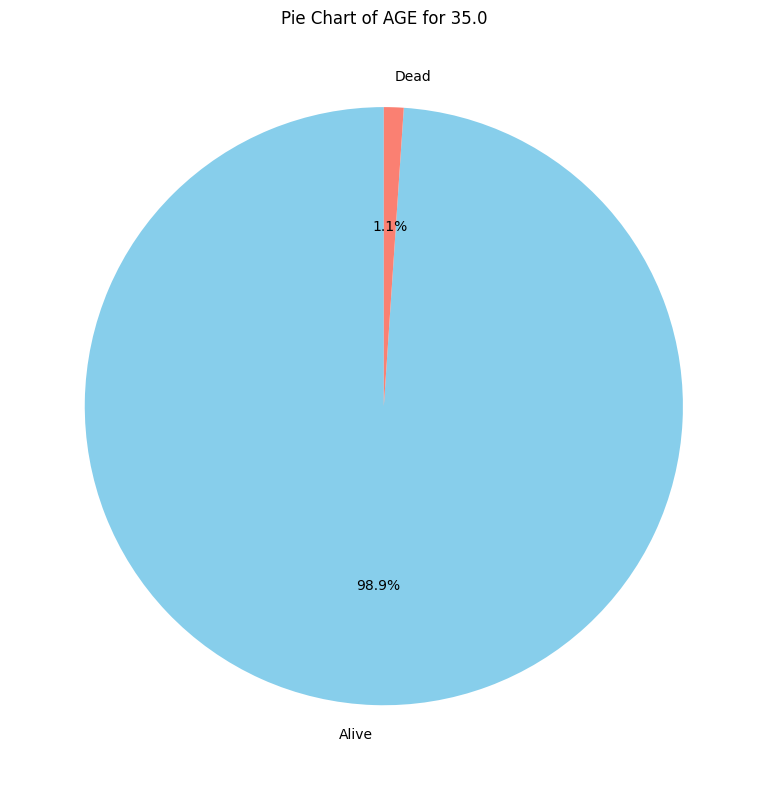

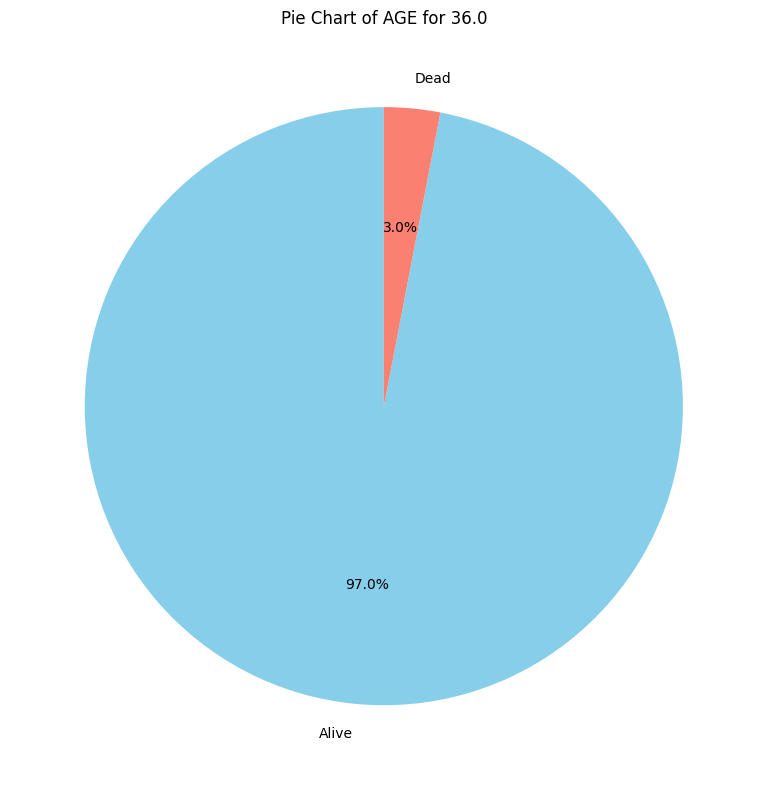

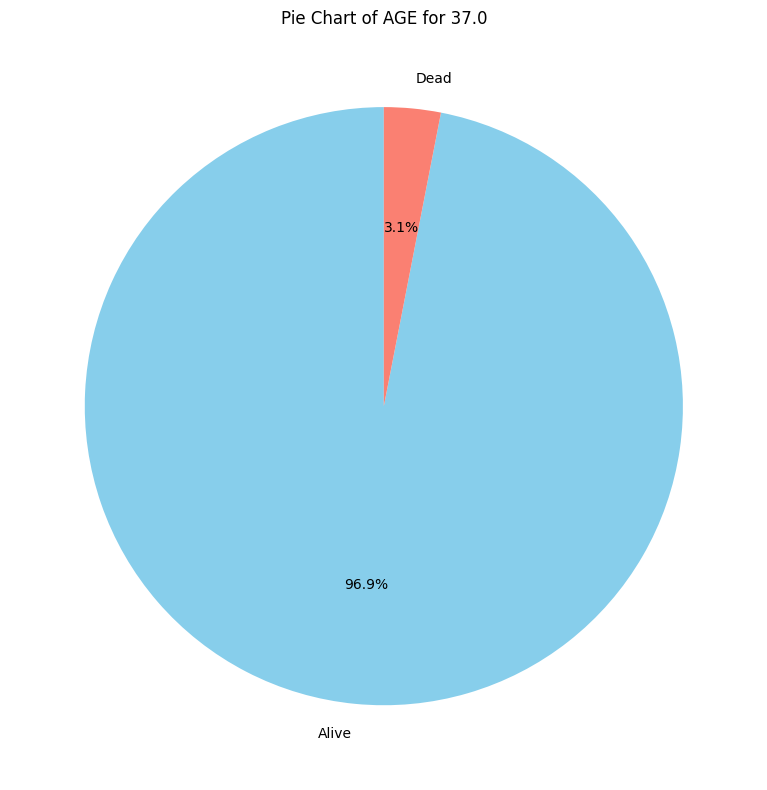

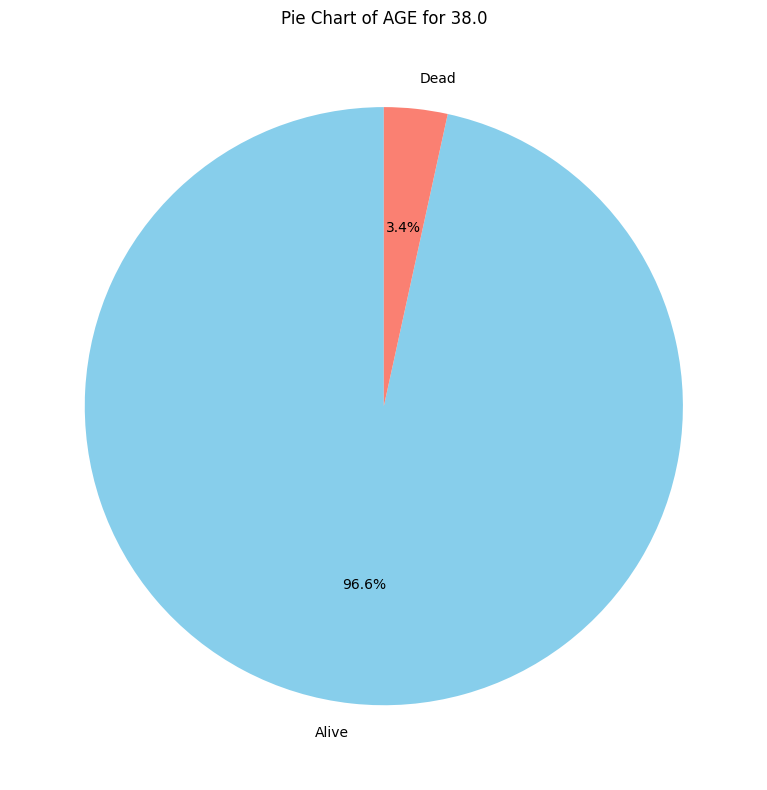

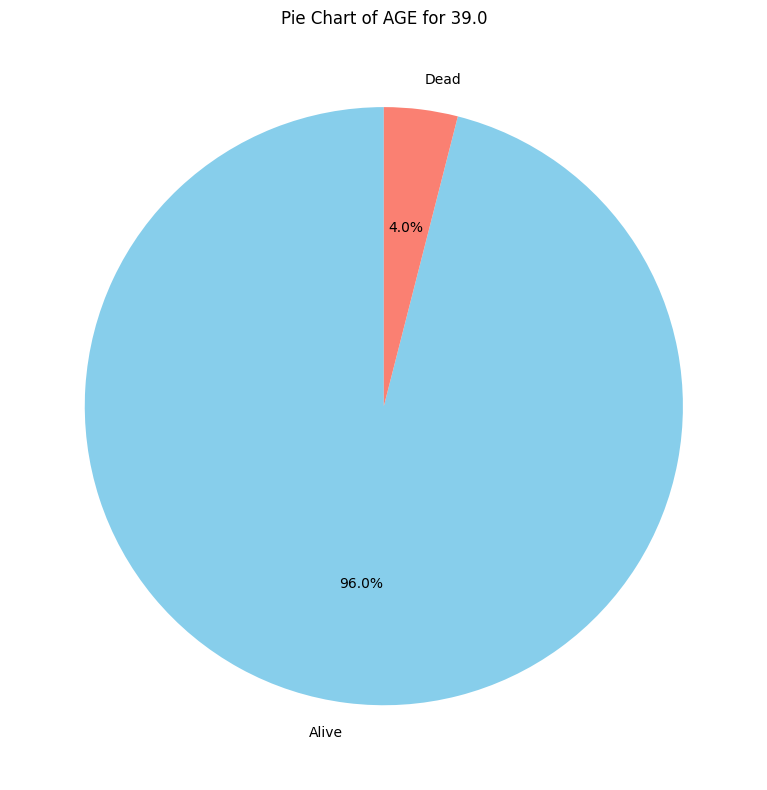

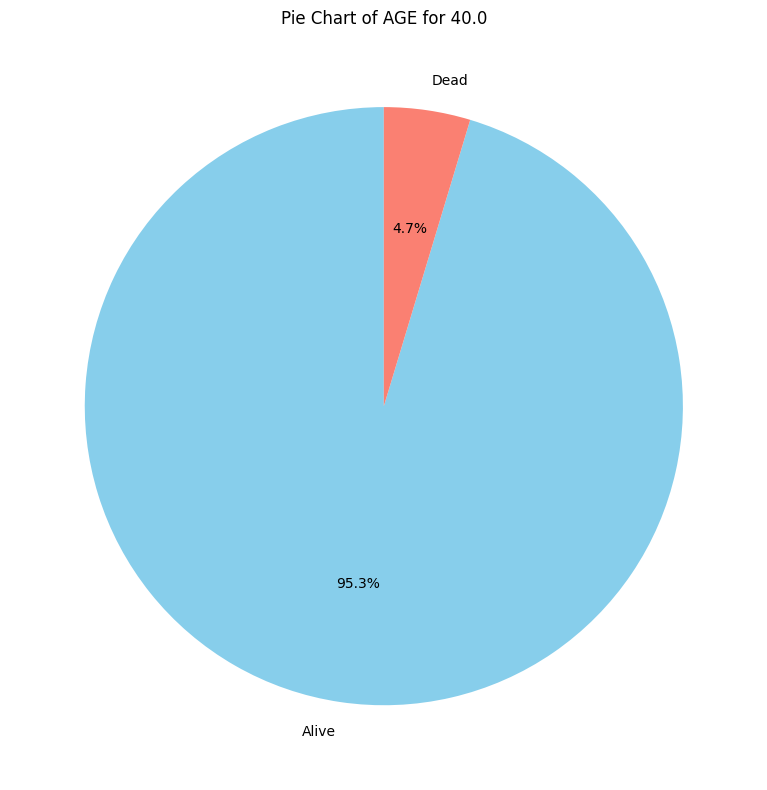

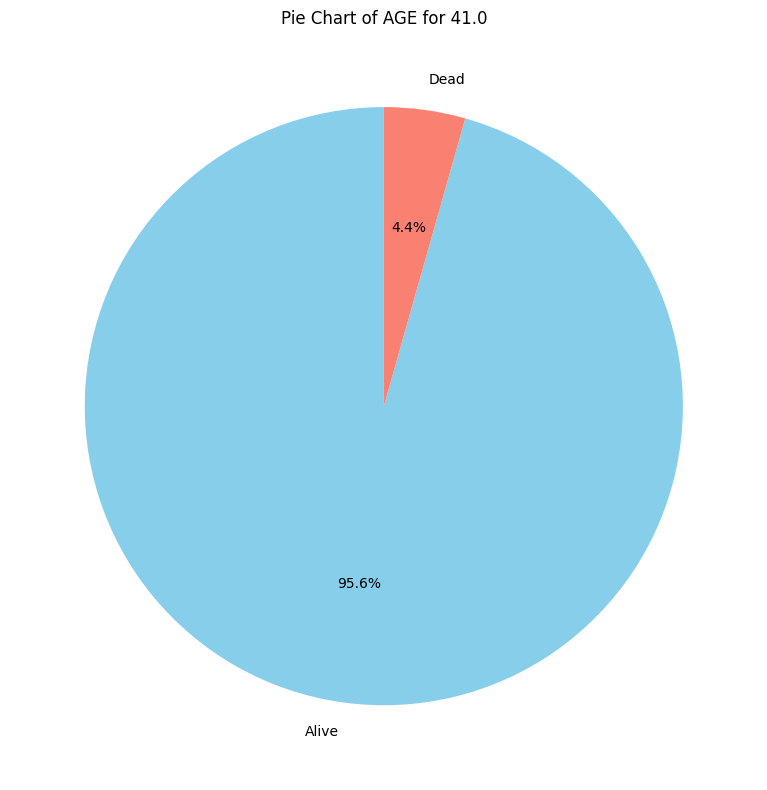

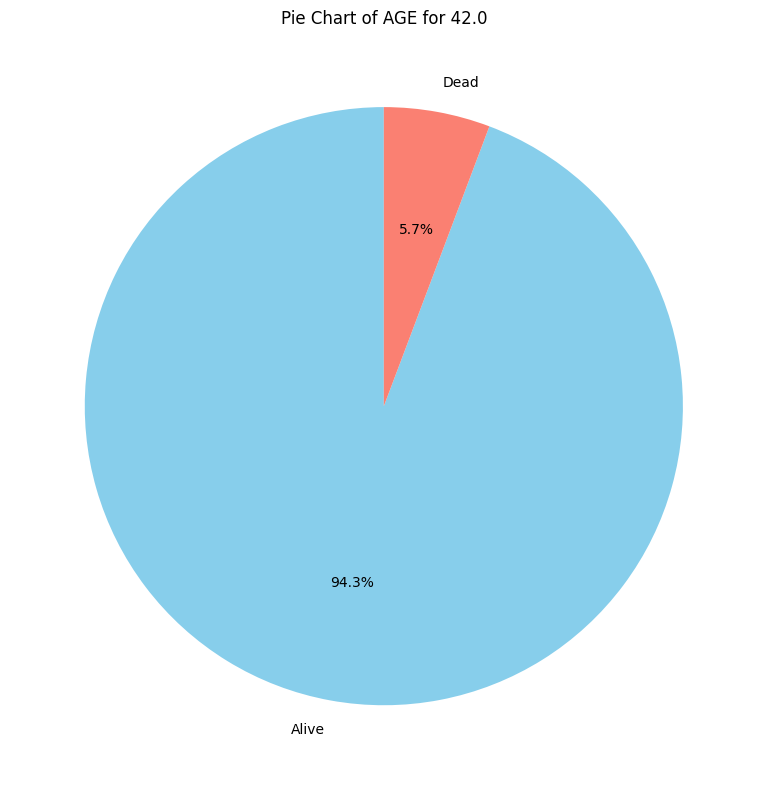

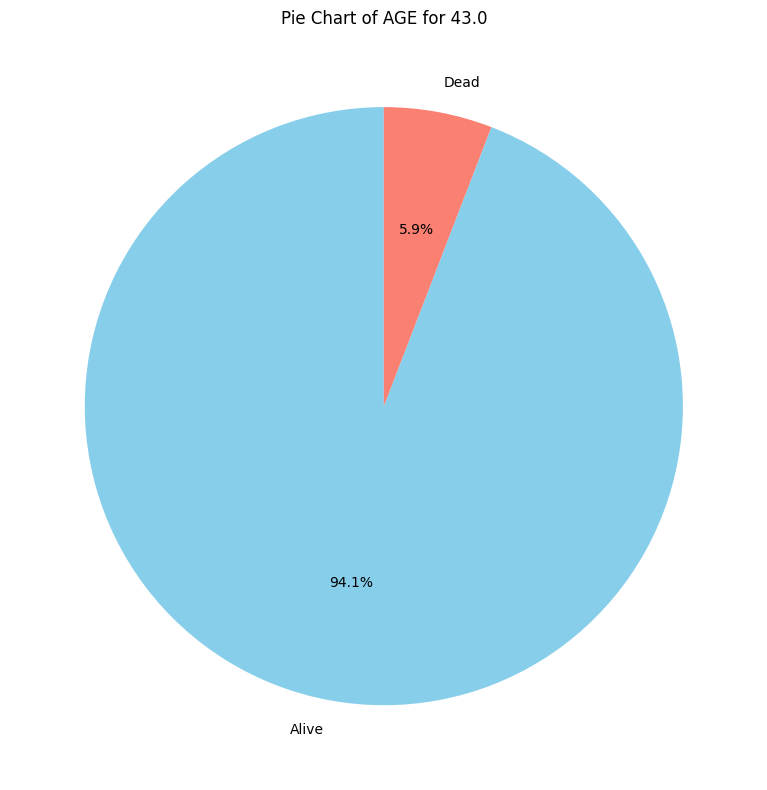

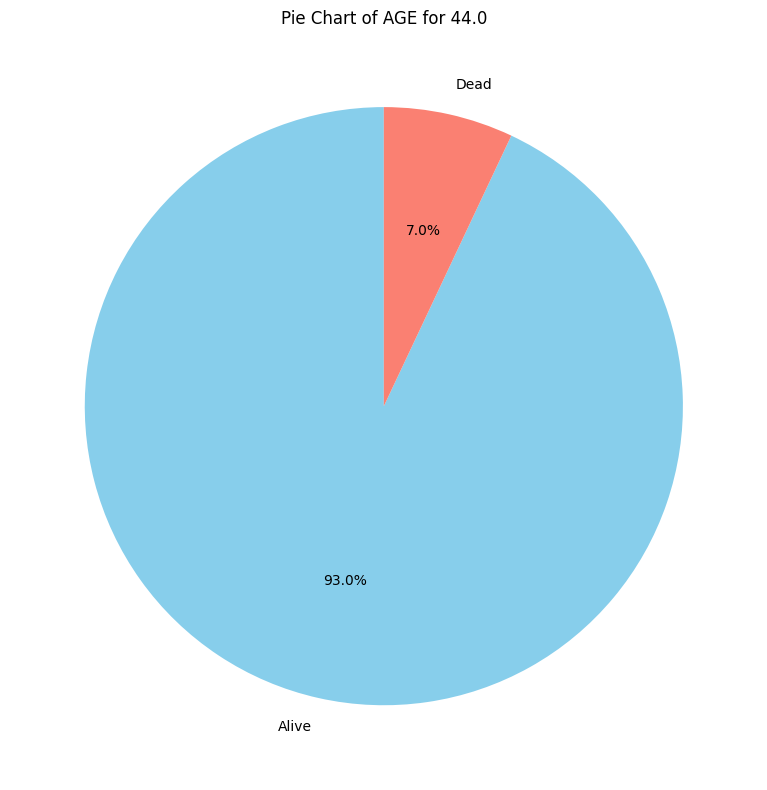

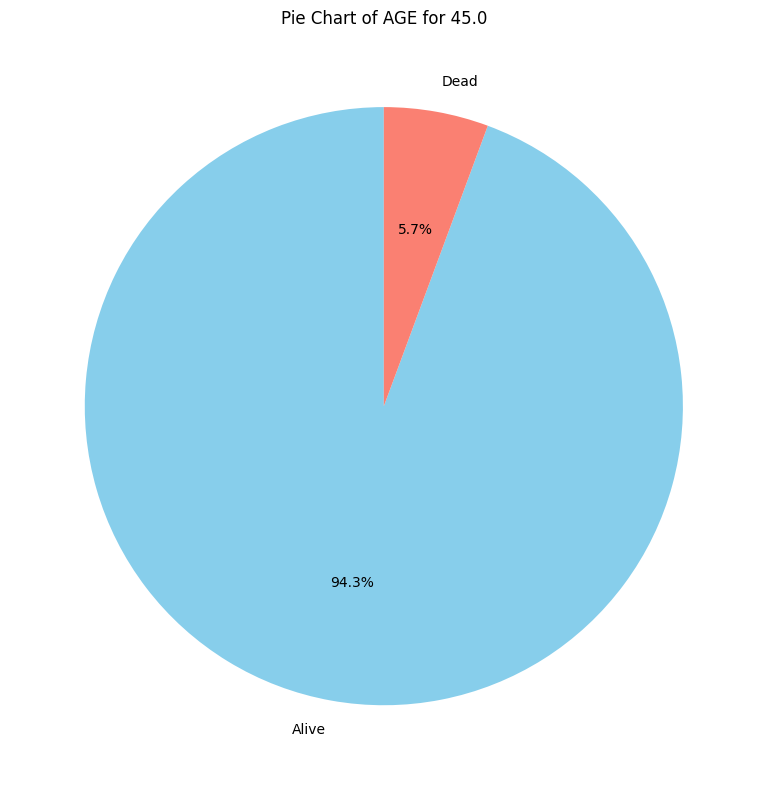

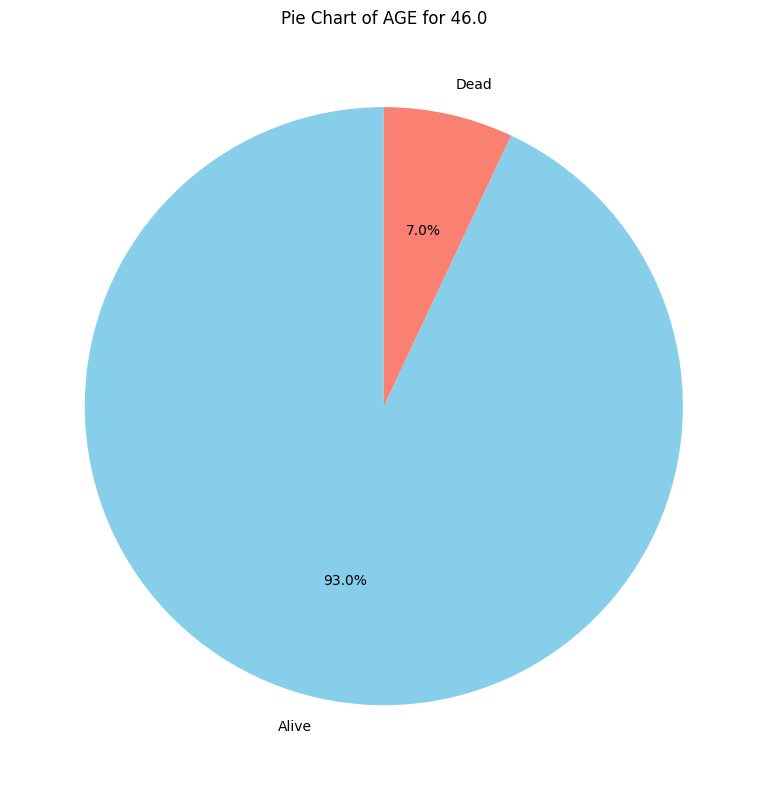

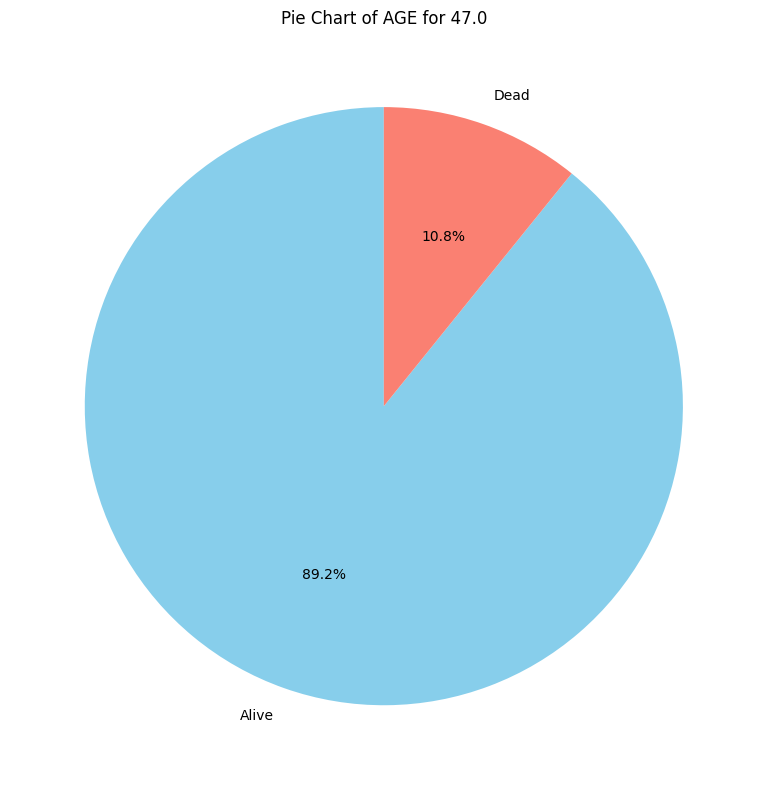

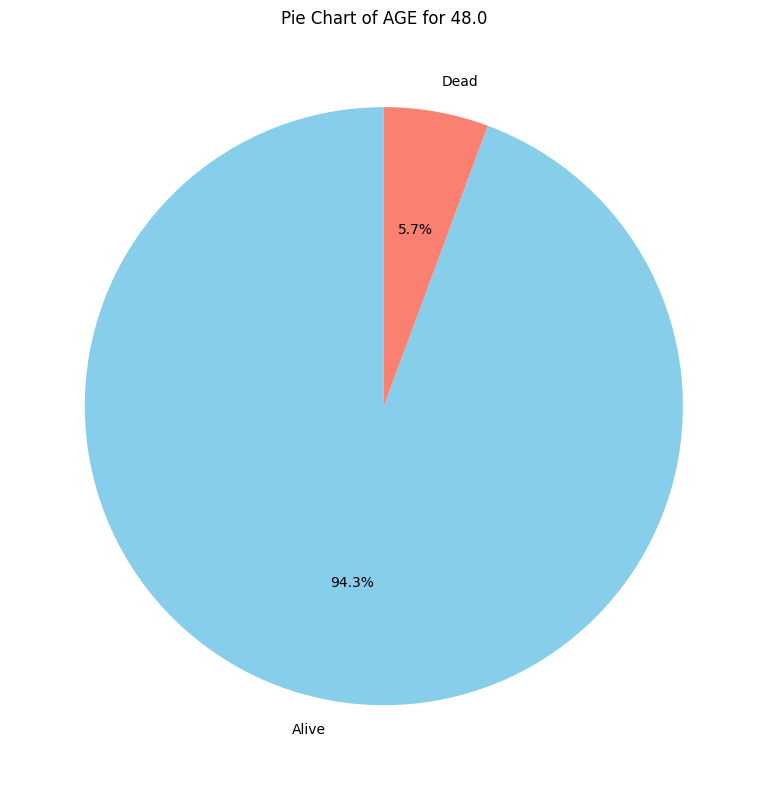

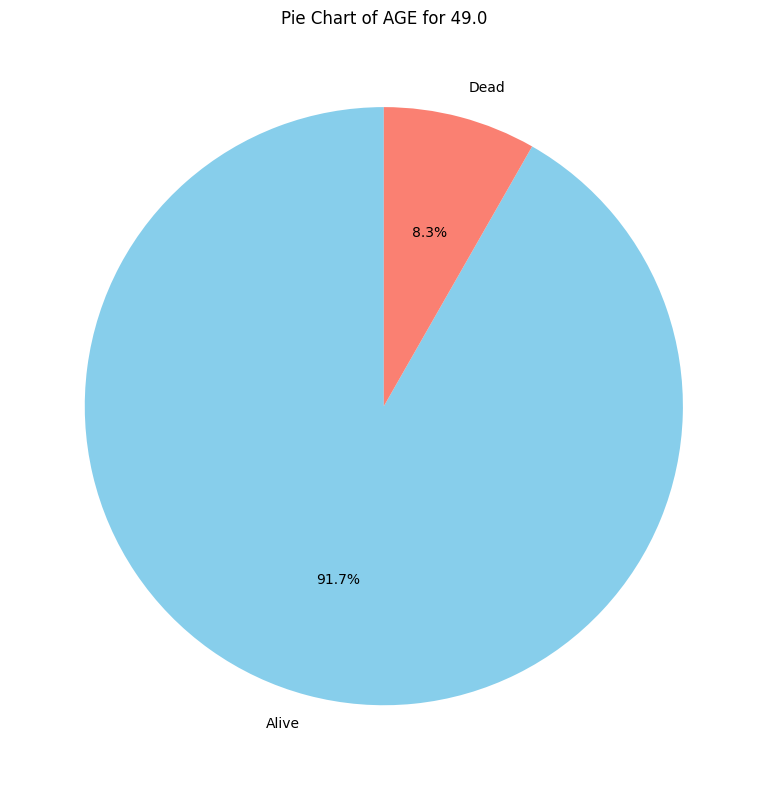

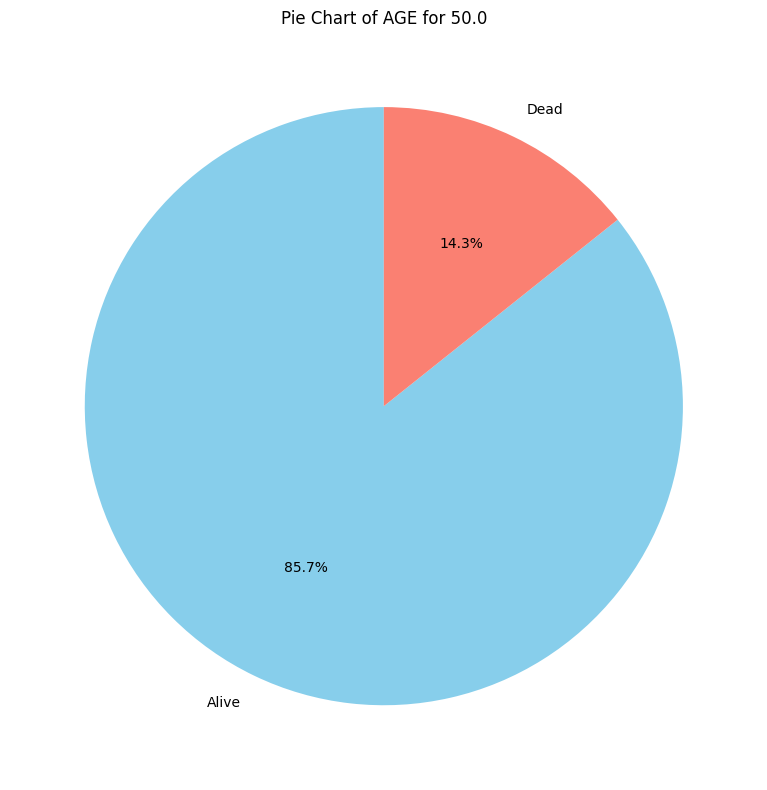

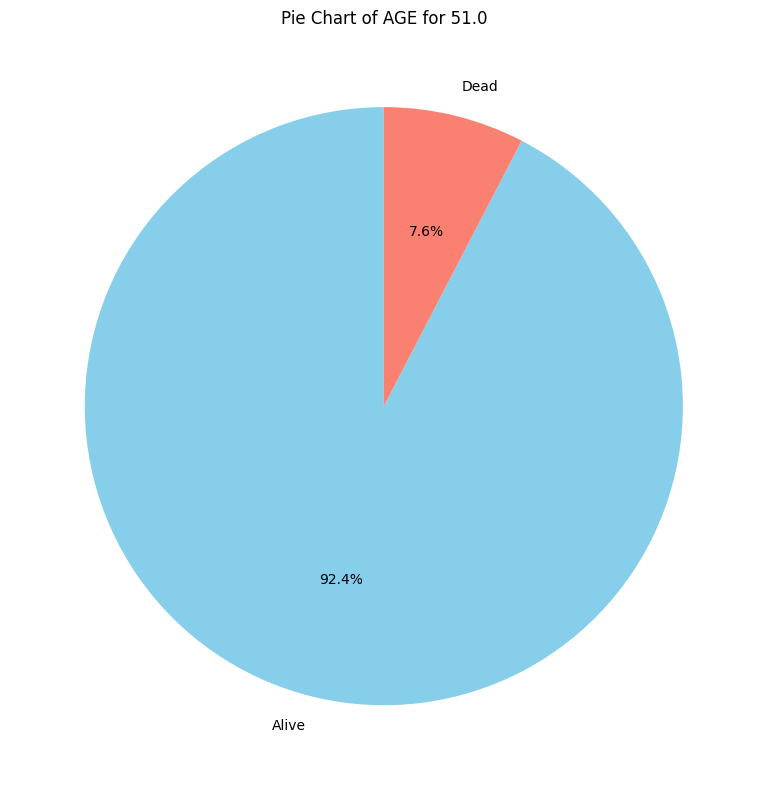

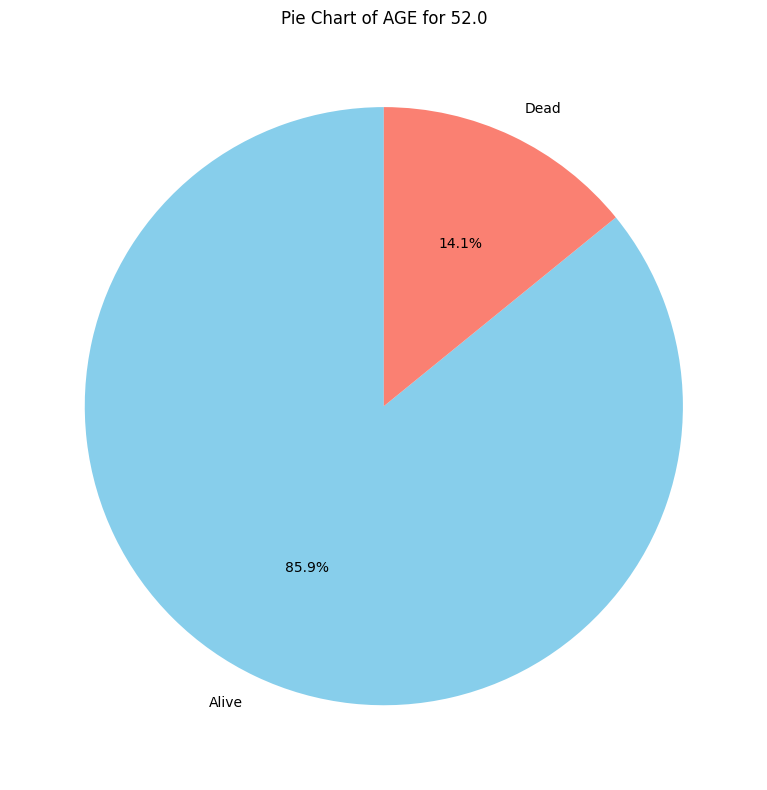

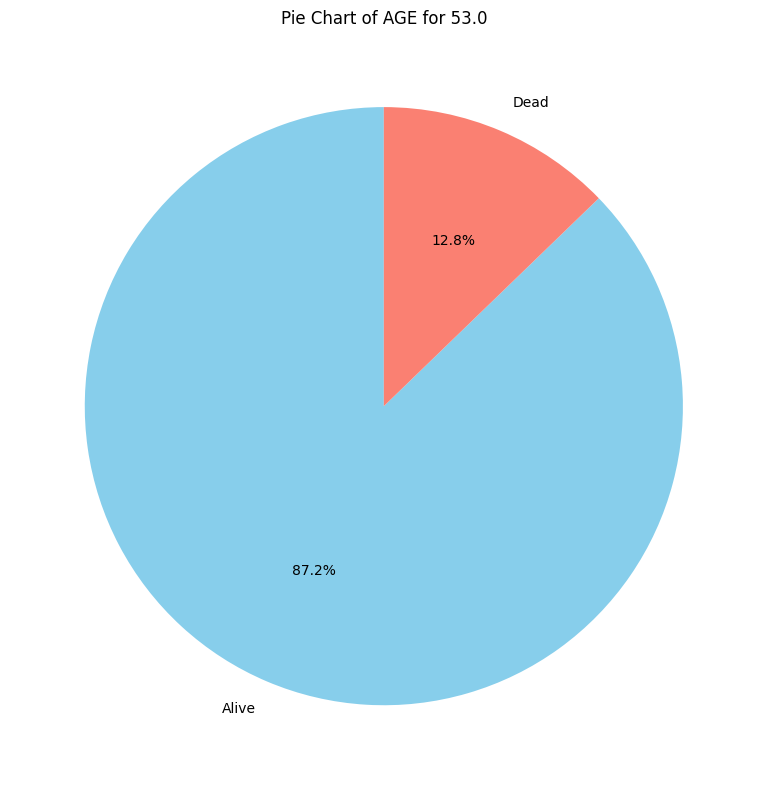

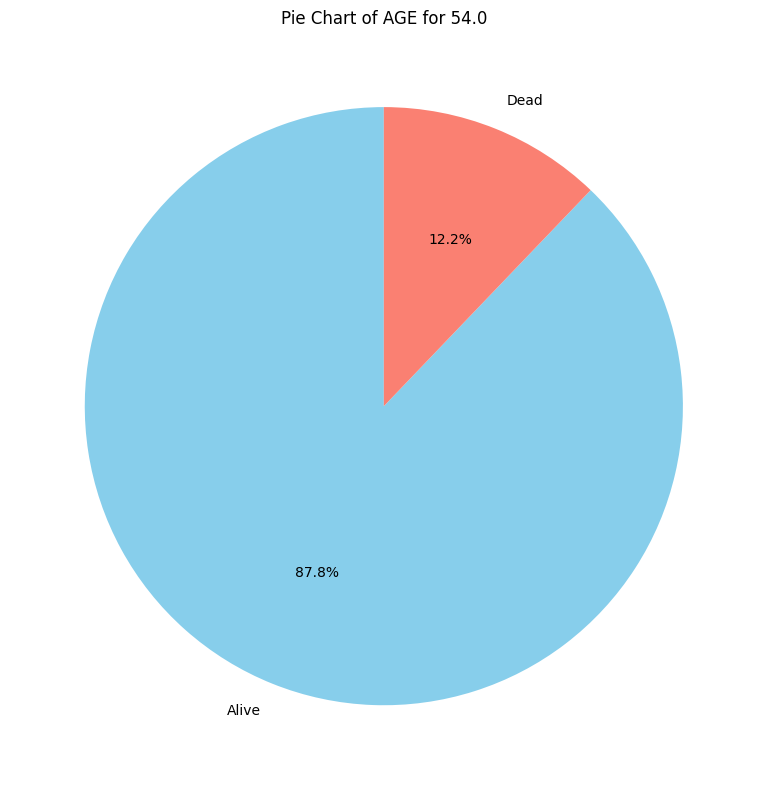

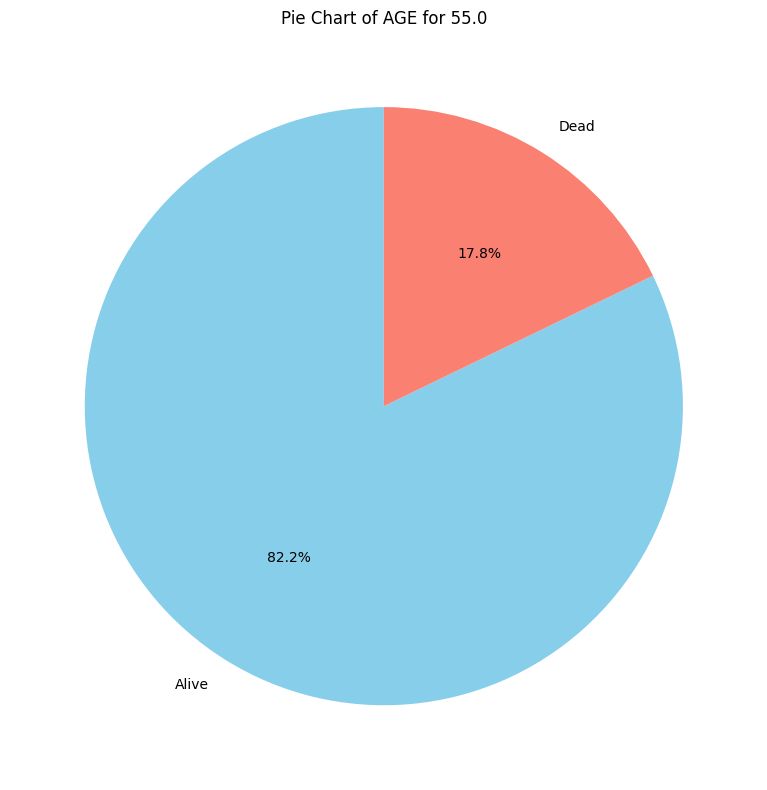

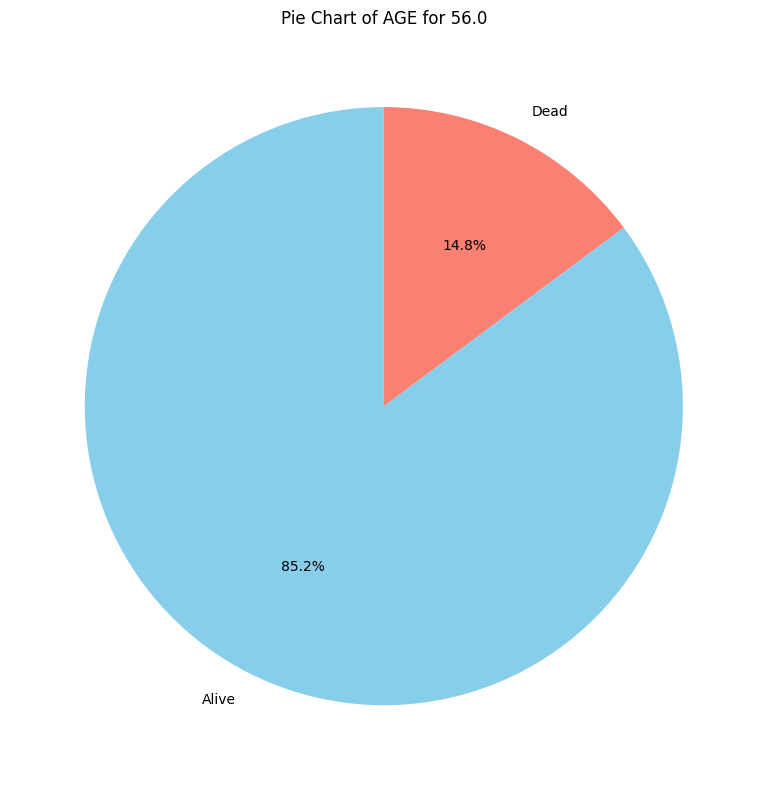

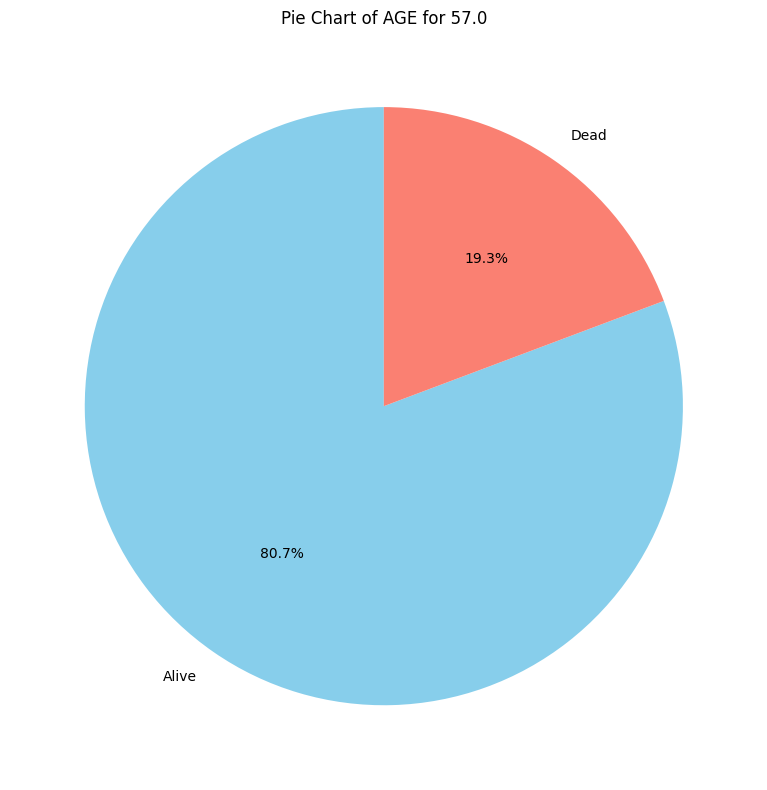

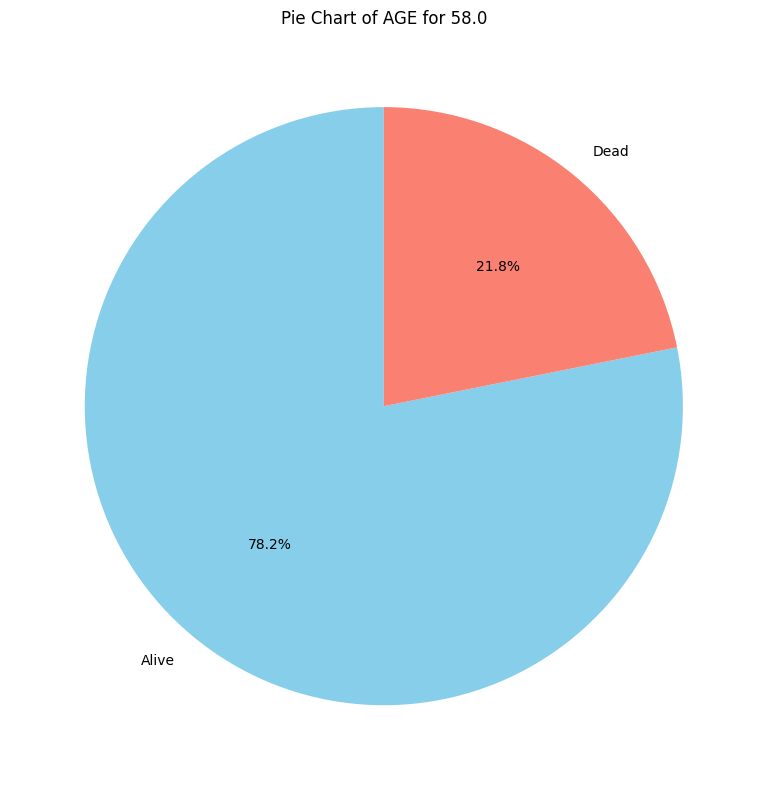

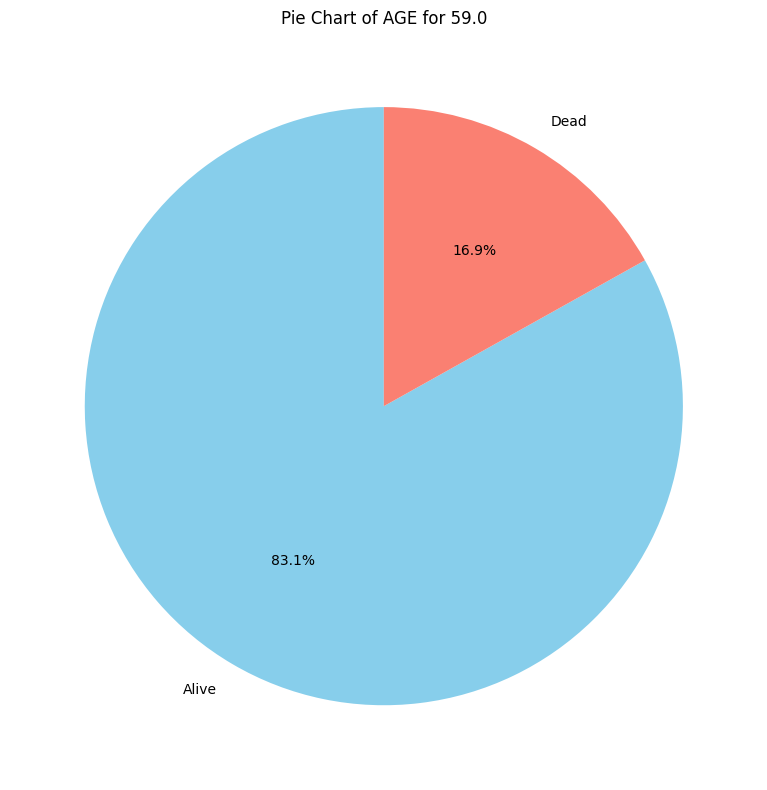

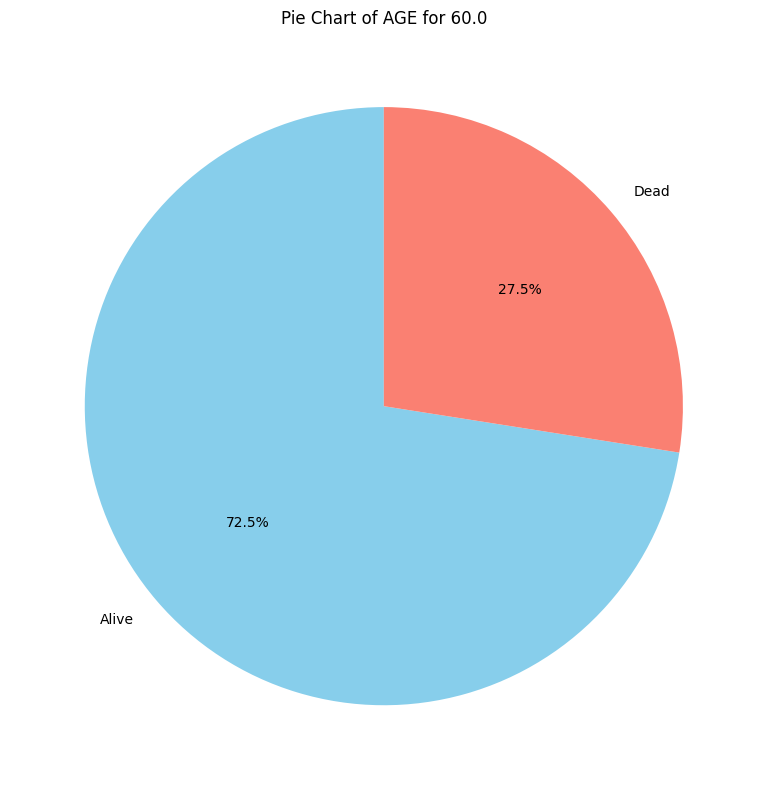

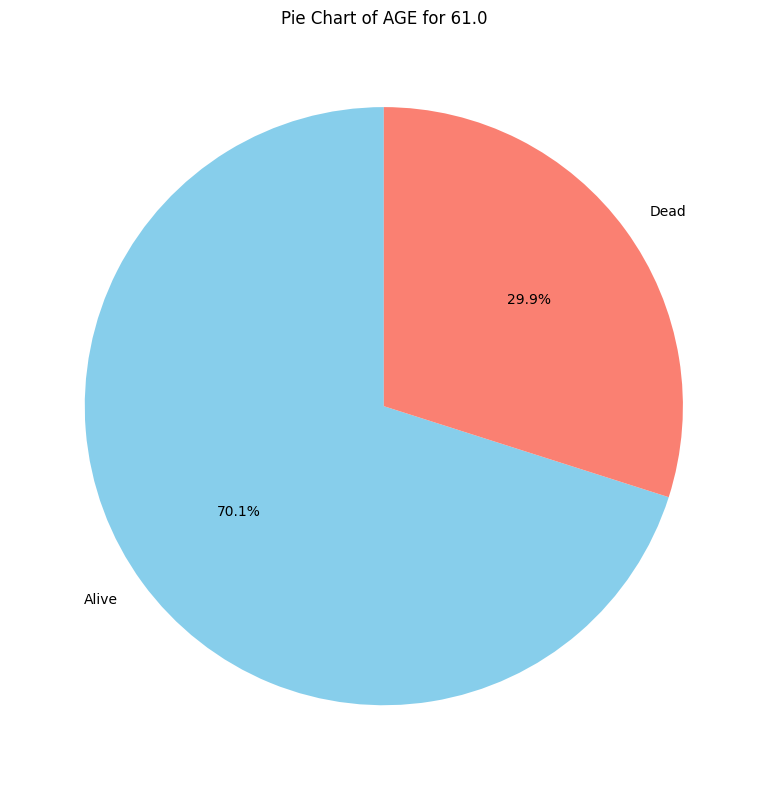

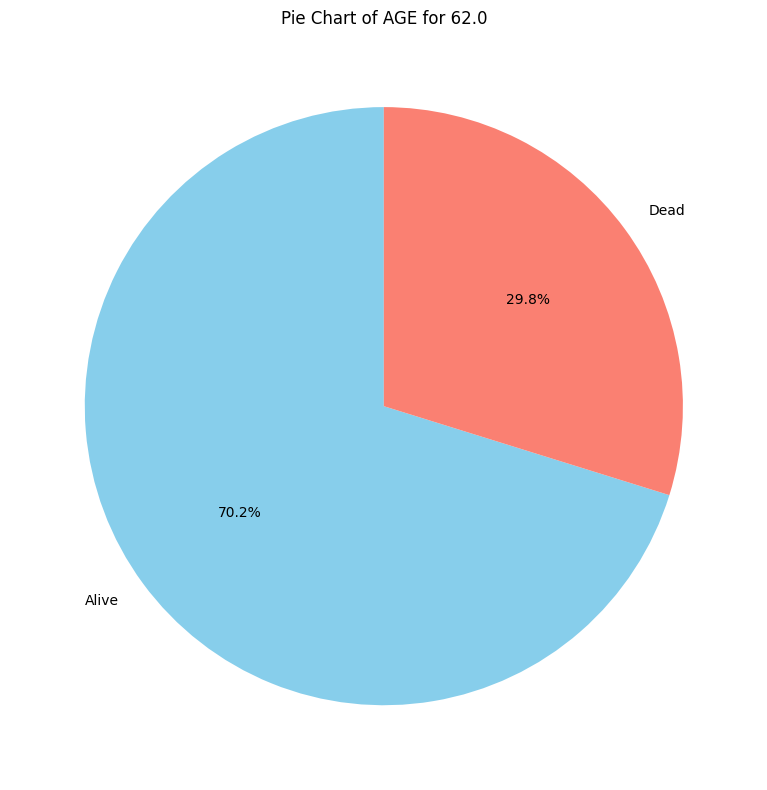

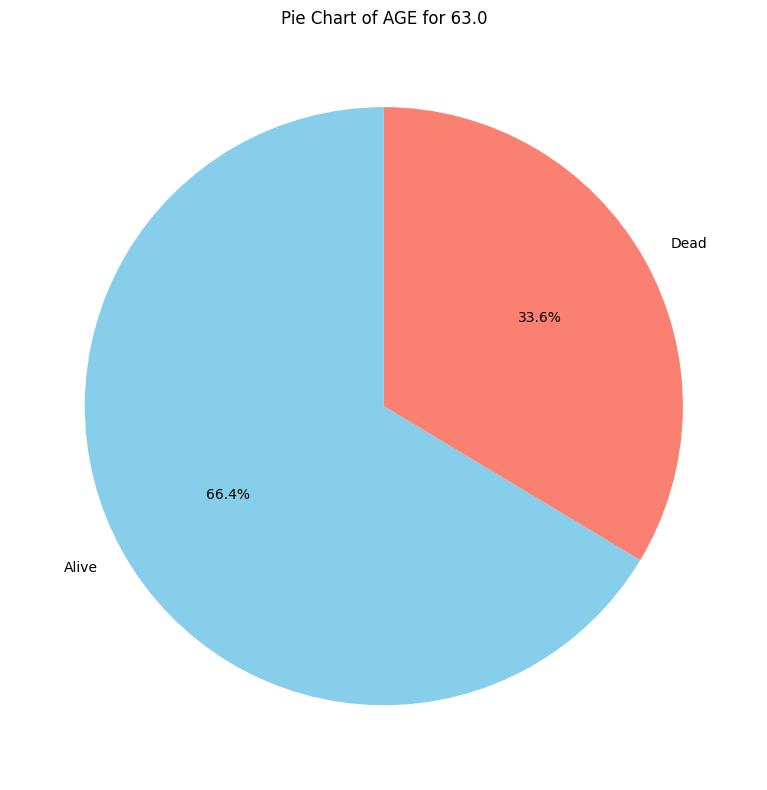

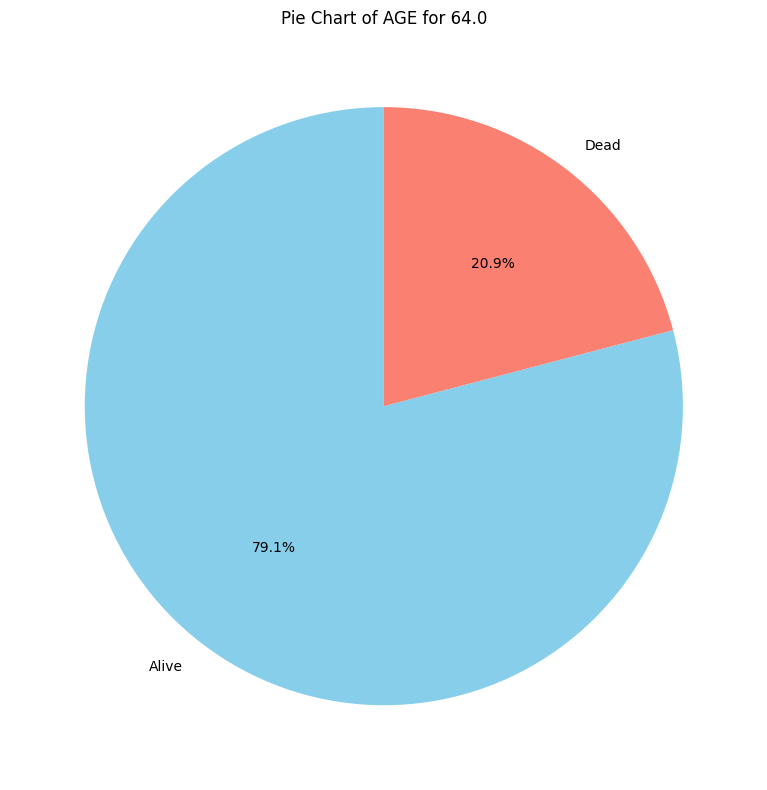

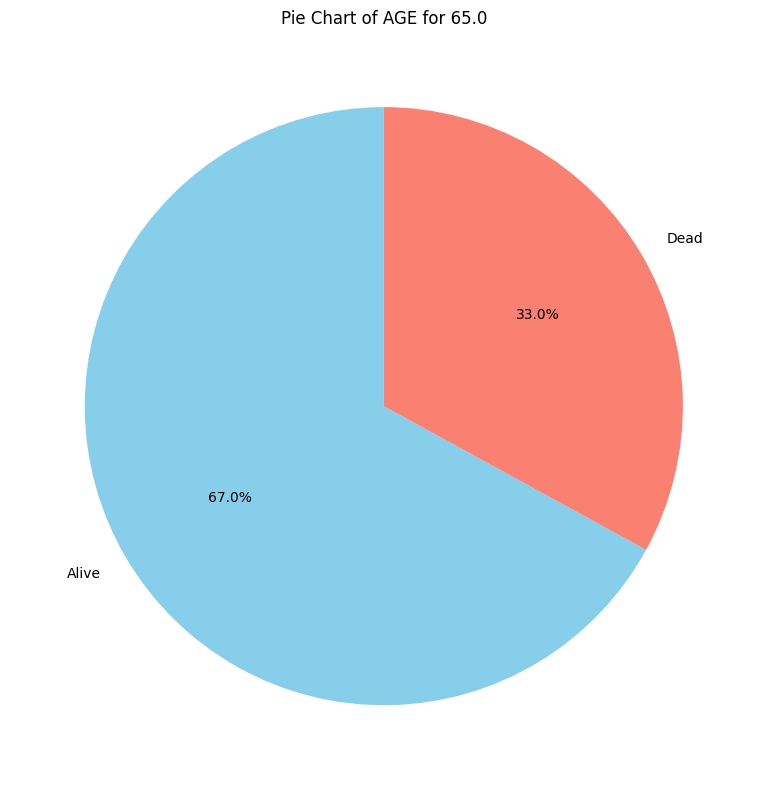

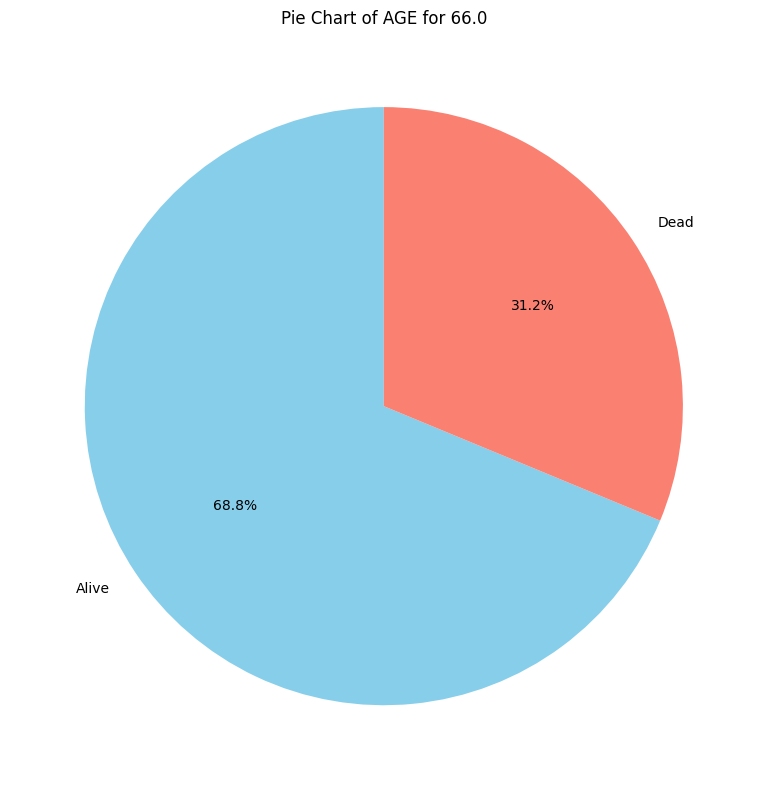

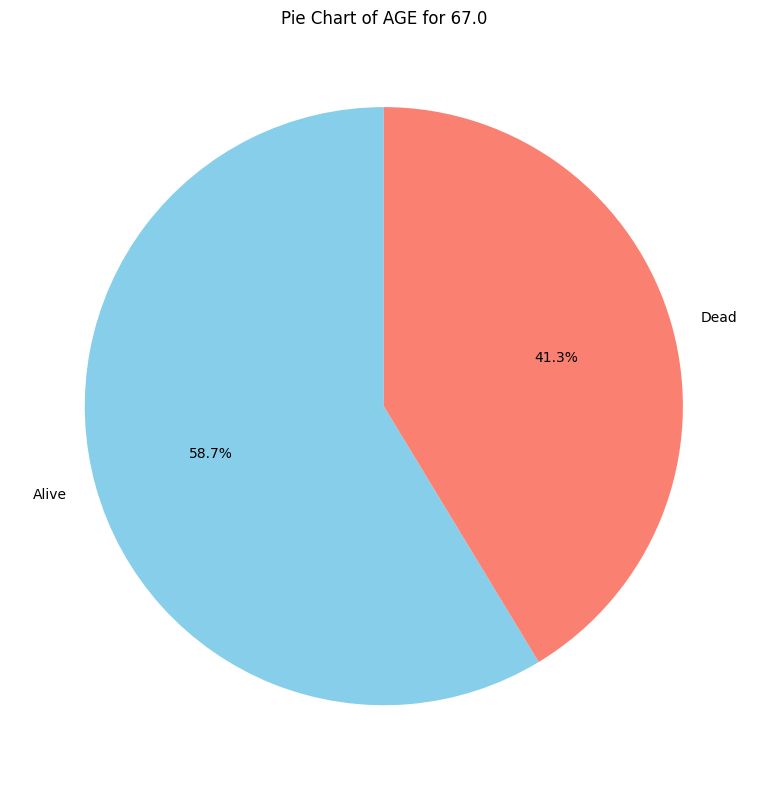

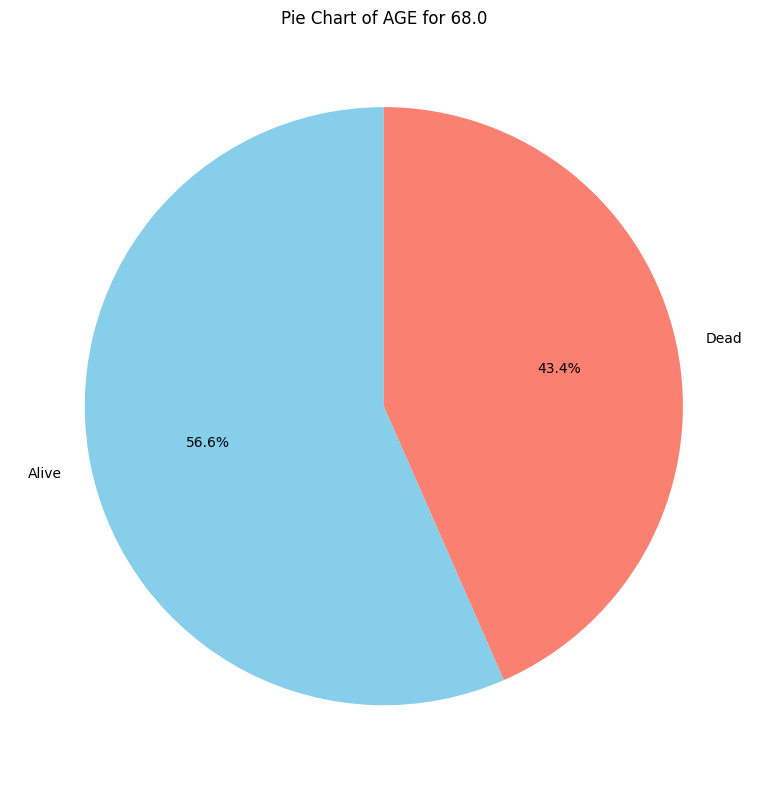

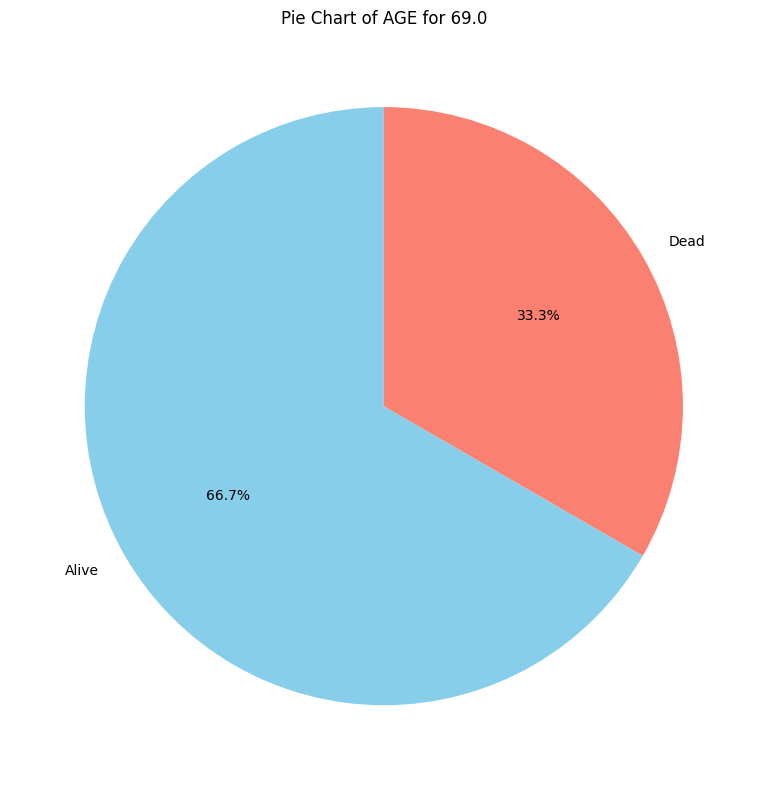

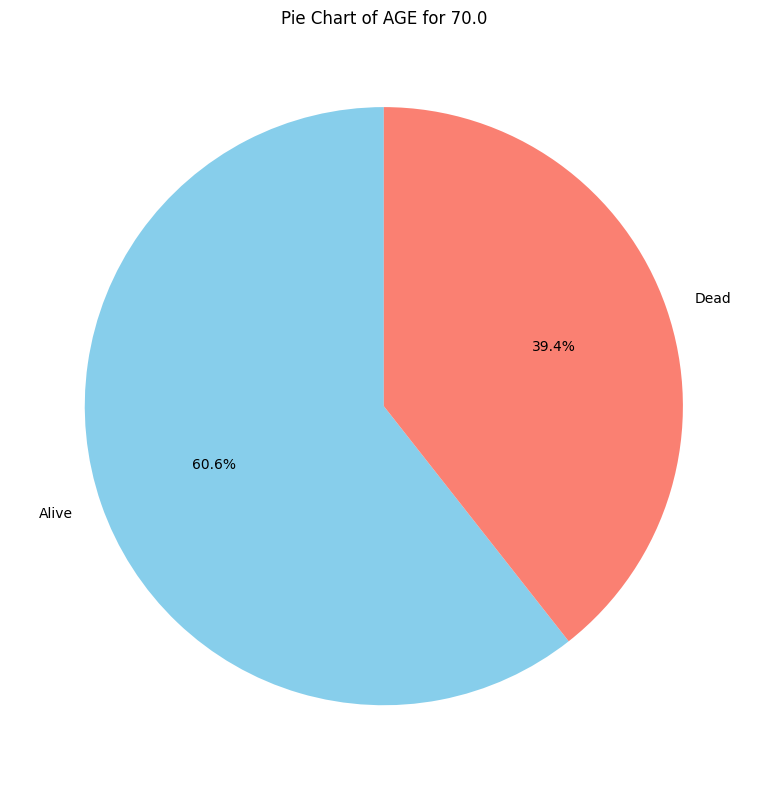

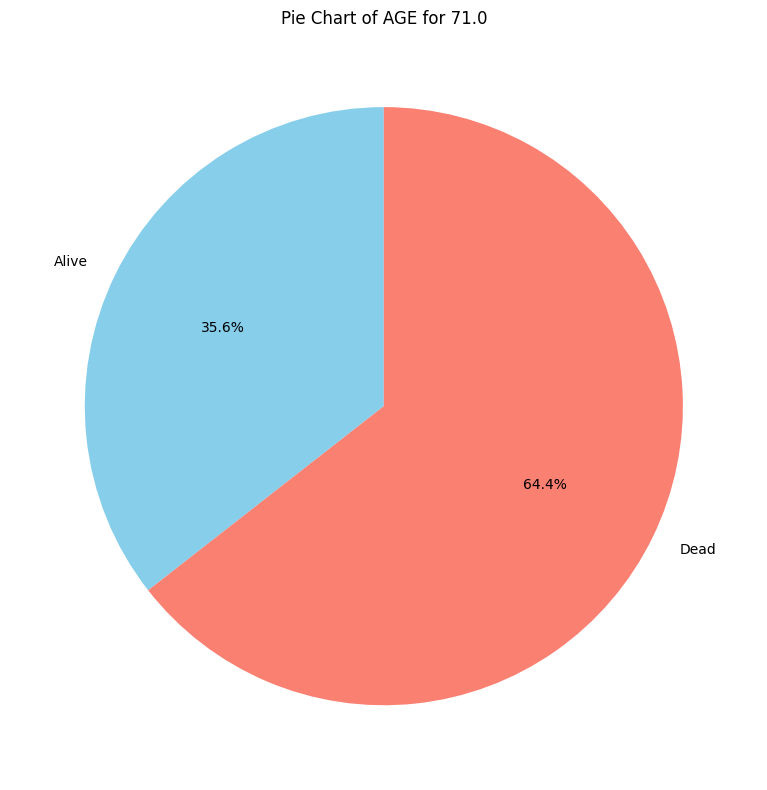

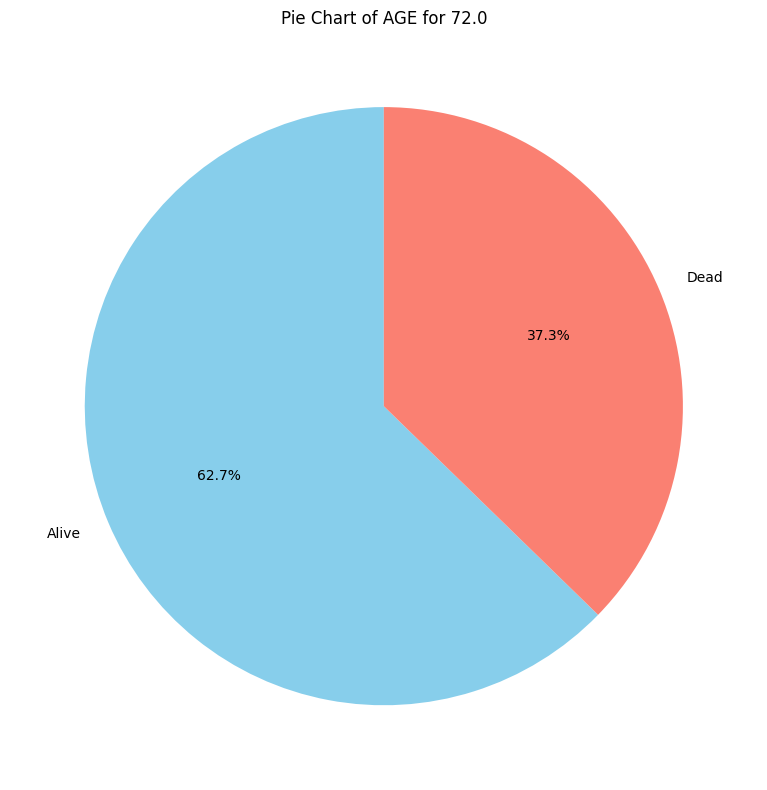

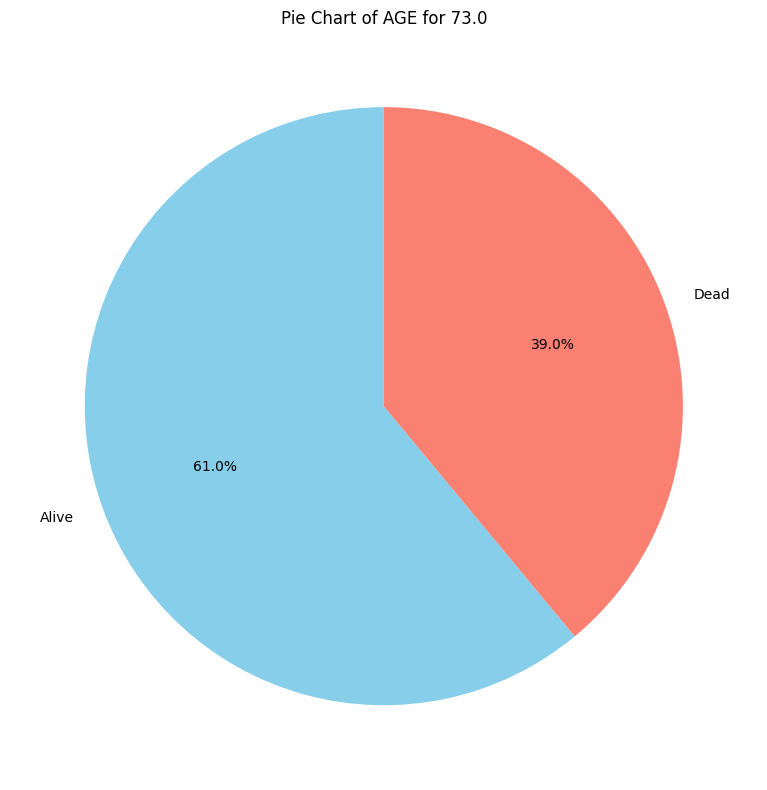

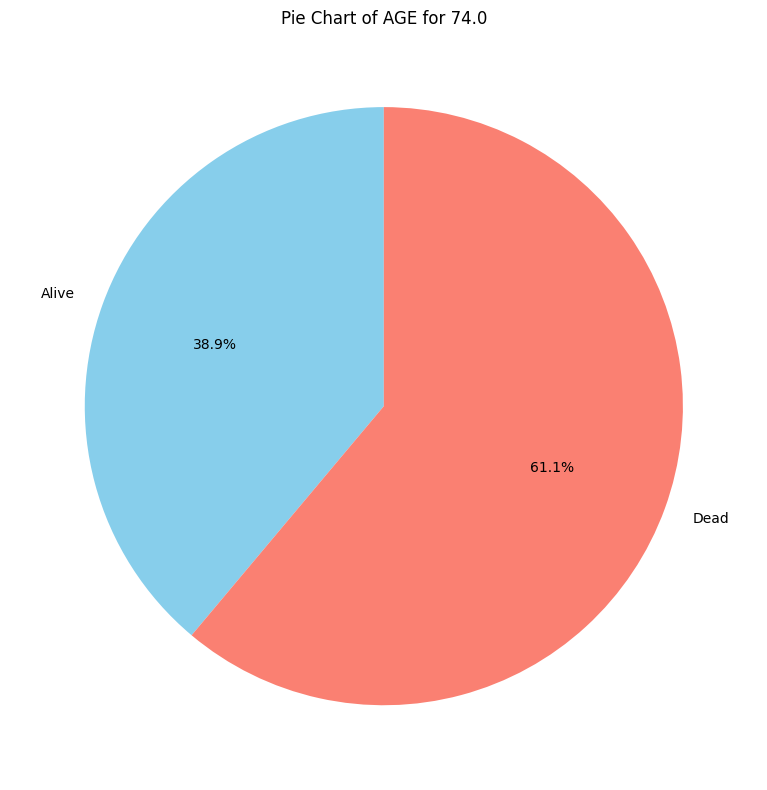

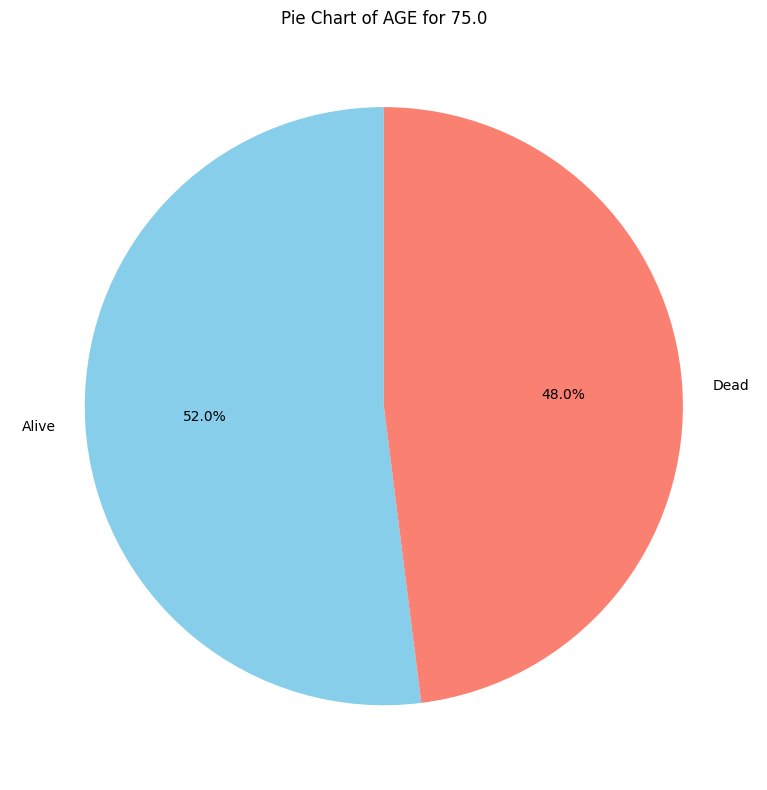

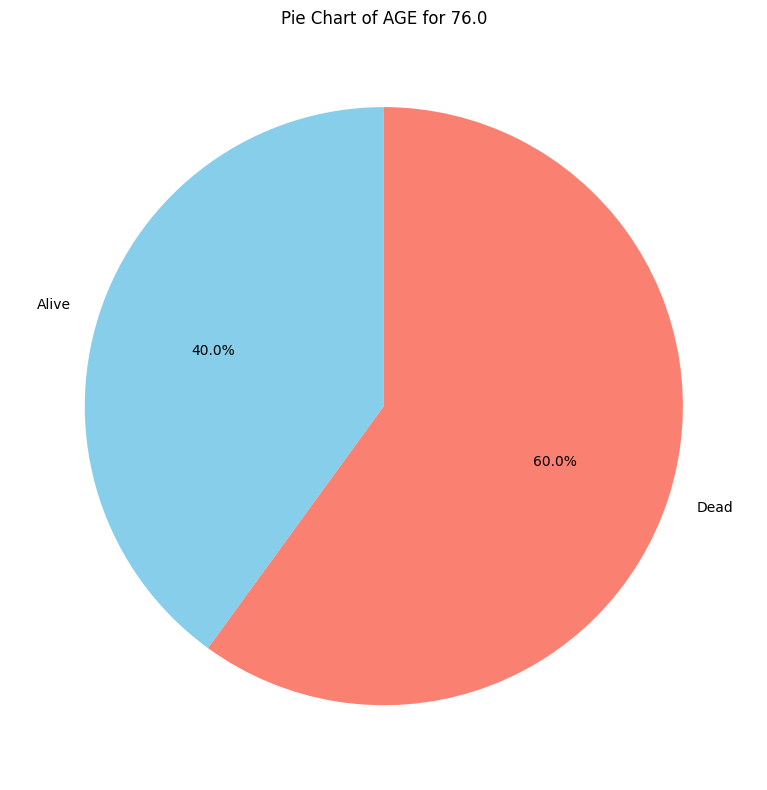

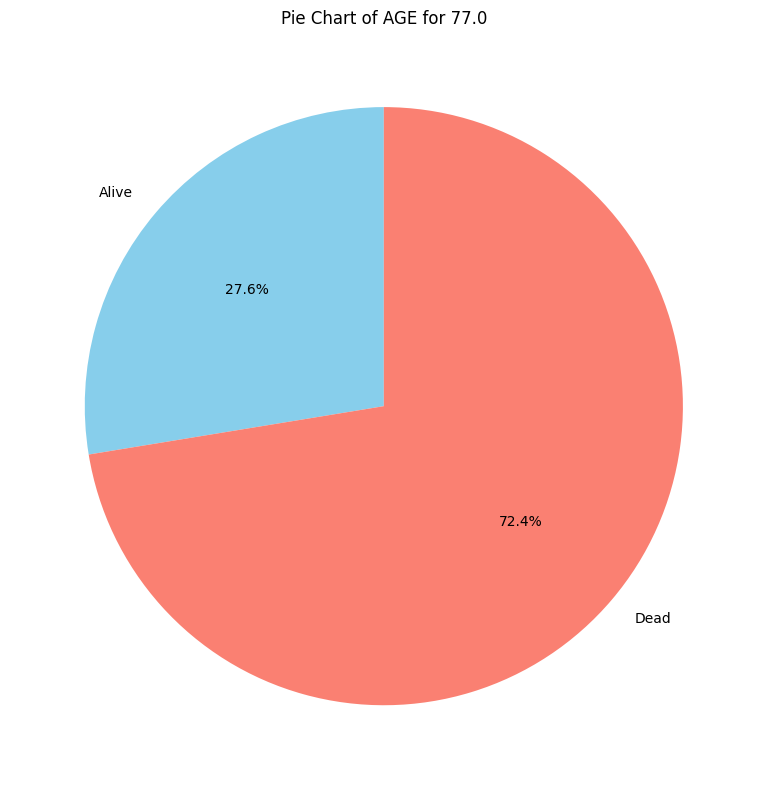

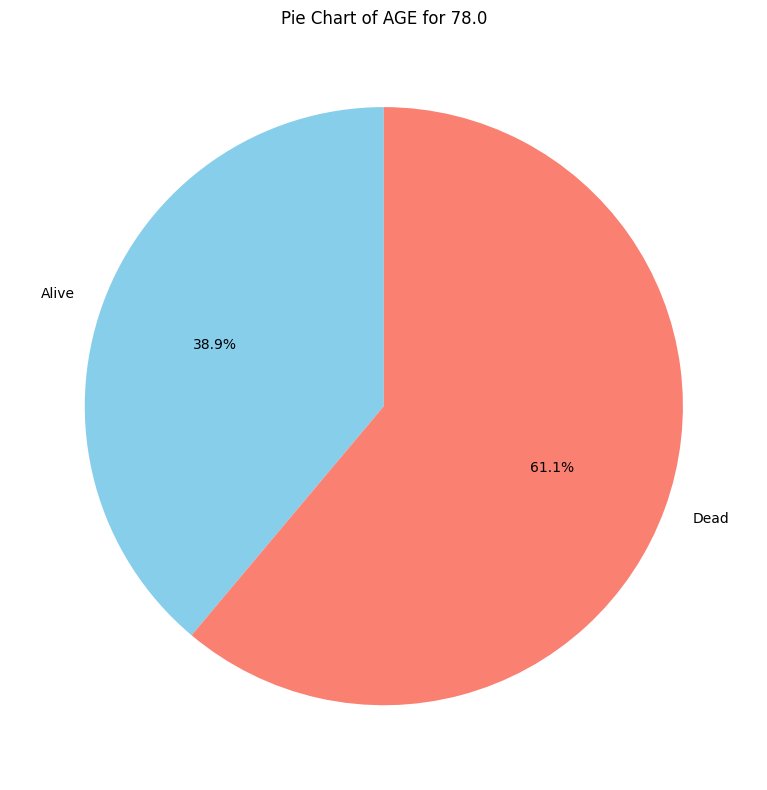

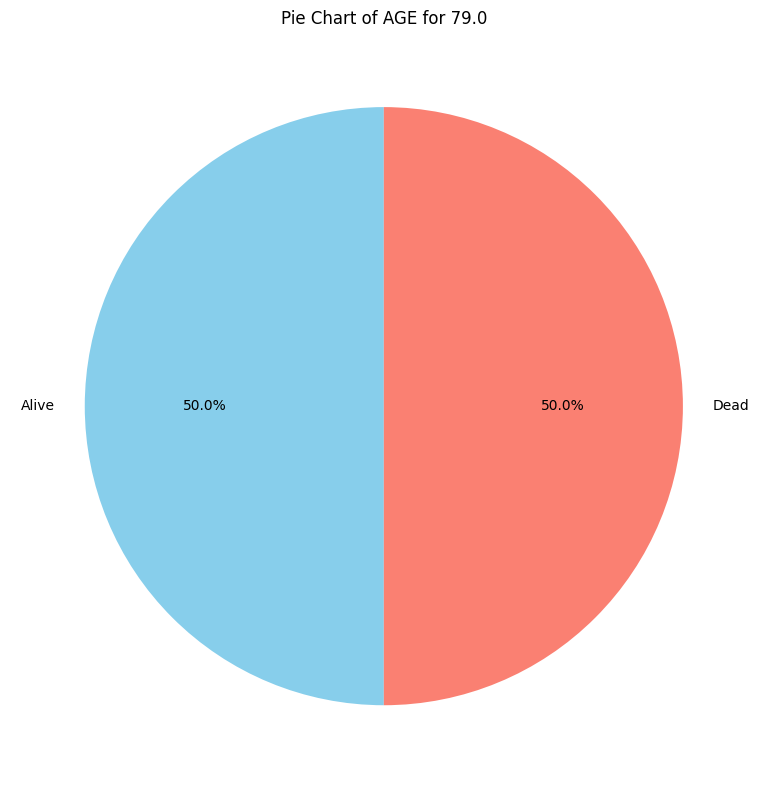

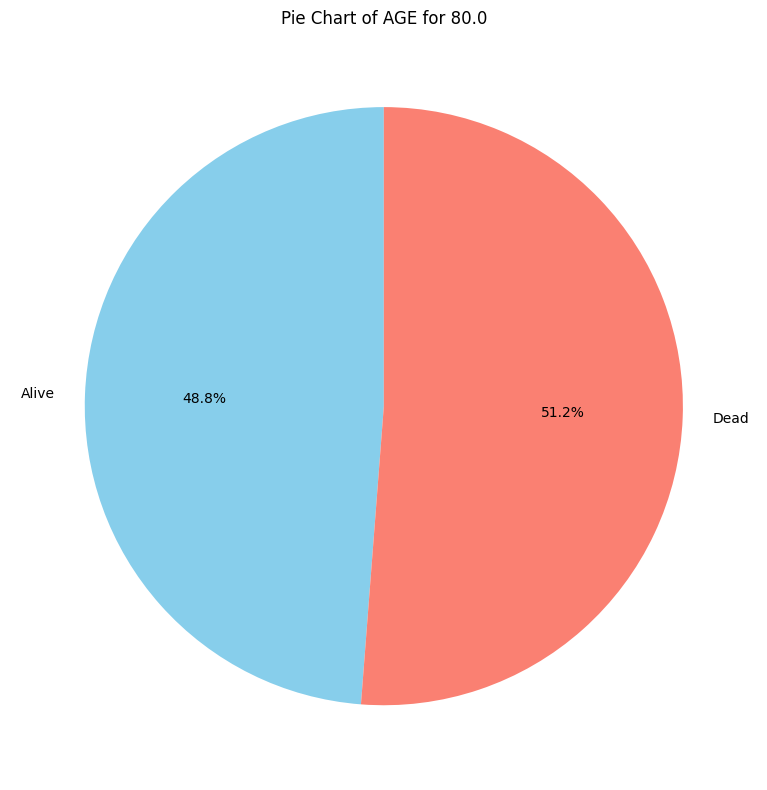

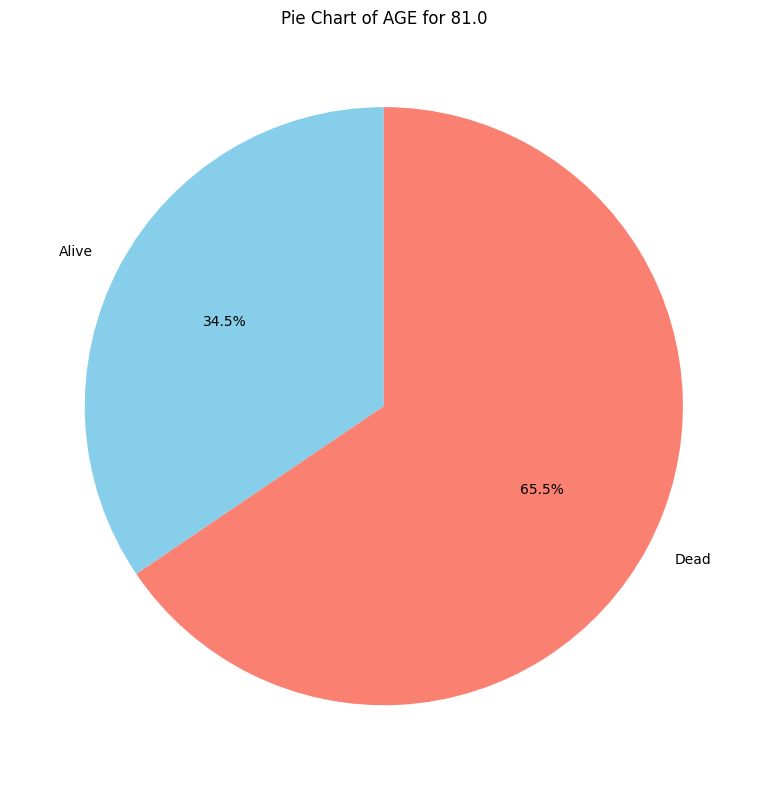

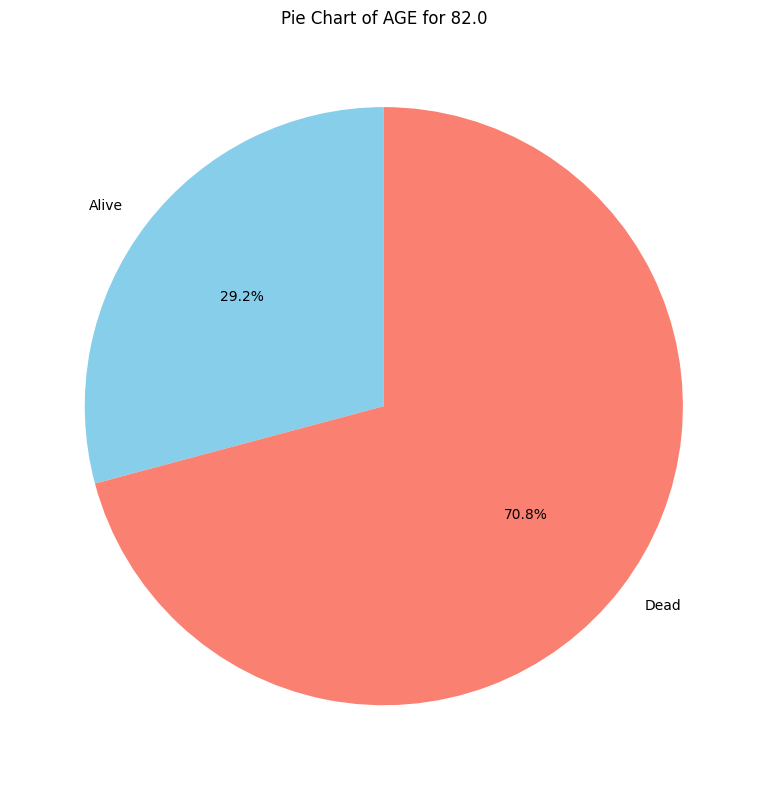

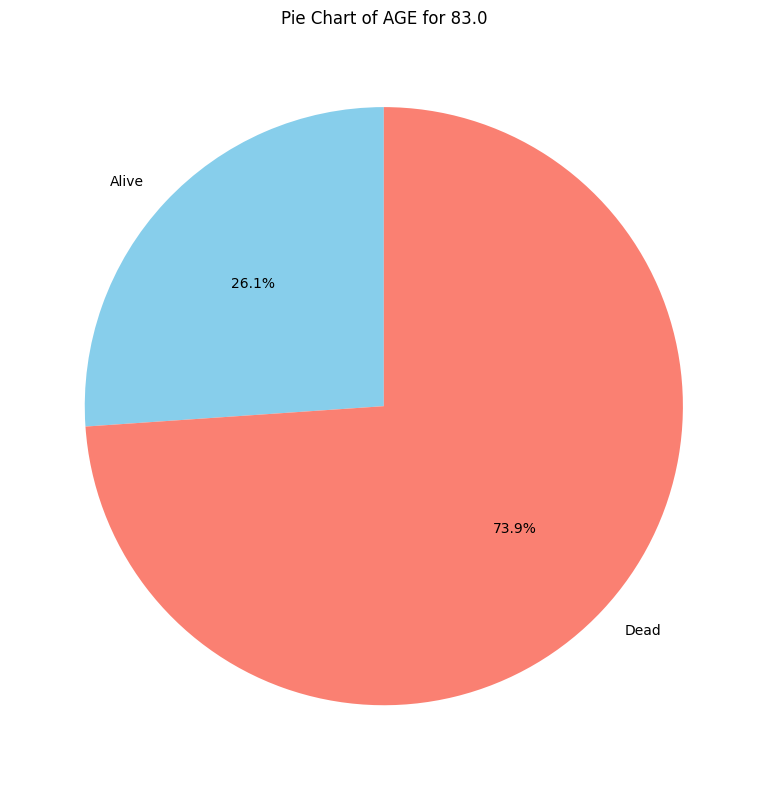

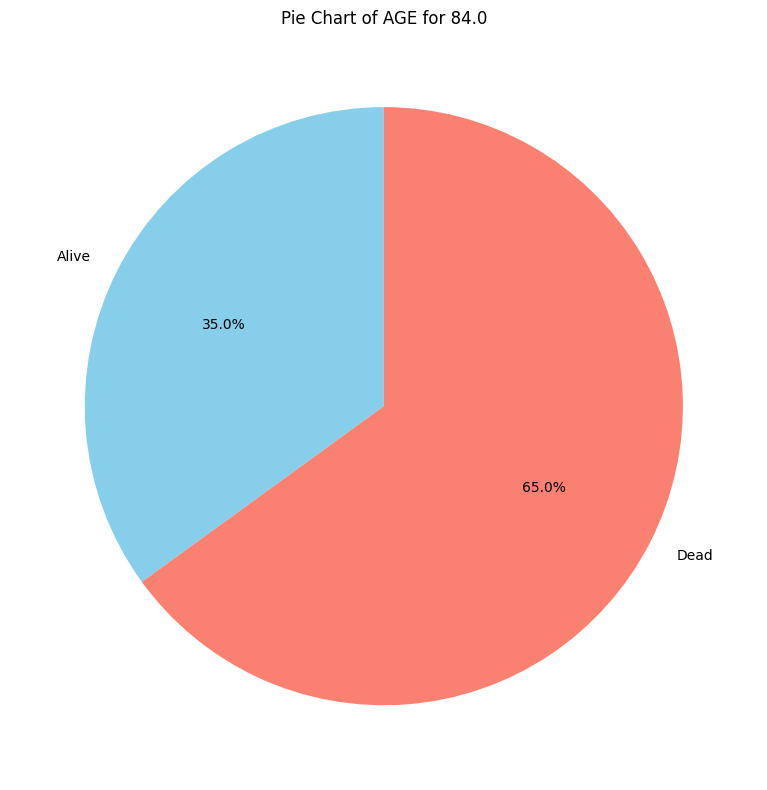

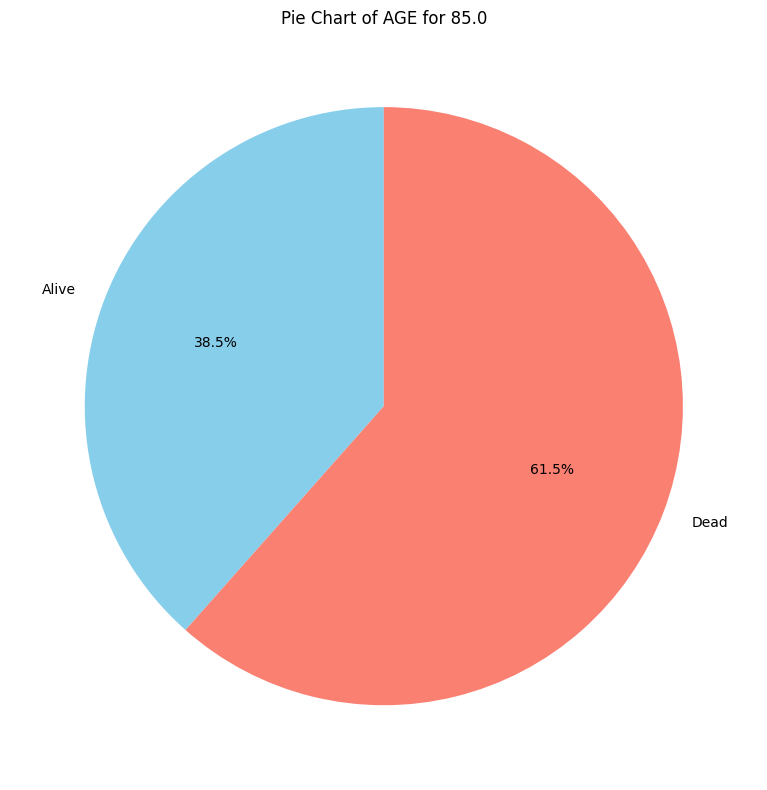

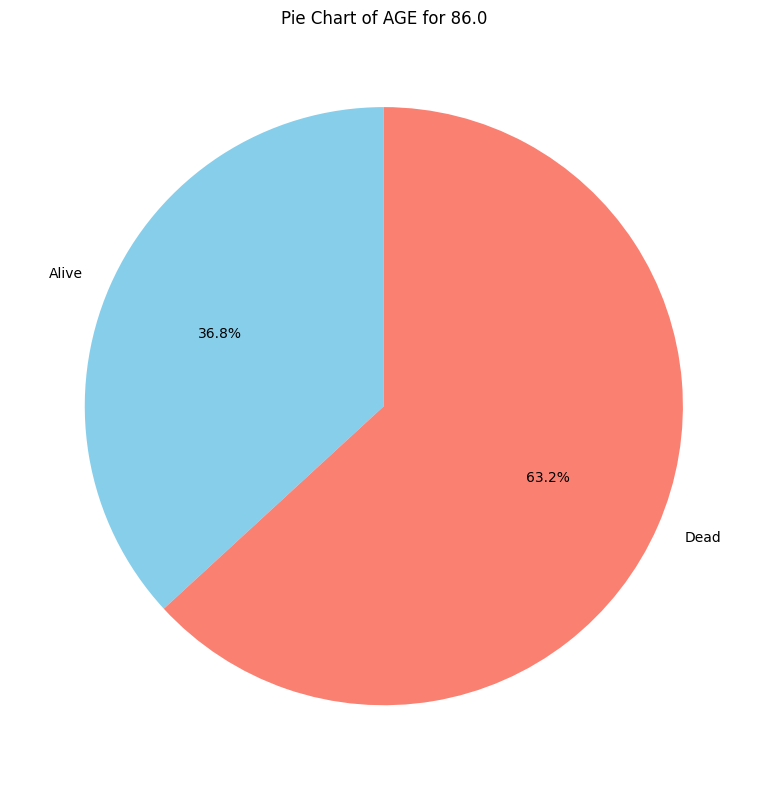

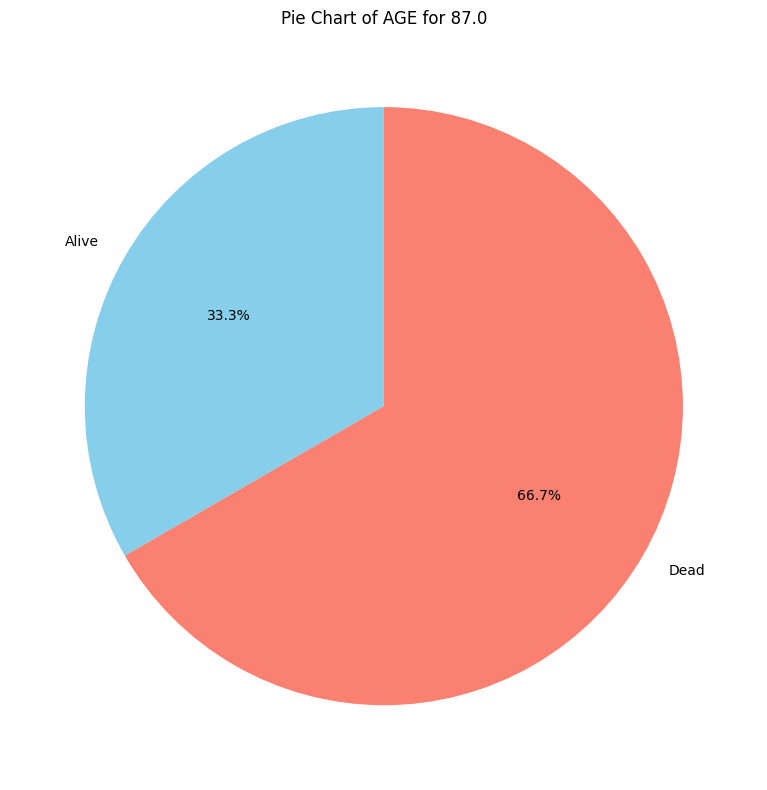

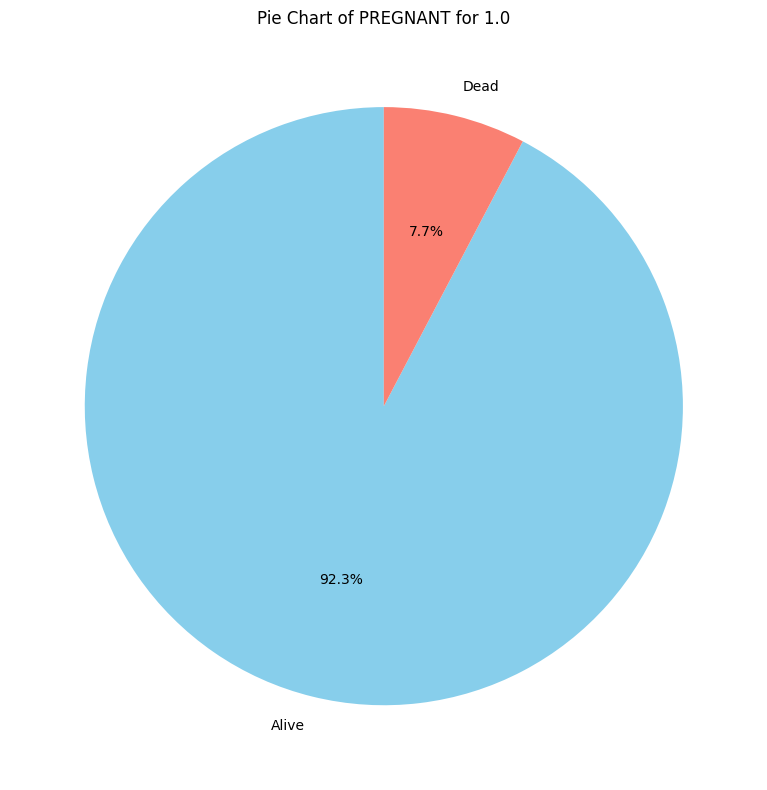

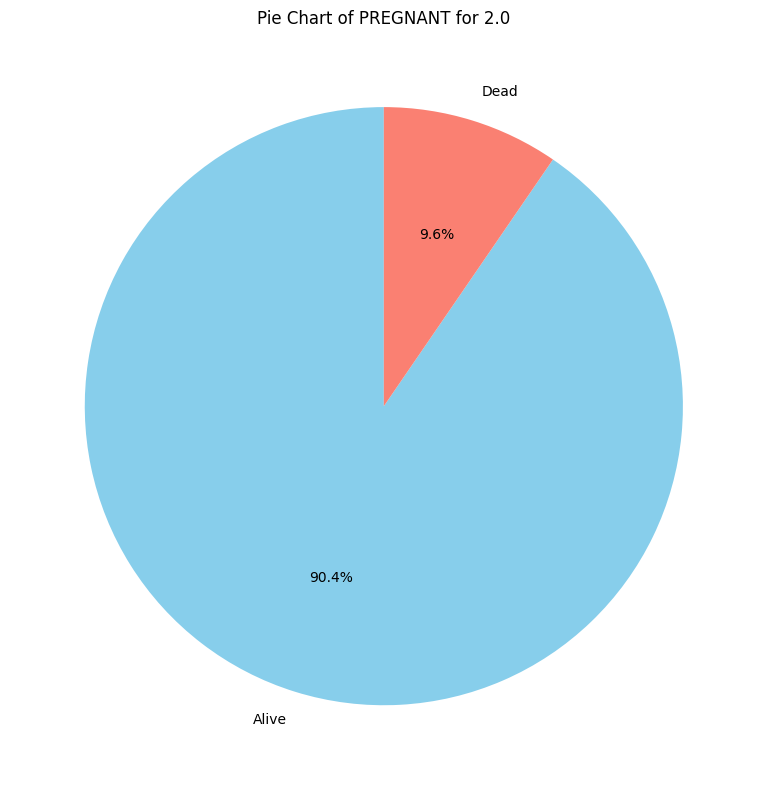

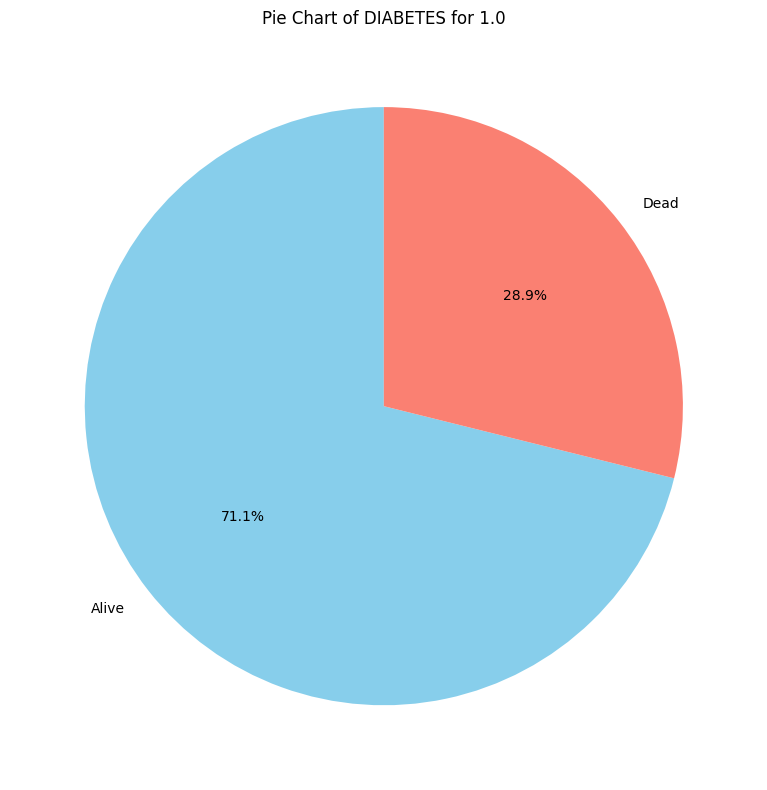

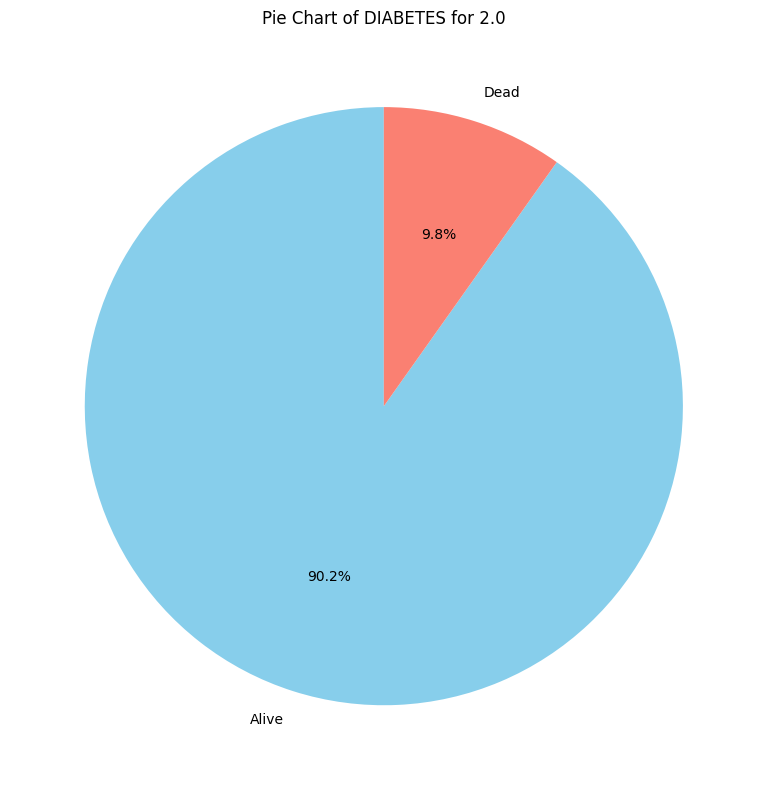

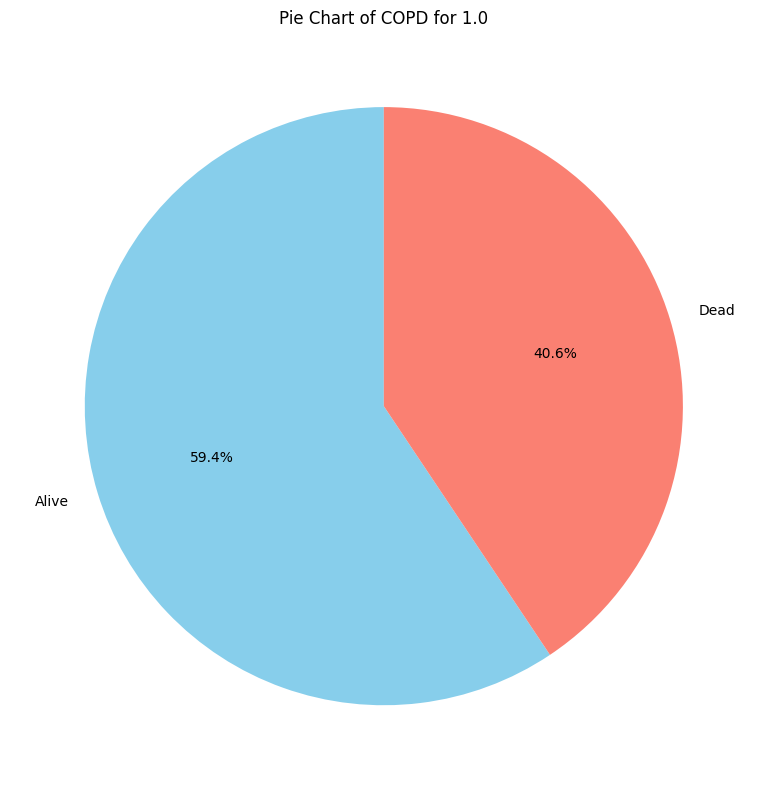

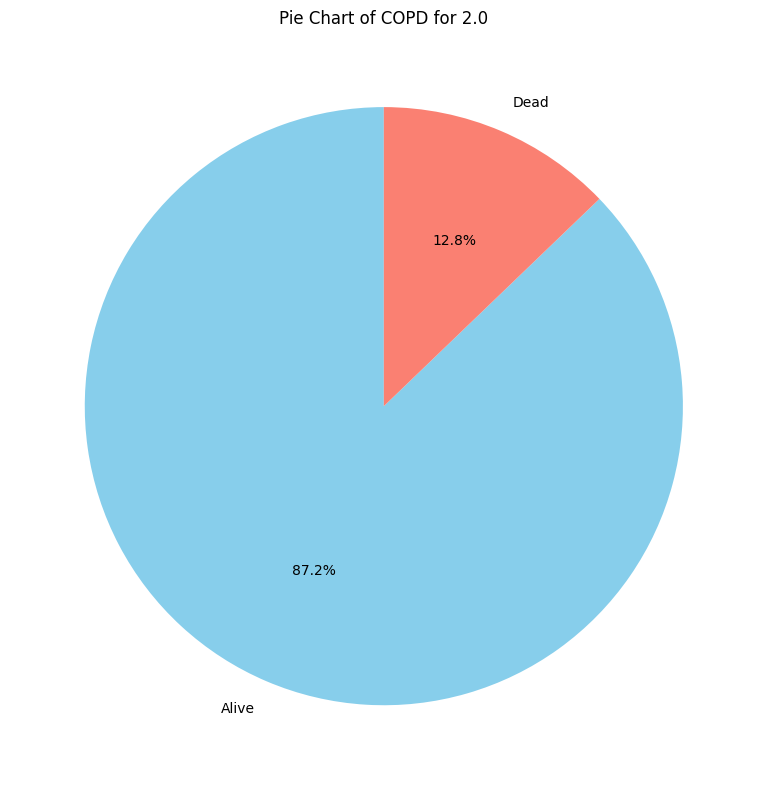

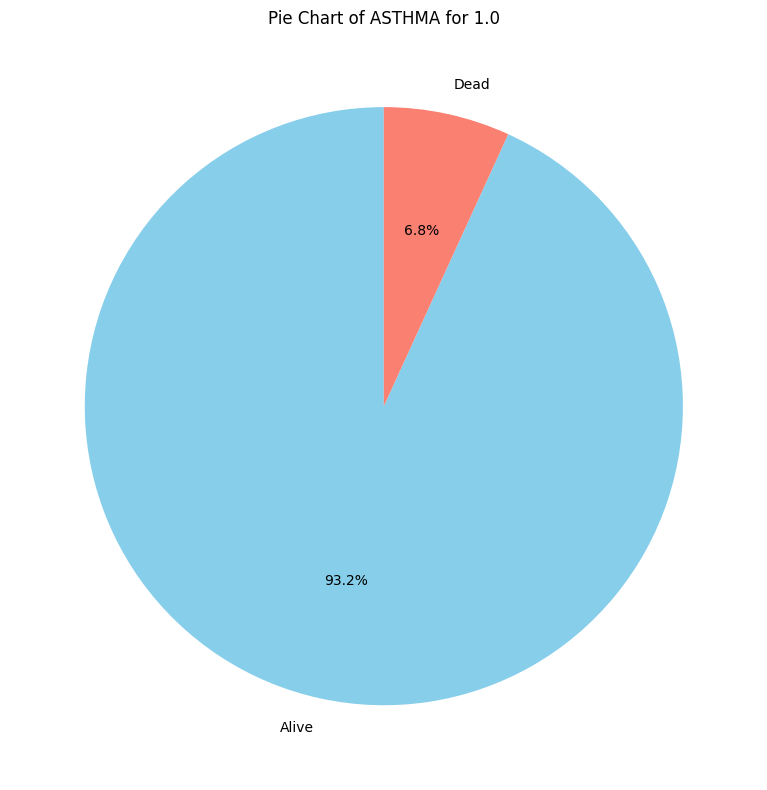

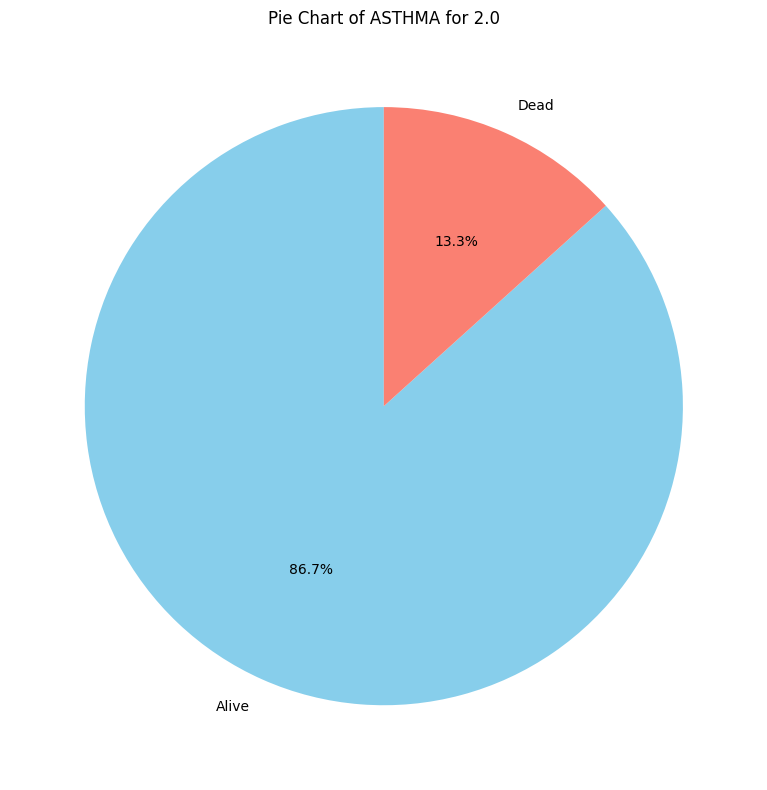

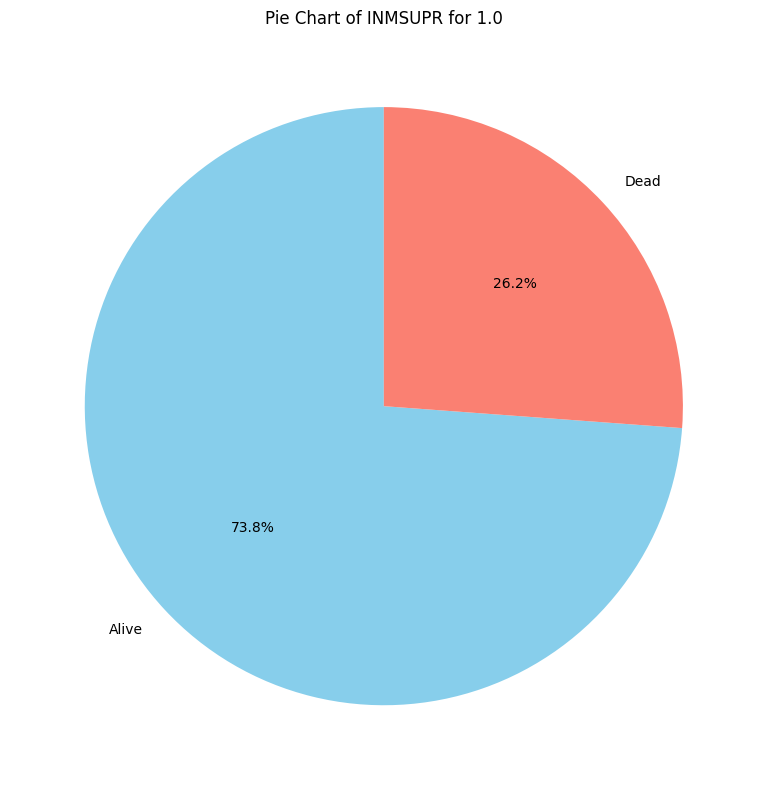

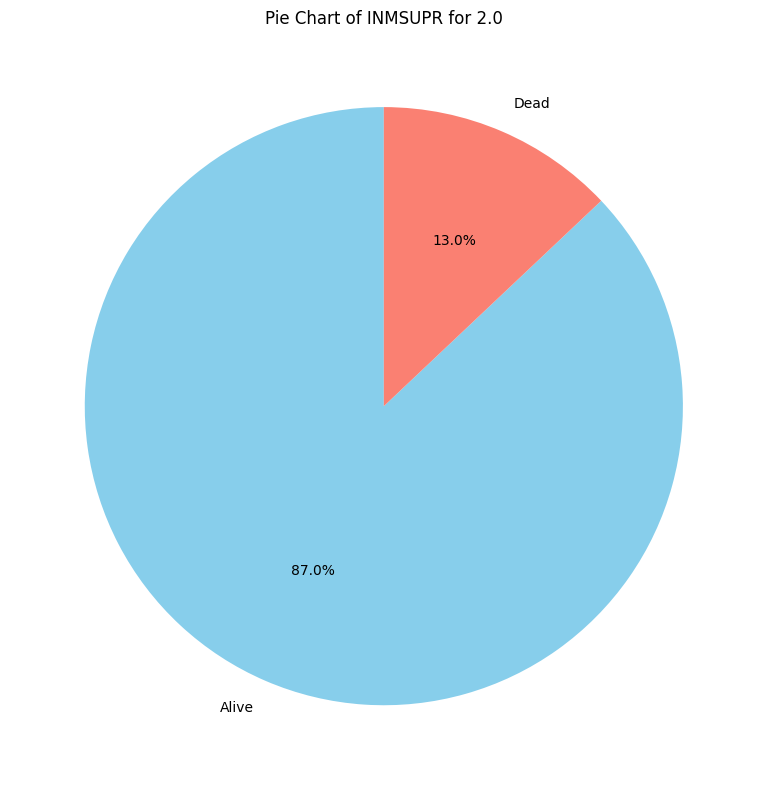

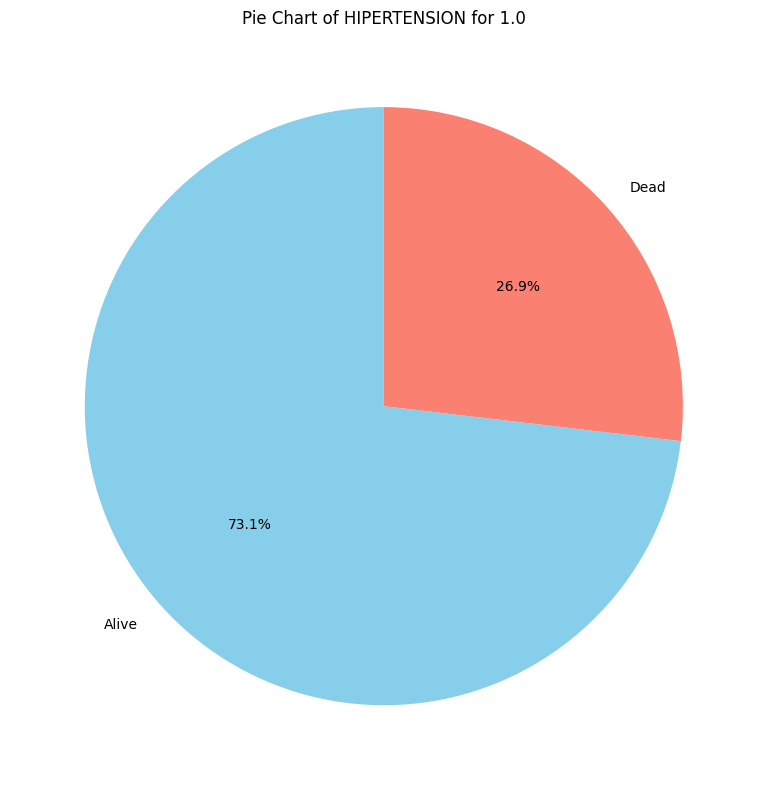

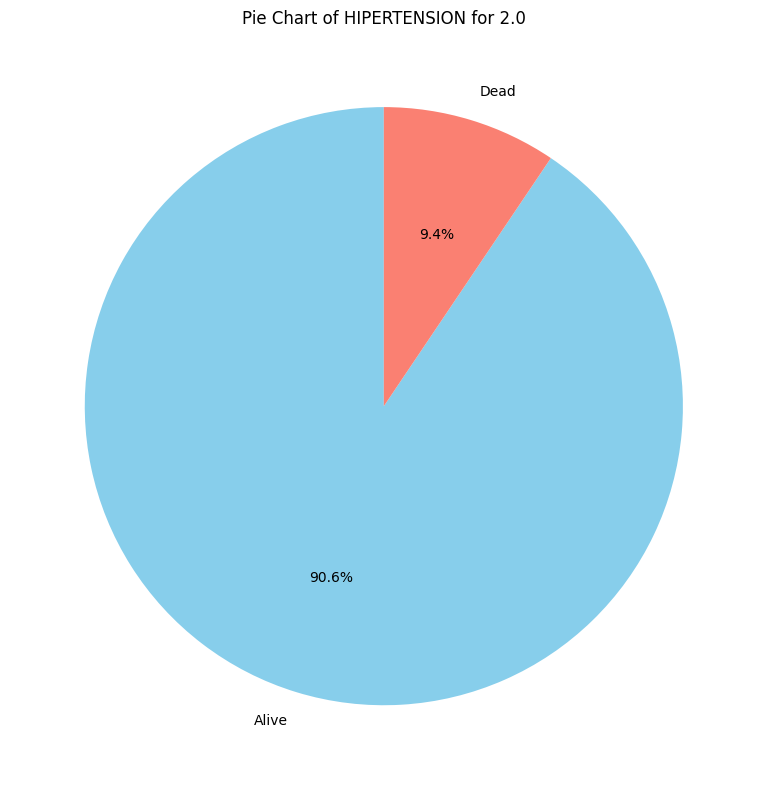

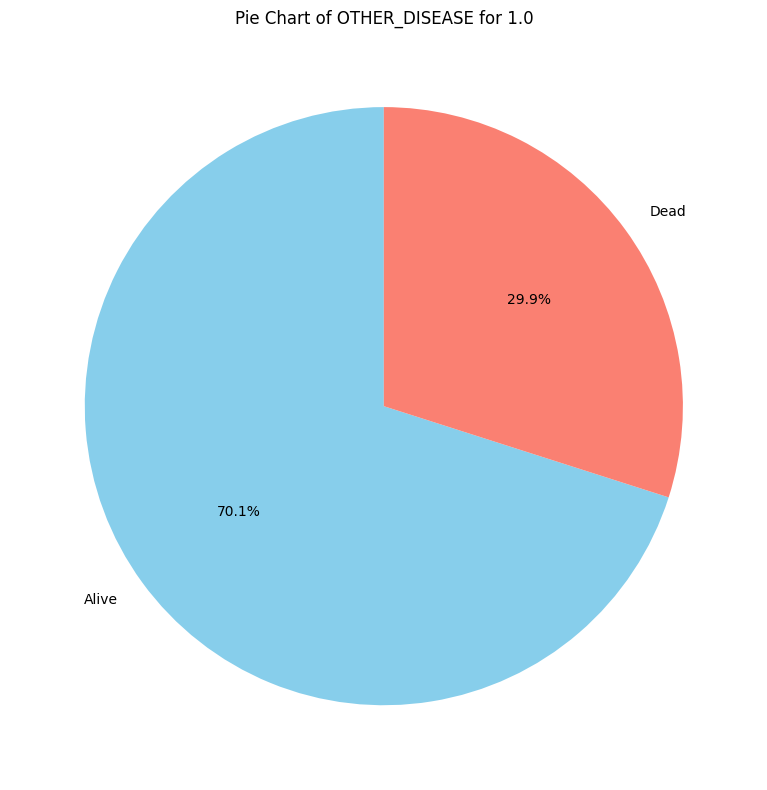

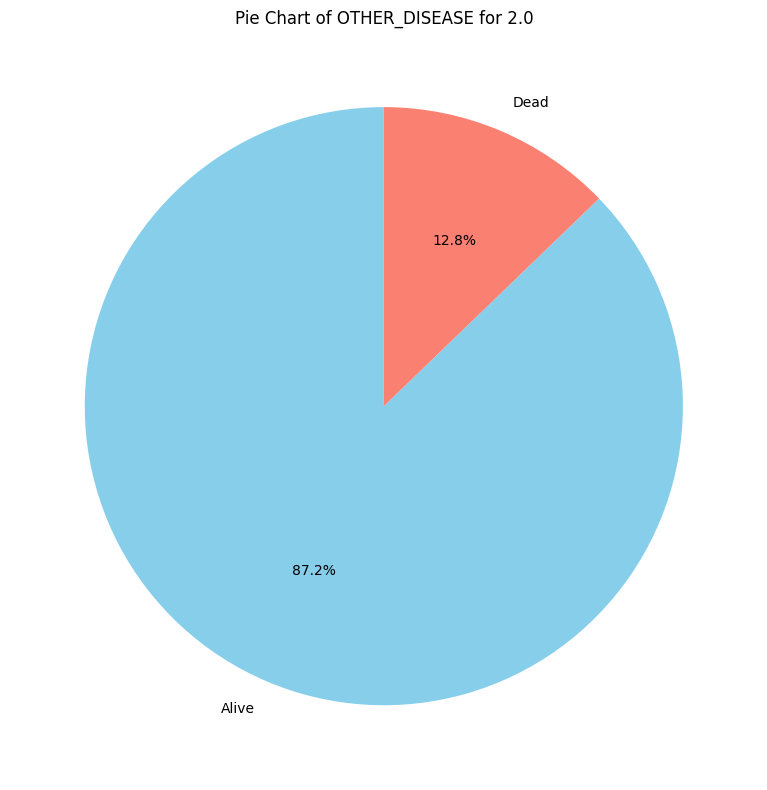

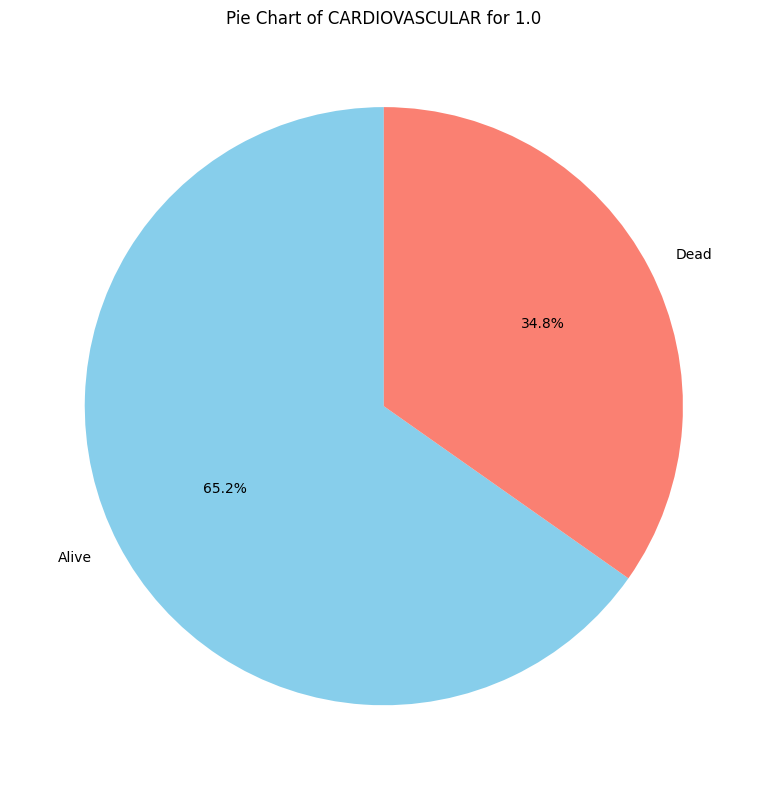

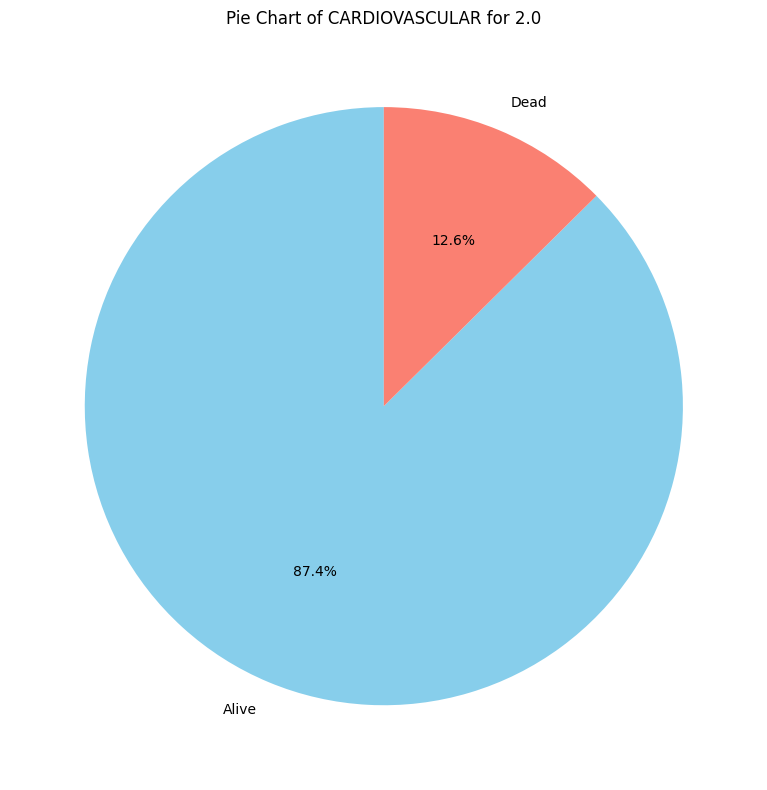

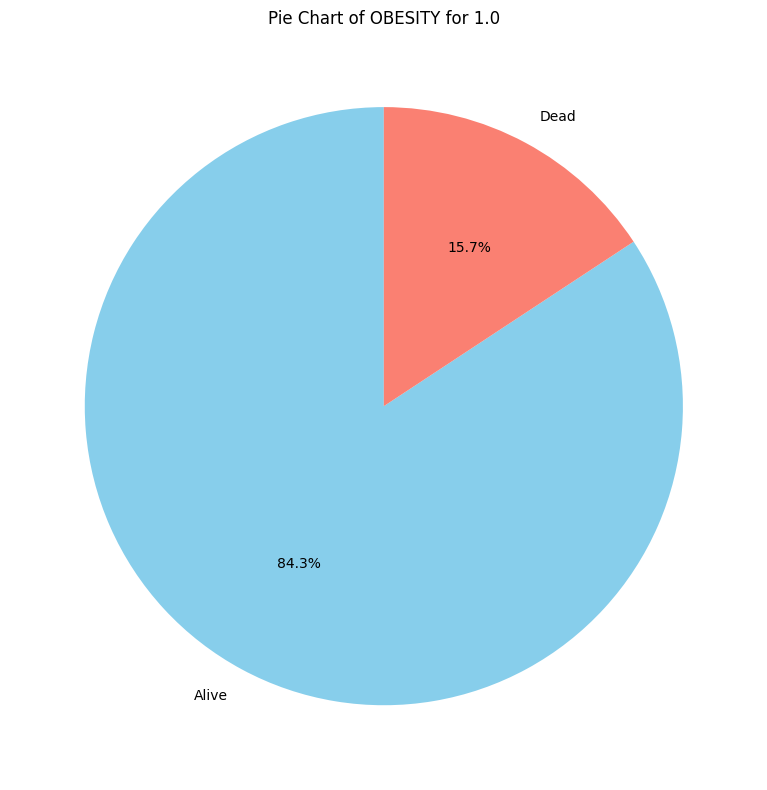

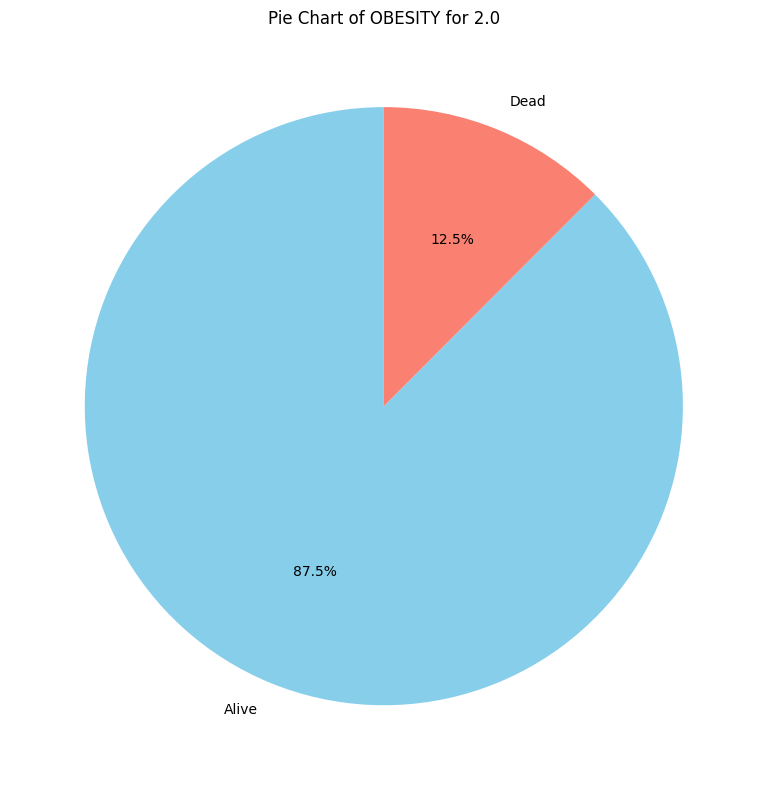

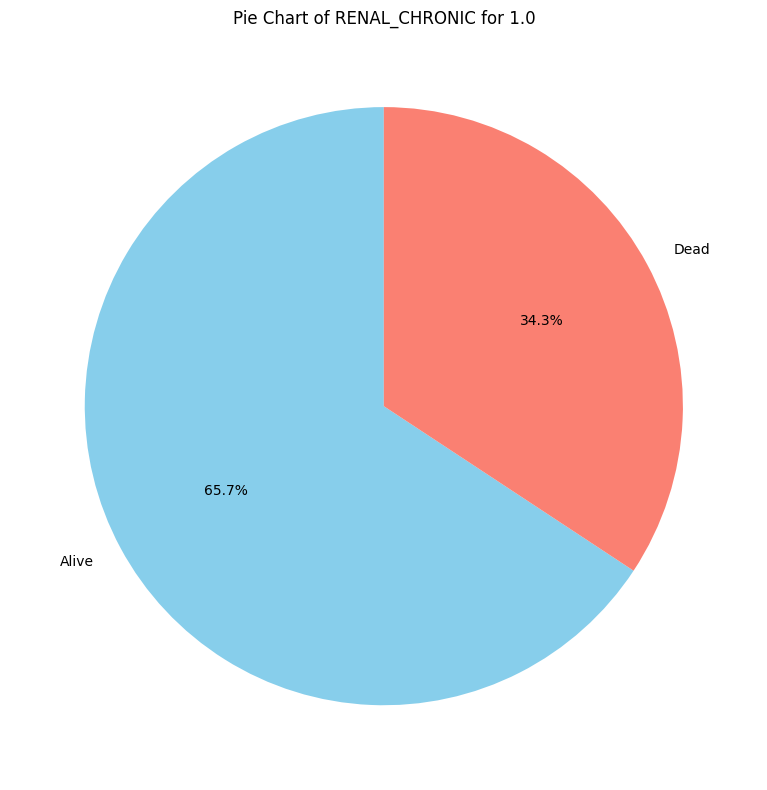

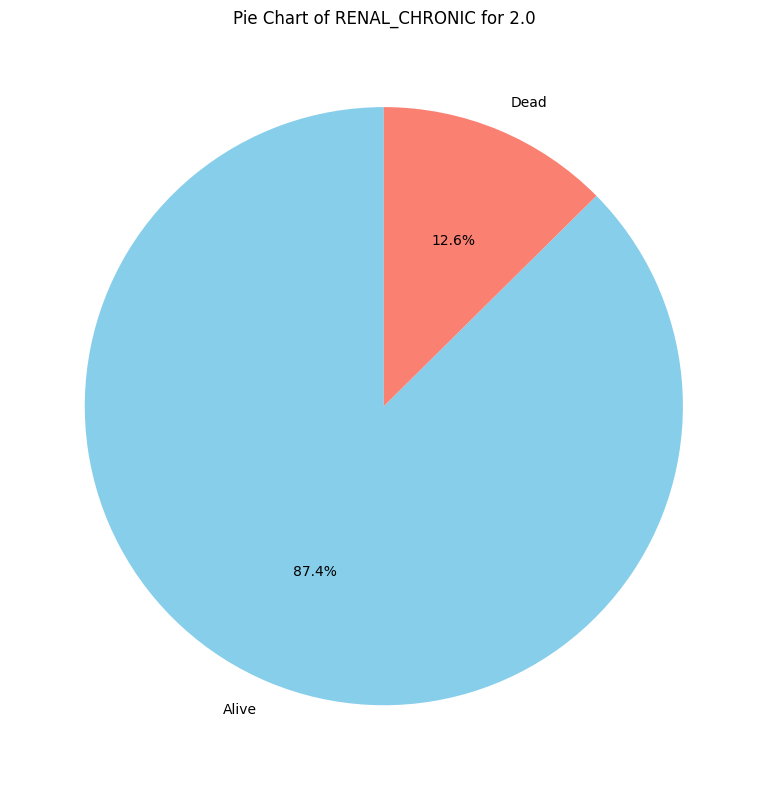

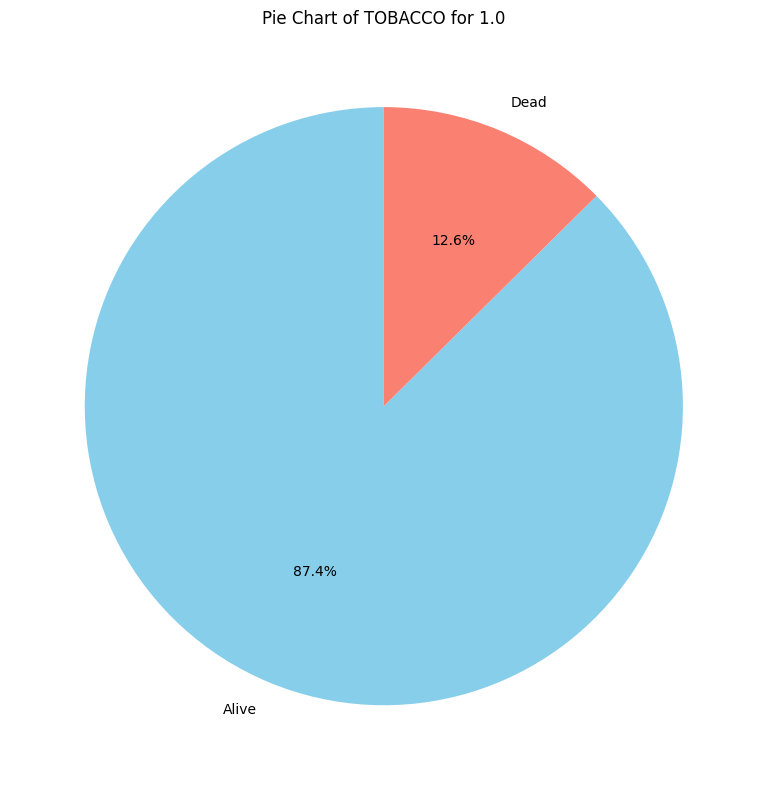

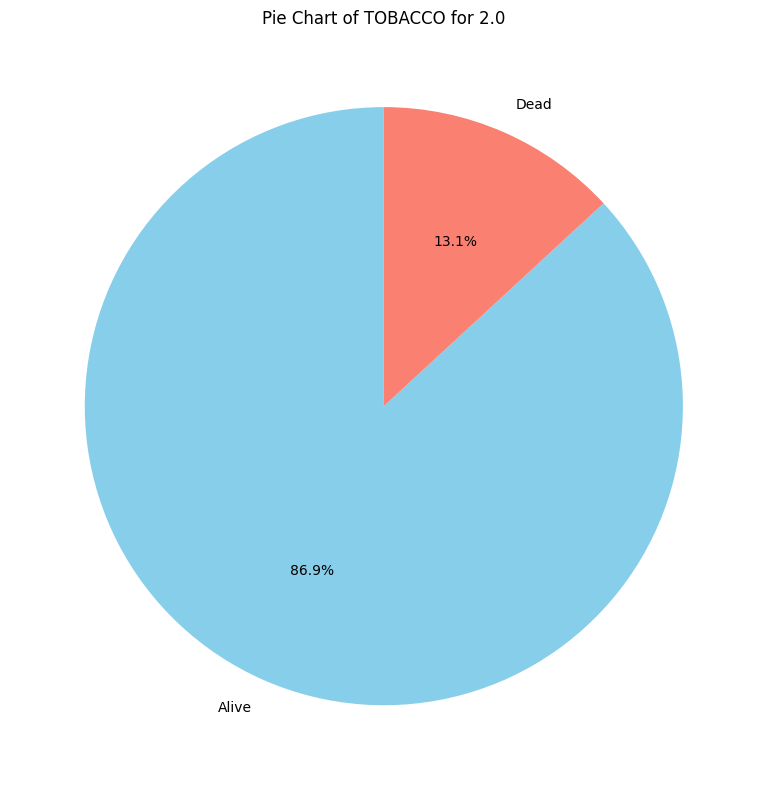

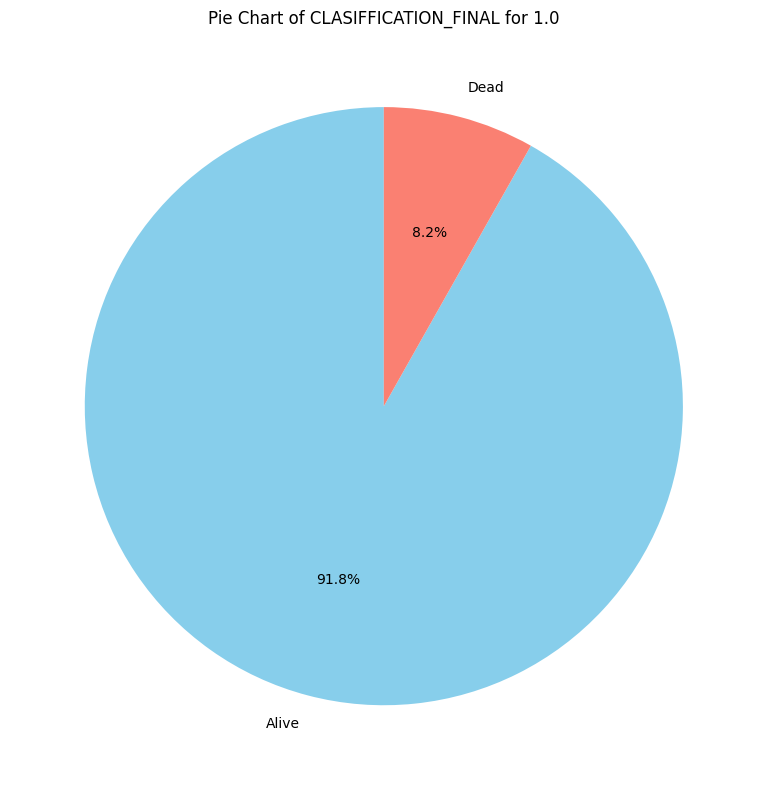

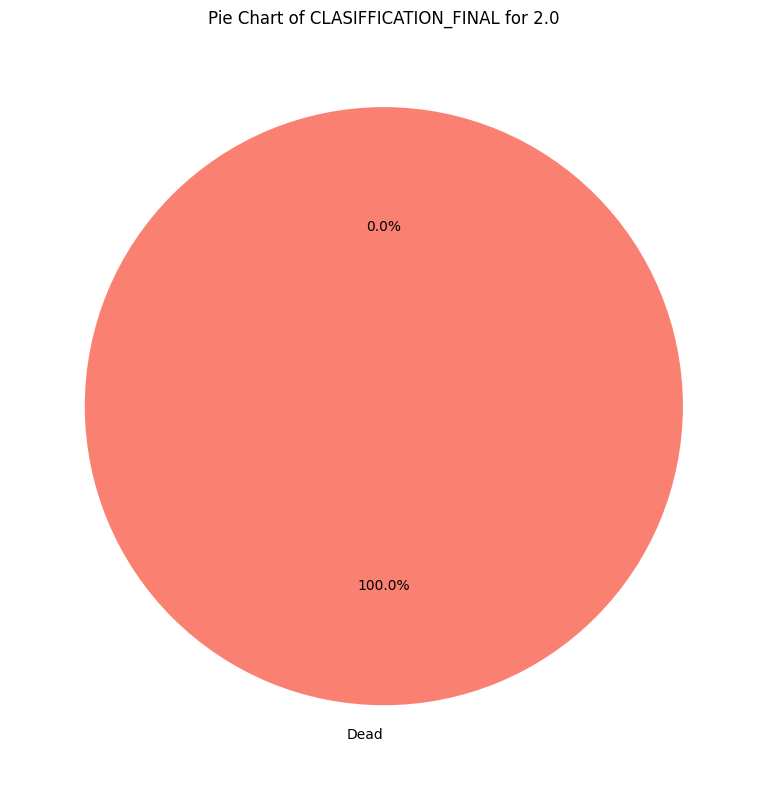

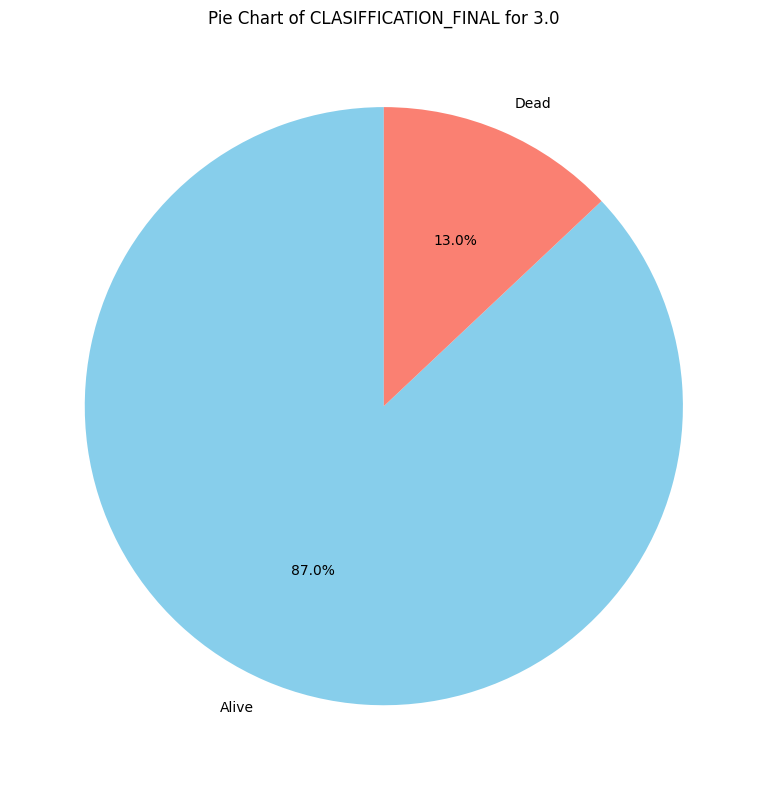

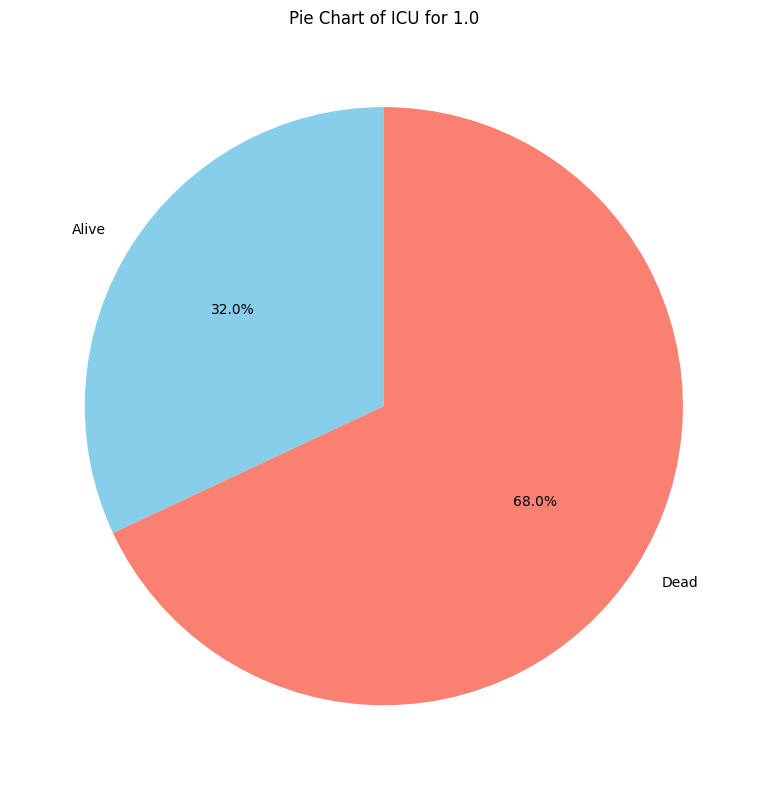

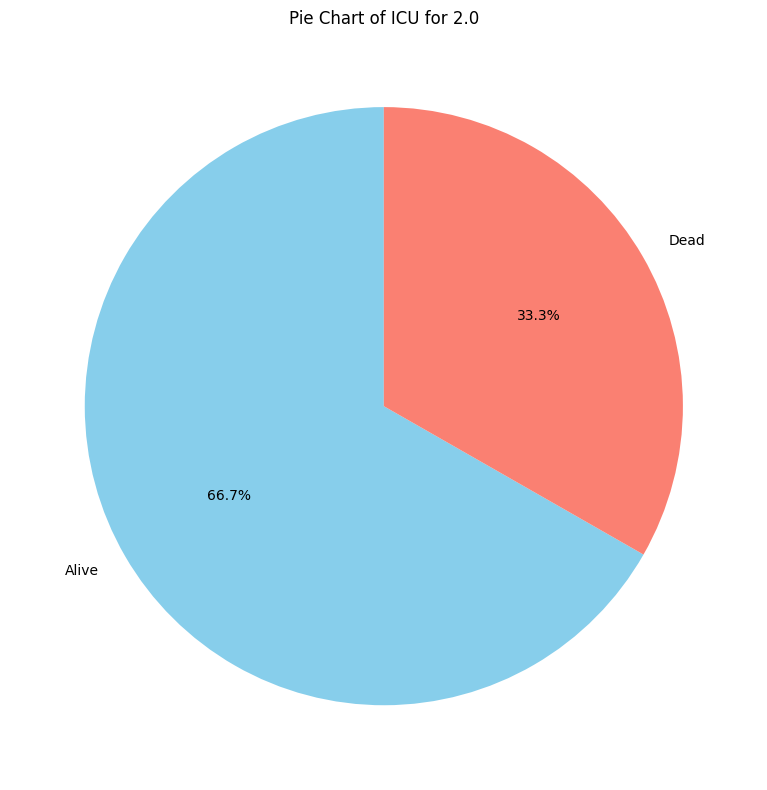

In [23]:
# Percentage of alive and dead for each symptom
for symptom in symptoms:
  count_data = died.groupby([symptom, "DATE_DIED"]).size().unstack(fill_value=0)
  for category in count_data.index:
    plt.figure(figsize=(8, 8))
    count_data.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title(f"Pie Chart of {symptom} for {category}")
    plt.ylabel('')  # Hide y-label
    plt.tight_layout()
    plt.show()

##### Gradient Boosting (Classification Final)

In [52]:
missing_values = df['CLASIFFICATION_FINAL'].isnull().sum()
missing_values

0

In [53]:
df = df.dropna(subset=['CLASIFFICATION_FINAL'])

In [54]:
filtered_df = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])].copy()
filtered_df.drop(columns=["ICU", "INTUBED"], axis=1, inplace=True)
filtered_df

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  \
0            2             1    1             1  03/05/2020        1.0  65.0   
2            2             1    2             2  09/06/2020        2.0  55.0   
4            2             1    2             1  21/06/2020        2.0  68.0   
5            2             1    1             2         NaN        1.0  40.0   
6            2             1    1             1         NaN        2.0  64.0   
...        ...           ...  ...           ...         ...        ...   ...   
1047933      1            13    1             2         NaN        2.0  77.0   
1047934      1            13    1             1         NaN        2.0  55.0   
1047935      1            13    2             1         NaN        2.0  70.0   
1047936      2            13    2             1         NaN        2.0  32.0   
1047937      2            13    1             1         NaN        2.0  30.0   

         PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0             2.0       2.0   2.0     2.0      2.0           1.0   
2             NaN       1.0   2.0     2.0      2.0           2.0   
4             NaN       1.0   2.0     2.0      2.0           1.0   
5             2.0       2.0   2.0     2.0      2.0           2.0   
6             2.0       2.0   2.0     2.0      2.0           2.0   
...           ...       ...   ...     ...      ...           ...   
1047933       2.0       1.0   2.0     2.0      1.0           1.0   
1047934       2.0       1.0   2.0     2.0      2.0           2.0   
1047935       NaN       2.0   2.0     2.0      2.0           1.0   
1047936       NaN       2.0   2.0     2.0      2.0           2.0   
1047937       2.0       2.0   2.0     2.0      2.0           2.0   

         OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0                  2.0             2.0      2.0            2.0      2.0   
2                  2.0             2.0      2.0            2.0      2.0   
4                  2.0             2.0      2.0            2.0      2.0   
5                  2.0             2.0      2.0            2.0      2.0   
6                  2.0             2.0      2.0            2.0      2.0   
...                ...             ...      ...            ...      ...   
1047933            2.0             2.0      2.0            2.0      2.0   
1047934            2.0             2.0      2.0            2.0      2.0   
1047935            2.0             2.0      2.0            2.0      2.0   
1047936            2.0             2.0      2.0            2.0      2.0   
1047937            2.0             2.0      2.0            2.0      2.0   

         CLASIFFICATION_FINAL  
0                           3  
2                           3  
4                           3  
5                           3  
6                           3  
...                       ...  
1047933                     3  
1047934                     3  
1047935                     3  
1047936                     3  
1047937                     3  

[389741 rows x 19 columns]

In [55]:
X = df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_1 = { 'accuracy': accuracy_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred, average='weighted'),
              'recall': recall_score(y_test, y_pred, average='weighted'),
              'f1': f1_score(y_test, y_pred, average='weighted')
}

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1687
           2       0.00      0.00      0.00       354
           3       0.55      0.36      0.43     75794
           4       0.00      0.00      0.00       590
           5       0.00      0.00      0.00      5209
           6       0.50      0.07      0.12     25628
           7       0.54      0.85      0.66     99325

    accuracy                           0.54    208587
   macro avg       0.23      0.18      0.17    208587
weighted avg       0.52      0.54      0.49    208587



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
X = filtered_df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = filtered_df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results_2 = { 'accuracy': accuracy_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred, average='weighted'),
              'recall': recall_score(y_test, y_pred, average='weighted'),
              'f1': f1_score(y_test, y_pred, average='weighted')
}

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.01      0.02      1753
           2       0.00      0.00      0.00       353
           3       0.97      1.00      0.99     75843

    accuracy                           0.97     77949
   macro avg       0.56      0.34      0.33     77949
weighted avg       0.96      0.97      0.96     77949



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

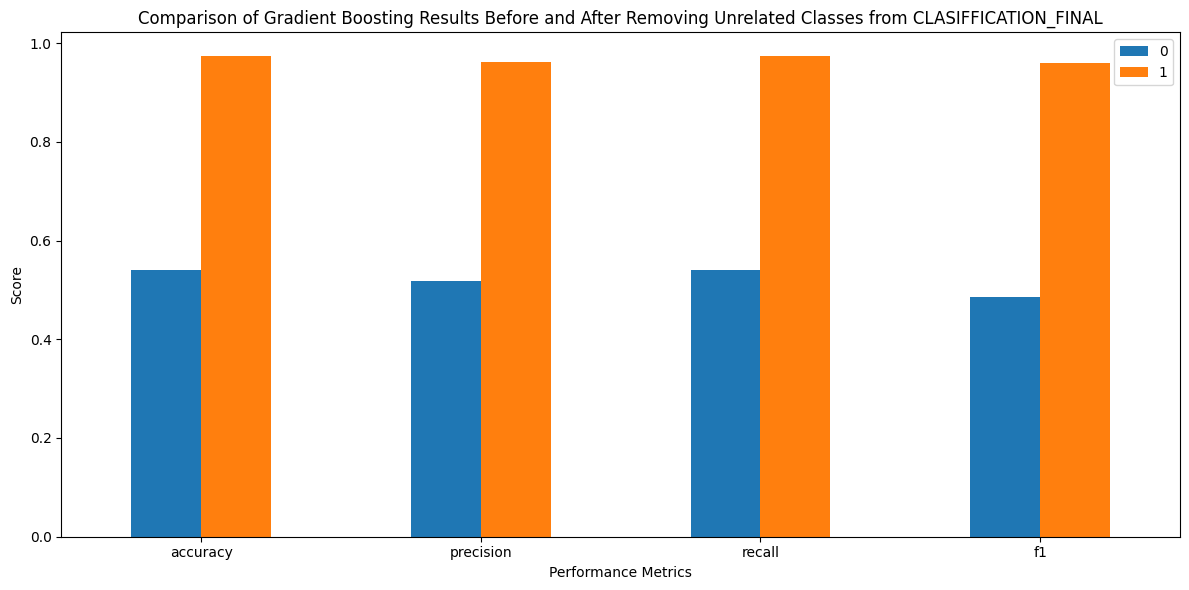

In [57]:
results_df = pd.DataFrame([results_1, results_2])
results_df = results_df.T
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Gradient Boosting Results Before and After Removing Unrelated Classes from CLASIFFICATION_FINAL")
plt.xlabel("Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Gradient Boosting (Hyperparameter Tuning)

In [30]:
# Hyperparameter tuning for gradient boosting using grid search

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9839317133183341
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        19
         2.0       0.00      0.00      0.00         4
         3.0       0.99      1.00      0.99      1704

    accuracy                           0.99      1727
   macro avg       0.33      0.33      0.33      1727
weighted avg       0.97      0.99      0.98      1727



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


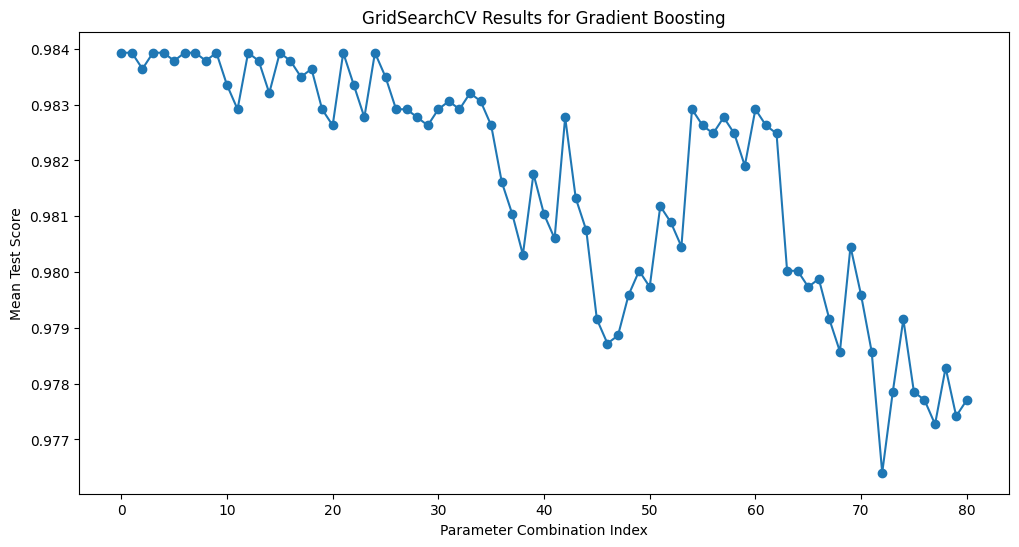

In [38]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 6))
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results for Gradient Boosting')
plt.plot(results.index, results['mean_test_score'], marker='o')
plt.show()